In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = None

#### 1. Reading and Understanding the Data

In [2]:
# Importing the Dataset
telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [3]:
# Checking the descriptive information about dataset
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
# Checking the statistical aspects of the dataset
telecom_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [5]:
# Checking the shape of data
telecom_data.shape

(99999, 226)

In [6]:
# Checking all the columns of dataset
telecom_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
##Check null values in entire df
missing_data = ((telecom_data.isnull().sum() / telecom_data.shape[0]) * 100).round(2).sort_values(ascending=False)
print(missing_data)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [8]:
# Check for duplicates
telecom_data = telecom_data.drop_duplicates()

#### 2. Data Cleaning and Manipulation

##### 1. Derive new features (for filtering High-Value Customers)

In [9]:
## Columns containing recharge amount 'rech_amt' or recharge data 'rech_data' details
rech_amt_data_cols = telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data', regex=True)]
rech_amt_data_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

**Observation:** The above mentioned columns correspond to `'rech_amt'` and `'rech_data'` features across months 6, 7 and 8 respectively:<br>
(i) Total recharge amount (calling)<br>
(ii) Maximum recharge amount (calling)<br>
(iii) Last day recharge amount<br>
(iv) Last date of Recharging the data<br>
(v) Total recharge for data<br>
(vi) Maximum recharge for data<br>
(vii) Average recharge amount for data<br>

In [10]:
## Check null values in above mentioned columns,
rech_amt_missing_data = ((telecom_data[rech_amt_data_cols].isnull().sum() / telecom_data.shape[0]) * 100).round(2).sort_values(ascending=False)

In [11]:
rech_amt_missing_data

total_rech_data_6           74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
date_of_last_rech_data_8    73.66
total_rech_data_8           73.66
max_rech_data_8             73.66
av_rech_amt_data_8          73.66
total_rech_amt_7             0.00
max_rech_amt_9               0.00
max_rech_amt_8               0.00
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
total_rech_amt_6             0.00
dtype: float64

In [12]:
##Check statistics of these columns in the dataframe
telecom_data[rech_amt_data_cols].describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

In [13]:
##Imputation of 'av_rech_amt_data_* and total_rech_data_*' column NaNs with 0 (for all the months 6, 7, 8 and 9 respectively)
cols_imputation = [col for col in telecom_data.columns if 'av_rech_amt_data_' in col or 'total_rech_data_' in col]
telecom_data[cols_imputation] = telecom_data[cols_imputation].fillna(0)

In [14]:
##Calculating total data recharge amt for all the months 6, 7, 8 and 9 respectively.
months = ['6', '7', '8', '9']
for month in months:
    telecom_data[f'total_rech_data_amt_{month}'] = (
        telecom_data[f'av_rech_amt_data_{month}'] * telecom_data[f'total_rech_data_{month}']
    )

In [15]:
##Calculating the total average recharge for good phase: average of (calling recharge costs + data recharge costs) for month (6)
##and (7). Note: Good phase: month (6) and (7)

telecom_data['avg_total_rech_plus_data_amt_6_7'] = (telecom_data['total_rech_data_amt_6'] + telecom_data['total_rech_amt_6']+
                                                  telecom_data['total_rech_data_amt_7'] + telecom_data['total_rech_amt_7'])/2

#### 2. Filtering High value customers


In [16]:
rech_amt_70th_percentile = telecom_data['avg_total_rech_plus_data_amt_6_7'].quantile(0.7)
rech_amt_70th_percentile

478.0

In [17]:
# Filtering high-value customers (>=70th percentile of avg recharge amount of the good phase)
high_value_customers = telecom_data.loc[(telecom_data.avg_total_rech_plus_data_amt_6_7 > rech_amt_70th_percentile)]
high_value_customers.shape

(29953, 231)

**Observation:** On filtering the high-value customers, we get about `29.9K observations`. These records of `high-value customers` shall be used for further analysis.

####  3. Deriving Churn column:

In [18]:
##Check for null values of features where we have no incoming and outgoing calls and no mobile internet usage in the churn phase.
churn_phase_cols = ['total_og_mou_9','total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

(telecom_data[churn_phase_cols].isnull().sum() / telecom_data.shape[0]) * 100

total_og_mou_9    0.0
total_ic_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [19]:
# Calculate total usage in the 9th month
high_value_customers['total_usage_col_9'] = (
    high_value_customers[['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis=1)
)

# Tag customers as churners if total usage is 0
high_value_customers['churn'] = (high_value_customers['total_usage_col_9'] == 0).astype(int)

# Print churn distribution
print("Tagging churners [No. of Records] (churn=1, Non Churn=0):")
print(high_value_customers['churn'].value_counts())

Tagging churners [No. of Records] (churn=1, Non Churn=0):
0    27520
1     2433
Name: churn, dtype: int64


In [20]:
print("\nTagging churners (% of total)\n(churn=1, else 0):")
round(100*high_value_customers['churn'].value_counts()/len(high_value_customers.index),3)


Tagging churners (% of total)
(churn=1, else 0):


0    91.877
1     8.123
Name: churn, dtype: float64

In [21]:
##List of columns in churn phase (month 9): (attributes containing '_9')
attributes_9 = list(high_value_customers.columns[high_value_customers.columns.str.contains('_9')])

##Also considering 'sep_vbc_3g' as this column also belongs to the churn phase (month 9: September)
attributes_9.append('sep_vbc_3g')

##Dropping churn phase (month 9) columns (except churn column)
high_value_customers.drop(attributes_9, axis=1, inplace=True)

high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7  ...  fb_user_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0    214.816  ...        1.0  968       30.40        0.00      101.20   
7   1349.850  ...        NaN  802       57.74       19.38       18.74   
8    492.223  ...        1.0  315       21.03      910.65      122.16   
21   597.753  ...        NaN  720        0.00        0.00        0.00   
23   193.897  ...        1.0  604       40.45       51.86        0.00   

    total_rech_data_amt_6  total_rech_data_amt_7  total_rech_data_amt_8  \
0                   252.0                  252.0                  252.0   
7                     0.0                    0.0                    0.0   
8                     0.0                  354.0                  207.0   
21                    0.0                    0.0                    0.0   
23                    0.0                  712.0                  540.0   

    avg_total_rech_plus_data_amt_6_7  churn  
0                              559.0      1  
7                             1185.0      1  
8                              696.0      0  
21                             640.0      0  
23                             583.0      0  

[5 rows x 176 columns]

In [22]:
high_value_customers.shape

(29953, 176)

In [23]:
def remove_single_unique_value_columns(df):
    # Identify columns with only one unique value
    cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

    # Drop these columns
    df = df.drop(columns=cols_to_drop)

    # Print the dropped columns
    print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop}")

    return df

# Apply function to telecom_hv
high_value_customers = remove_single_unique_value_columns(high_value_customers)

Dropped 13 columns: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [24]:
date_columns_list= list(high_value_customers.columns[high_value_customers.columns.str.contains('date')])
date_columns_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [25]:
##Dropping the date columns
high_value_customers.drop(date_columns_list, axis=1, inplace=True)
high_value_customers.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  fb_user_8  \
0          0.00           NaN           NaN          0.00  ...        1.0   
7         52.29        453.43        567.16        325.91  ...        NaN   
8         35.08         94.66         80.63        136.48  ...        1.0   
21        85.14        757.93        896.68        983.39  ...        NaN   
23        33.58         85.41         89.36        205.89  ...        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_rech_data_amt_6  \
0   968       30.40        0.00      101.20                  252.0   
7   802       57.74       19.38       18.74                    0.0   
8   315       21.03      910.65      122.16                    0.0   
21  720        0.00        0.00        0.00                    0.0   
23  604       40.45       51.86        0.00                    0.0   

    total_rech_data_amt_7  total_rech_data_amt_8  \
0                   252.0                  252.0   
7                     0.0                    0.0   
8                   354.0                  207.0   
21                    0.0                    0.0   
23                  712.0                  540.0   

    avg_total_rech_plus_data_amt_6_7  churn  
0                              559.0      1  
7                             1185.0      1  
8                              696.0      0  
21                             640.0      0  
23                             583.0      0  

[5 rows x 157 columns]

In [26]:
high_value_customers.shape

(29953, 157)

In [27]:
def get_categorical_summary(df, threshold=20):
    # Identify potential categorical columns with unique values below the threshold
    cat_cols = [col for col in df.columns if df[col].nunique() < threshold]

    # Create a summary DataFrame
    unique_df = pd.DataFrame({
        'Data Type': df[cat_cols].dtypes.values,
        'Unique Count': df[cat_cols].nunique().values,
        'Unique Values': [df[col].unique() for col in cat_cols]
    }, index=cat_cols)

    return unique_df.sort_values(by='Unique Count')

# Print categorical summary
print("**Checking for potential categorical datatype columns:**")
get_categorical_summary(high_value_customers)

**Checking for potential categorical datatype columns:**


Data Type  Unique Count  \
night_pck_user_6   float64             2   
night_pck_user_7   float64             2   
night_pck_user_8   float64             2   
fb_user_6          float64             2   
fb_user_7          float64             2   
fb_user_8          float64             2   
churn                int32             2   
monthly_2g_6         int64             5   
monthly_2g_7         int64             6   
monthly_2g_8         int64             6   
monthly_3g_6         int64            12   
monthly_3g_8         int64            12   
monthly_3g_7         int64            15   

                                                      Unique Values  
night_pck_user_6                                    [0.0, nan, 1.0]  
night_pck_user_7                                    [0.0, nan, 1.0]  
night_pck_user_8                                    [0.0, nan, 1.0]  
fb_user_6                                           [1.0, nan, 0.0]  
fb_user_7                                           [1.0, nan, 0.0]  
fb_user_8                                           [1.0, nan, 0.0]  
churn                                                        [1, 0]  
monthly_2g_6                                        [0, 2, 1, 3, 4]  
monthly_2g_7                                     [0, 1, 2, 5, 4, 3]  
monthly_2g_8                                     [0, 1, 2, 5, 3, 4]  
monthly_3g_6                 [1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]  
monthly_3g_8                 [1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]  
monthly_3g_7      [1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10,...

In [28]:
high_value_customers.describe(percentiles= [0,0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99,0.999])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.995300e+04  29953.000000  29953.000000  29953.000000  29411.000000   
mean    7.001206e+09    558.820058    561.160547    508.890301    265.708886   
std     6.908102e+05    460.868223    480.028497    502.136278    462.692744   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
0%      7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.272400      0.726000      0.000000      0.000000   
10%     7.000251e+09    171.795000    177.973000     84.302800      1.650000   
25%     7.000609e+09    310.142000    310.071000    231.615000     19.250000   
50%     7.001203e+09    482.354000    481.496000    427.604000     88.140000   
75%     7.001804e+09    700.240000    698.829000    661.753000    297.490000   
90%     7.002165e+09    994.408600    996.170600    977.546400    765.090000   
95%     7.002285e+09   1241.649400   1261.885600   1255.086400   1145.670000   
99%     7.002386e+09   1985.394360   1999.521120   1986.739600   2164.130000   
99.9%   7.002408e+09   3888.323616   4116.035304   3978.343672   4146.482100   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29417.000000  28781.000000  29411.000000  29417.000000  28781.000000   
mean     272.935850    243.888097    380.688975    385.124799    348.769656   
std      483.282132    465.505577    484.441095    501.024091    486.836956   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        1.406000      0.650000     16.610000     15.578000      9.030000   
25%       18.180000     14.280000     78.550000     76.180000     58.760000   
50%       86.890000     72.990000    229.630000    227.130000    197.690000   
75%      298.380000    255.310000    494.755000    500.480000    455.440000   
90%      795.266000    686.940000    907.460000    924.888000    843.760000   
95%     1199.146000   1099.440000   1266.600000   1284.544000   1186.980000   
99%     2217.410800   2189.418000   2342.745000   2434.321200   2225.636000   
99.9%   4394.056800   4254.583600   4179.641400   4562.020240   4485.747000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       ...     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  ...  15935.000000  29953.000000  29953.000000  29953.000000   
mean   ...      0.897207   1209.280573    169.276670    179.057629   
std    ...      0.303697    957.449442    421.128001    443.756247   
min    ...      0.000000    180.000000      0.000000      0.000000   
0%     ...      0.000000    180.000000      0.000000      0.000000   
1%     ...      0.000000    188.000000      0.000000      0.000000   
10%    ...      0.000000    284.000000      0.000000      0.000000   
25%    ...      1.000000    460.000000      0.000000      0.000000   
50%    ...      1.000000    846.000000      0.000000      0.000000   
75%    ...      1.000000   1756.000000    129.130000    137.860000   
90%    ...      1.000000   2793.000000    580.998000    611.800000   
95%    ...      1.000000   3140.000000    939.224000    985.618000   
99%    ...      1.000000   3651.000000   1966.416000   2066.670400   
99.9%  ...      1.000000   3954.000000   3814.509840   4373.559520   
max    ...      1.000000   4321.000000  12916.220000   9165.600000   

         jun_vbc_3g  total_rech_data_amt_6  total_rech_data_amt_7  \
count  29953.000000           29953.000000           29953.000000   
mean     158.731865             456.387566             528.958341   
std      416.989501            1419.713940            1477.097887   
min        0.000000               0.000000               0.00000

#### 3. EDA (Exploratory Data Analysis)

In [ ]:
# Define a function for plotting boxplots for features belonging to months (6), (7) and (8) respectively with churn and no churn hue. 
def plot_boxplots_monthly(feature, months=[6, 7, 8]):
    """Plots boxplots for a given feature across multiple months with churn status."""
    plt.figure(figsize=(24, 10), dpi=250)
    sns.set_style("whitegrid")

    colors = ["#FF9999", "#6699FF"] 
    
    df = high_value_customers.copy()
    
    for i, month in enumerate(months, 1):
        plt.subplot(1, len(months), i)
        ax = sns.boxplot(
            data=df, 
            y=f"{feature}_{month}", 
            x="churn", 
            hue="churn", 
            showfliers=False, 
            palette=colors
        )
        ax.set_xticklabels(['Not Churned\n(Retention)', 'Churned'], fontsize=18, fontweight='bold', color='darkblue')
        plt.title(f"📊 Boxplot: '{feature}_{month}'", fontsize=22, fontweight='bold', color="darkred")
        plt.ylabel(f"{feature}_{month}", fontsize=20, fontstyle='italic', color="purple")
        plt.xlabel("Churn", fontsize=20, fontstyle='italic', color="darkgreen")
        plt.xticks(fontsize=16, color="darkblue")
        plt.yticks(fontsize=16, color="darkblue")
        
        # Customize legend
        legend = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
        legend.get_texts()[0].set_text('Not Churned (Retention)')
        legend.get_texts()[1].set_text('Churned')

    plt.show()

##### (a) Recharge amount (calling and data plan) associated features:

In [30]:
rech_amt_cols = high_value_customers.columns[high_value_customers.columns.str.contains('rech_amt|rech_data_amt')]  ##For 6, 7 and 8 months
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')

In [31]:
(high_value_customers[rech_amt_cols].isnull().sum() / telecom_data.shape[0]) * 100

total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
av_rech_amt_data_6       0.0
av_rech_amt_data_7       0.0
av_rech_amt_data_8       0.0
total_rech_data_amt_6    0.0
total_rech_data_amt_7    0.0
total_rech_data_amt_8    0.0
dtype: float64

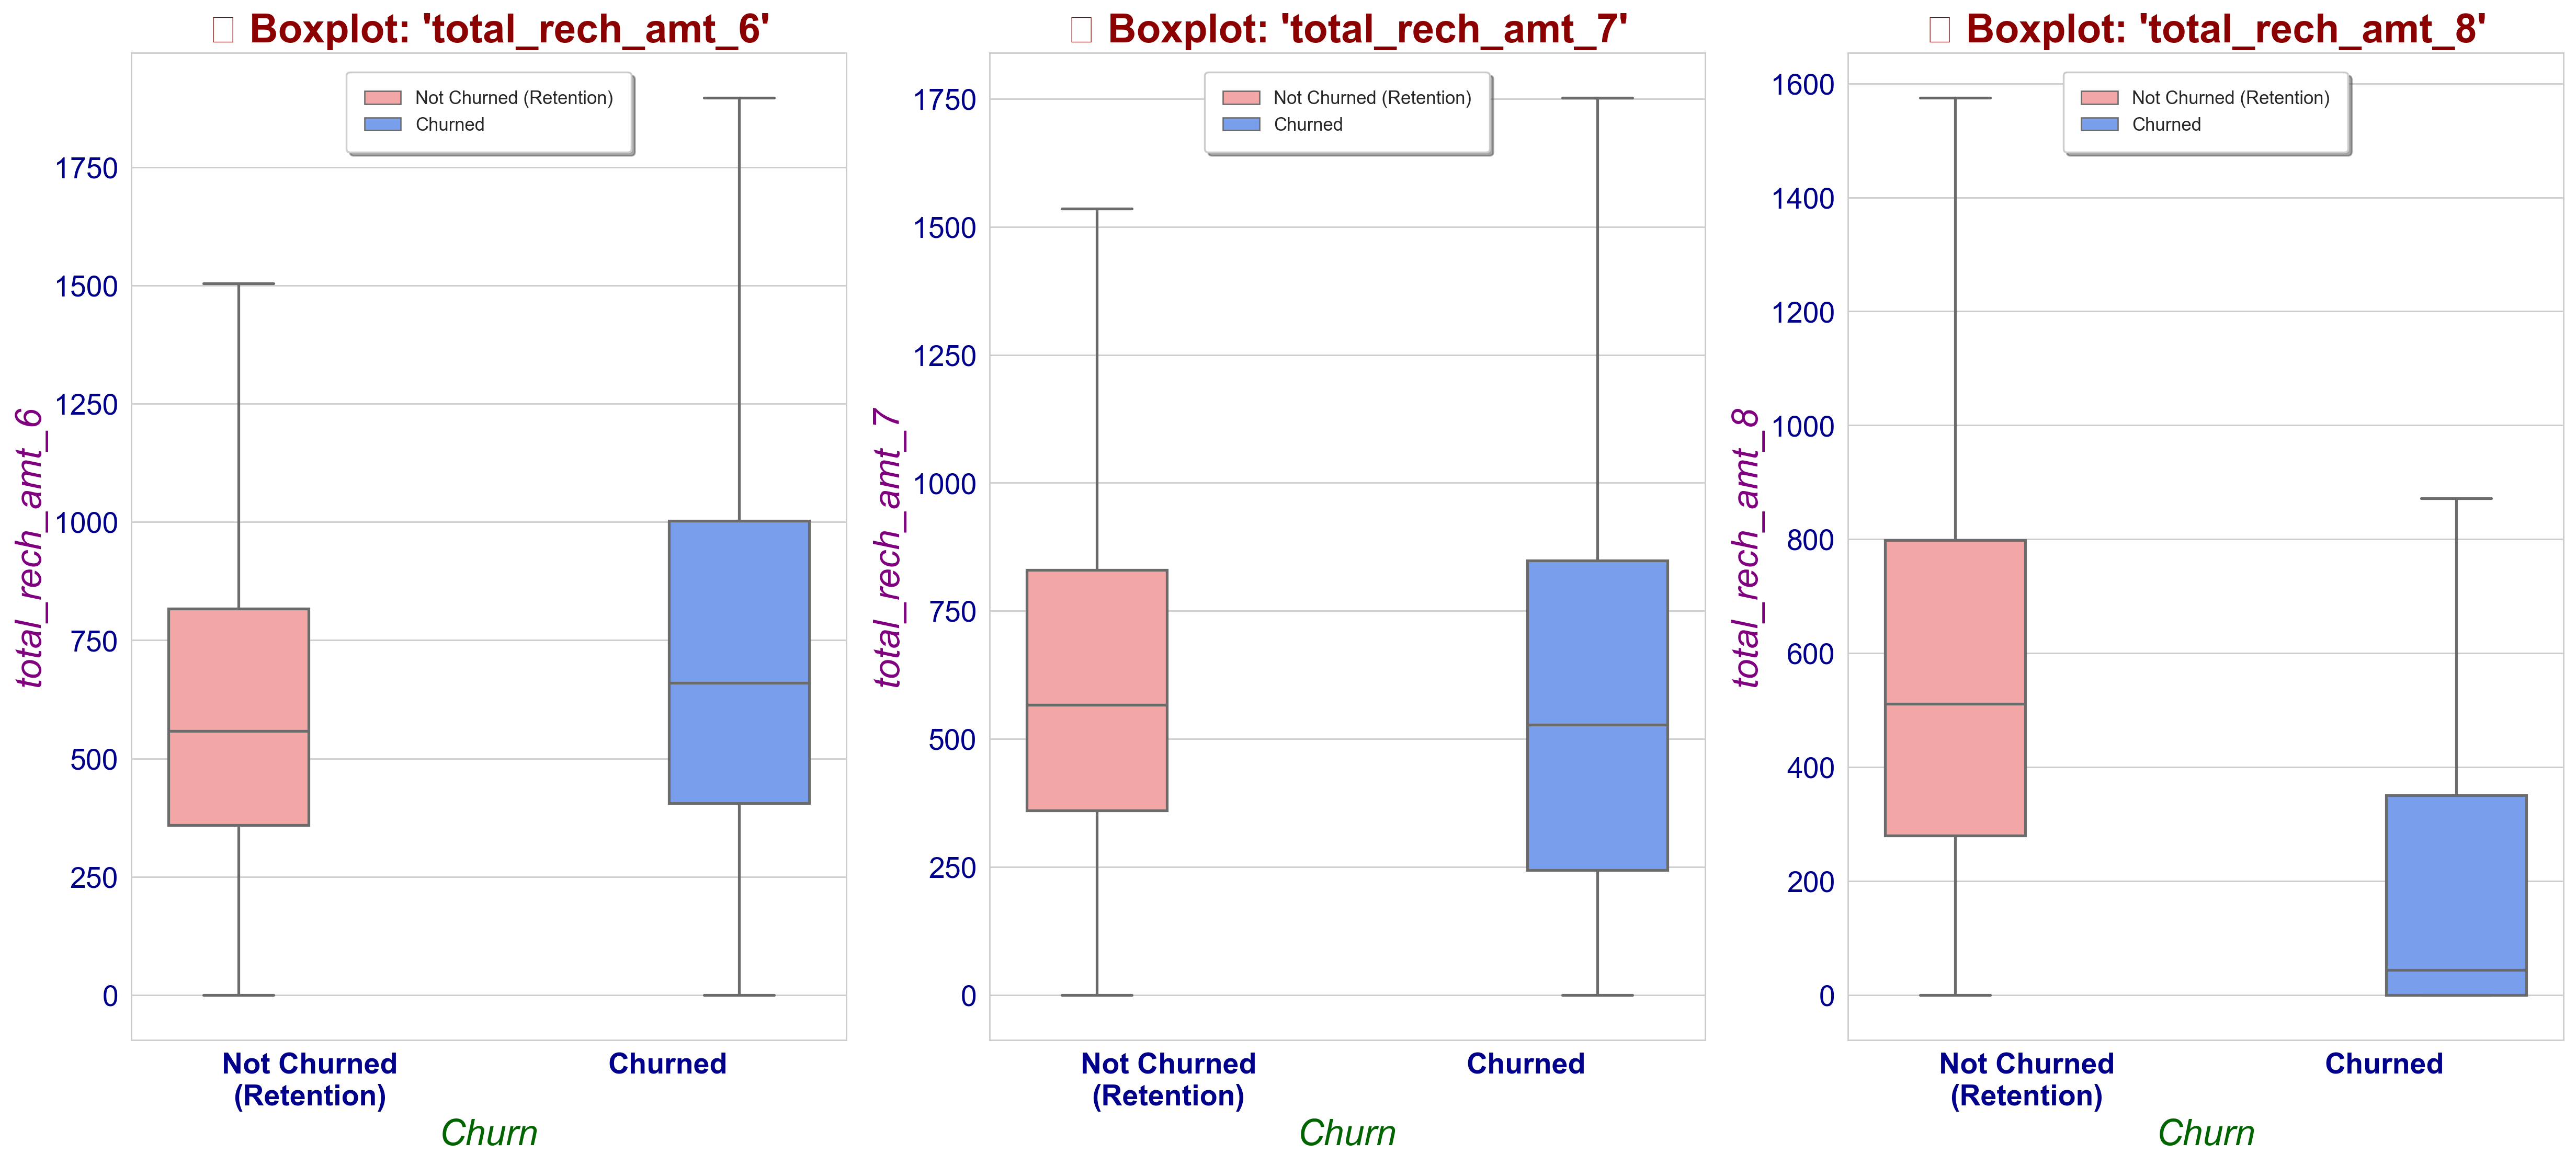

In [32]:
##Plotting boxplots for 'total_rech_amt' (calling plan recharges)
plot_boxplots_monthly('total_rech_amt')

**Observation:**  We can see a drop in the `total recharge amount` for churned customers in the 8th Month (Action Phase).

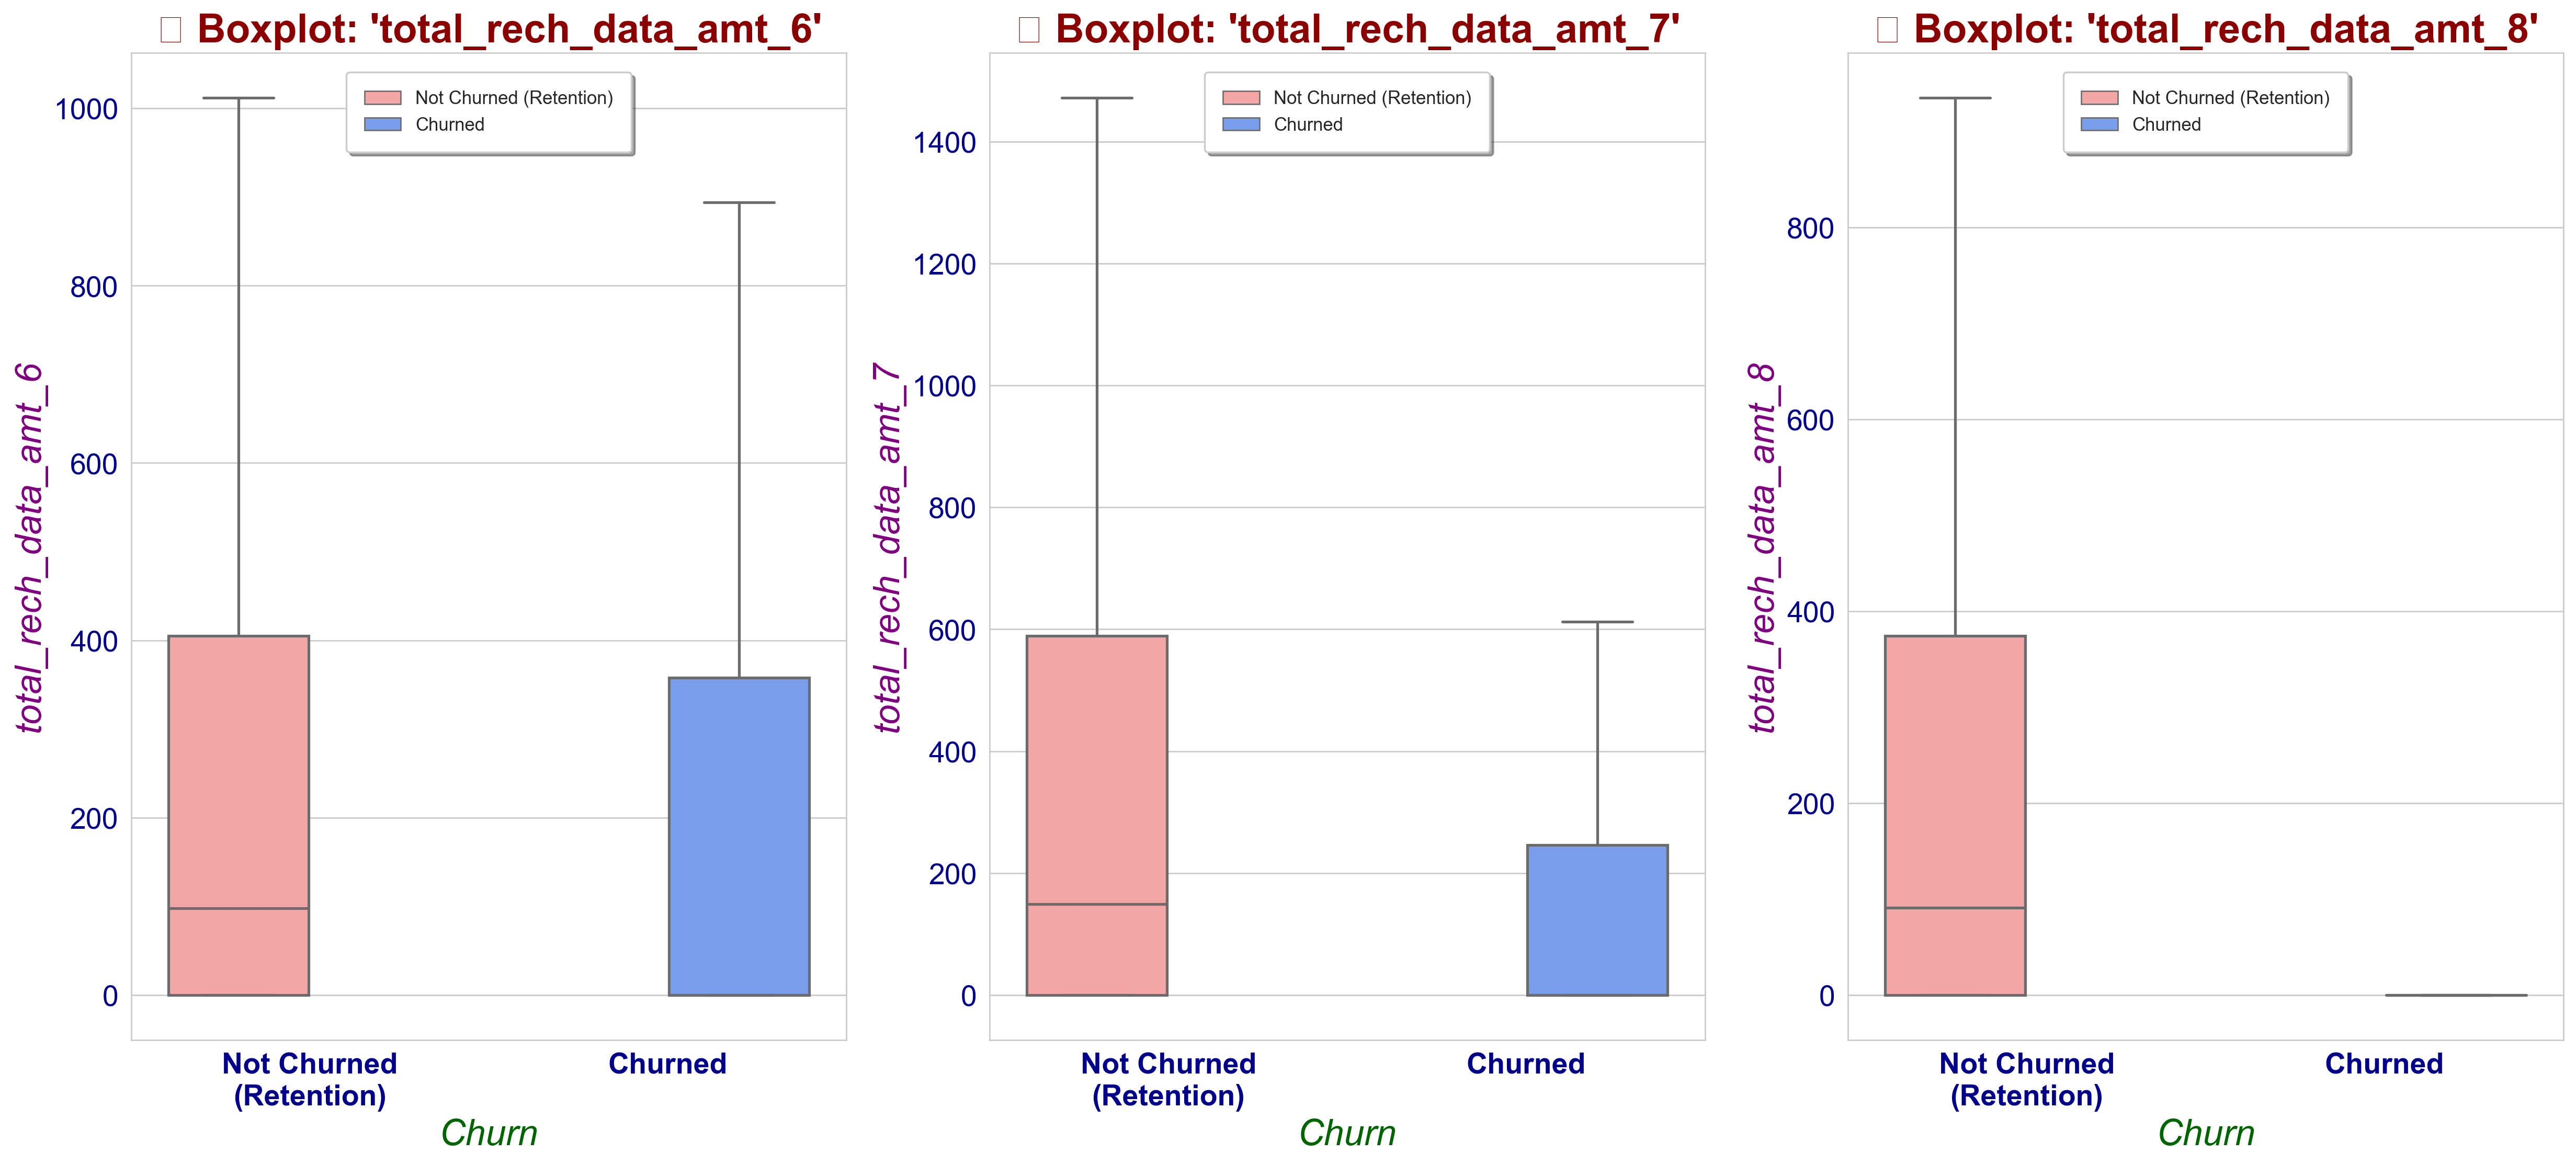

In [33]:
plot_boxplots_monthly('total_rech_data_amt')

**Observation:**  Again, a significant drop in the `total data recharge amount` is seen for churned customers in the 8th Month (Action Phase).

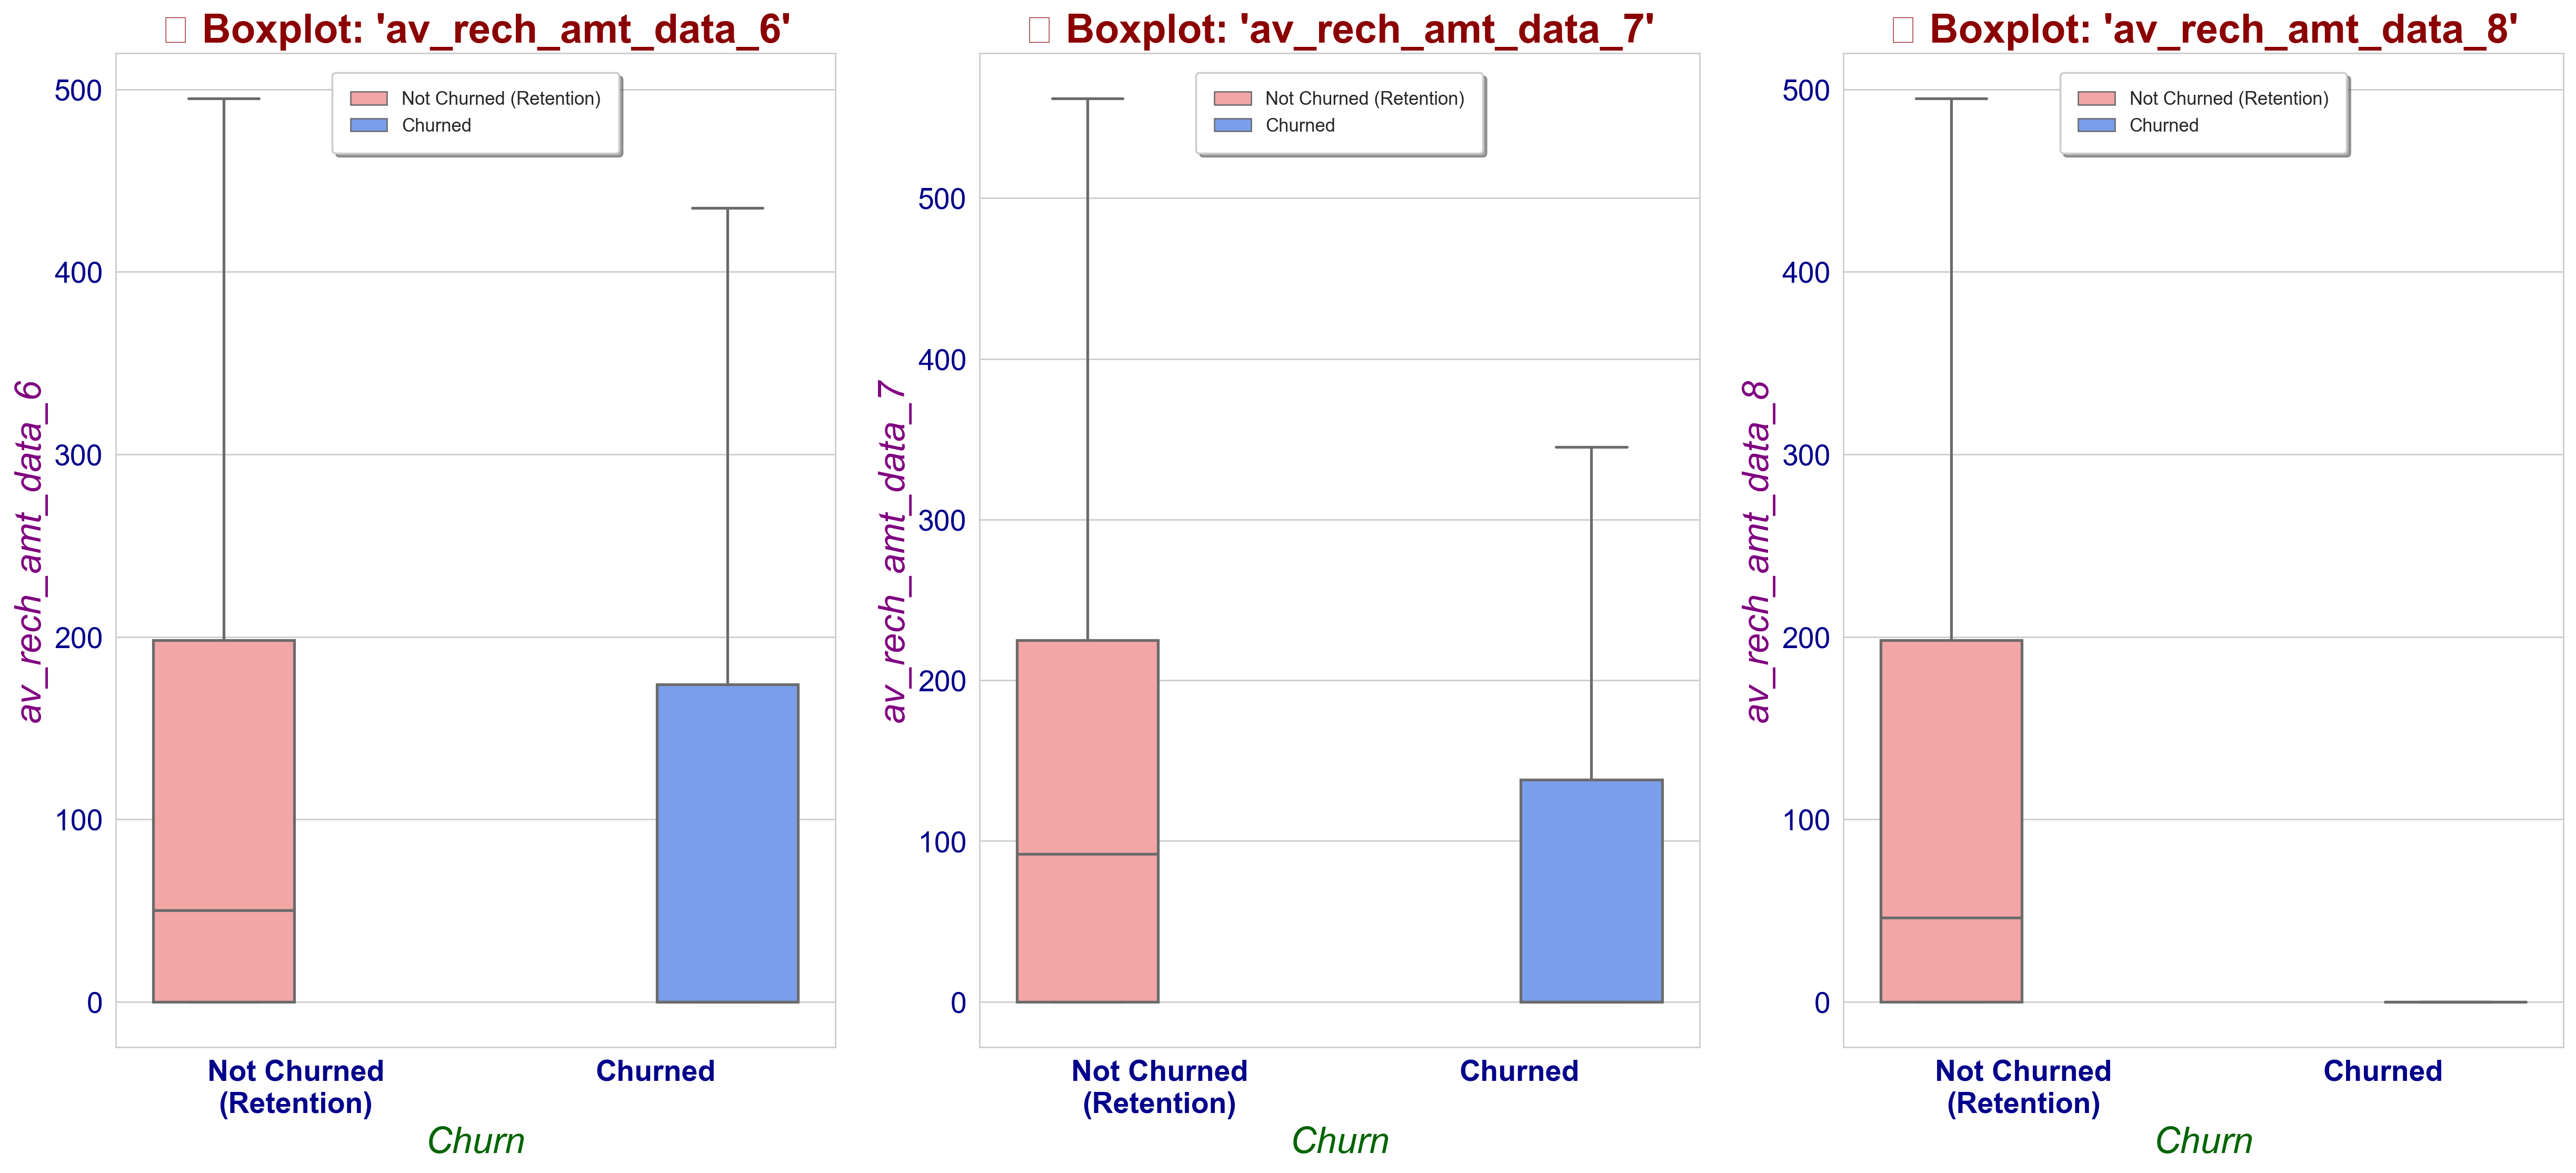

In [34]:
plot_boxplots_monthly('av_rech_amt_data')

**Observation:**  Again, a significant drop in the `average data recharge amount` is seen for churned customers in the 8th Month (Action Phase).

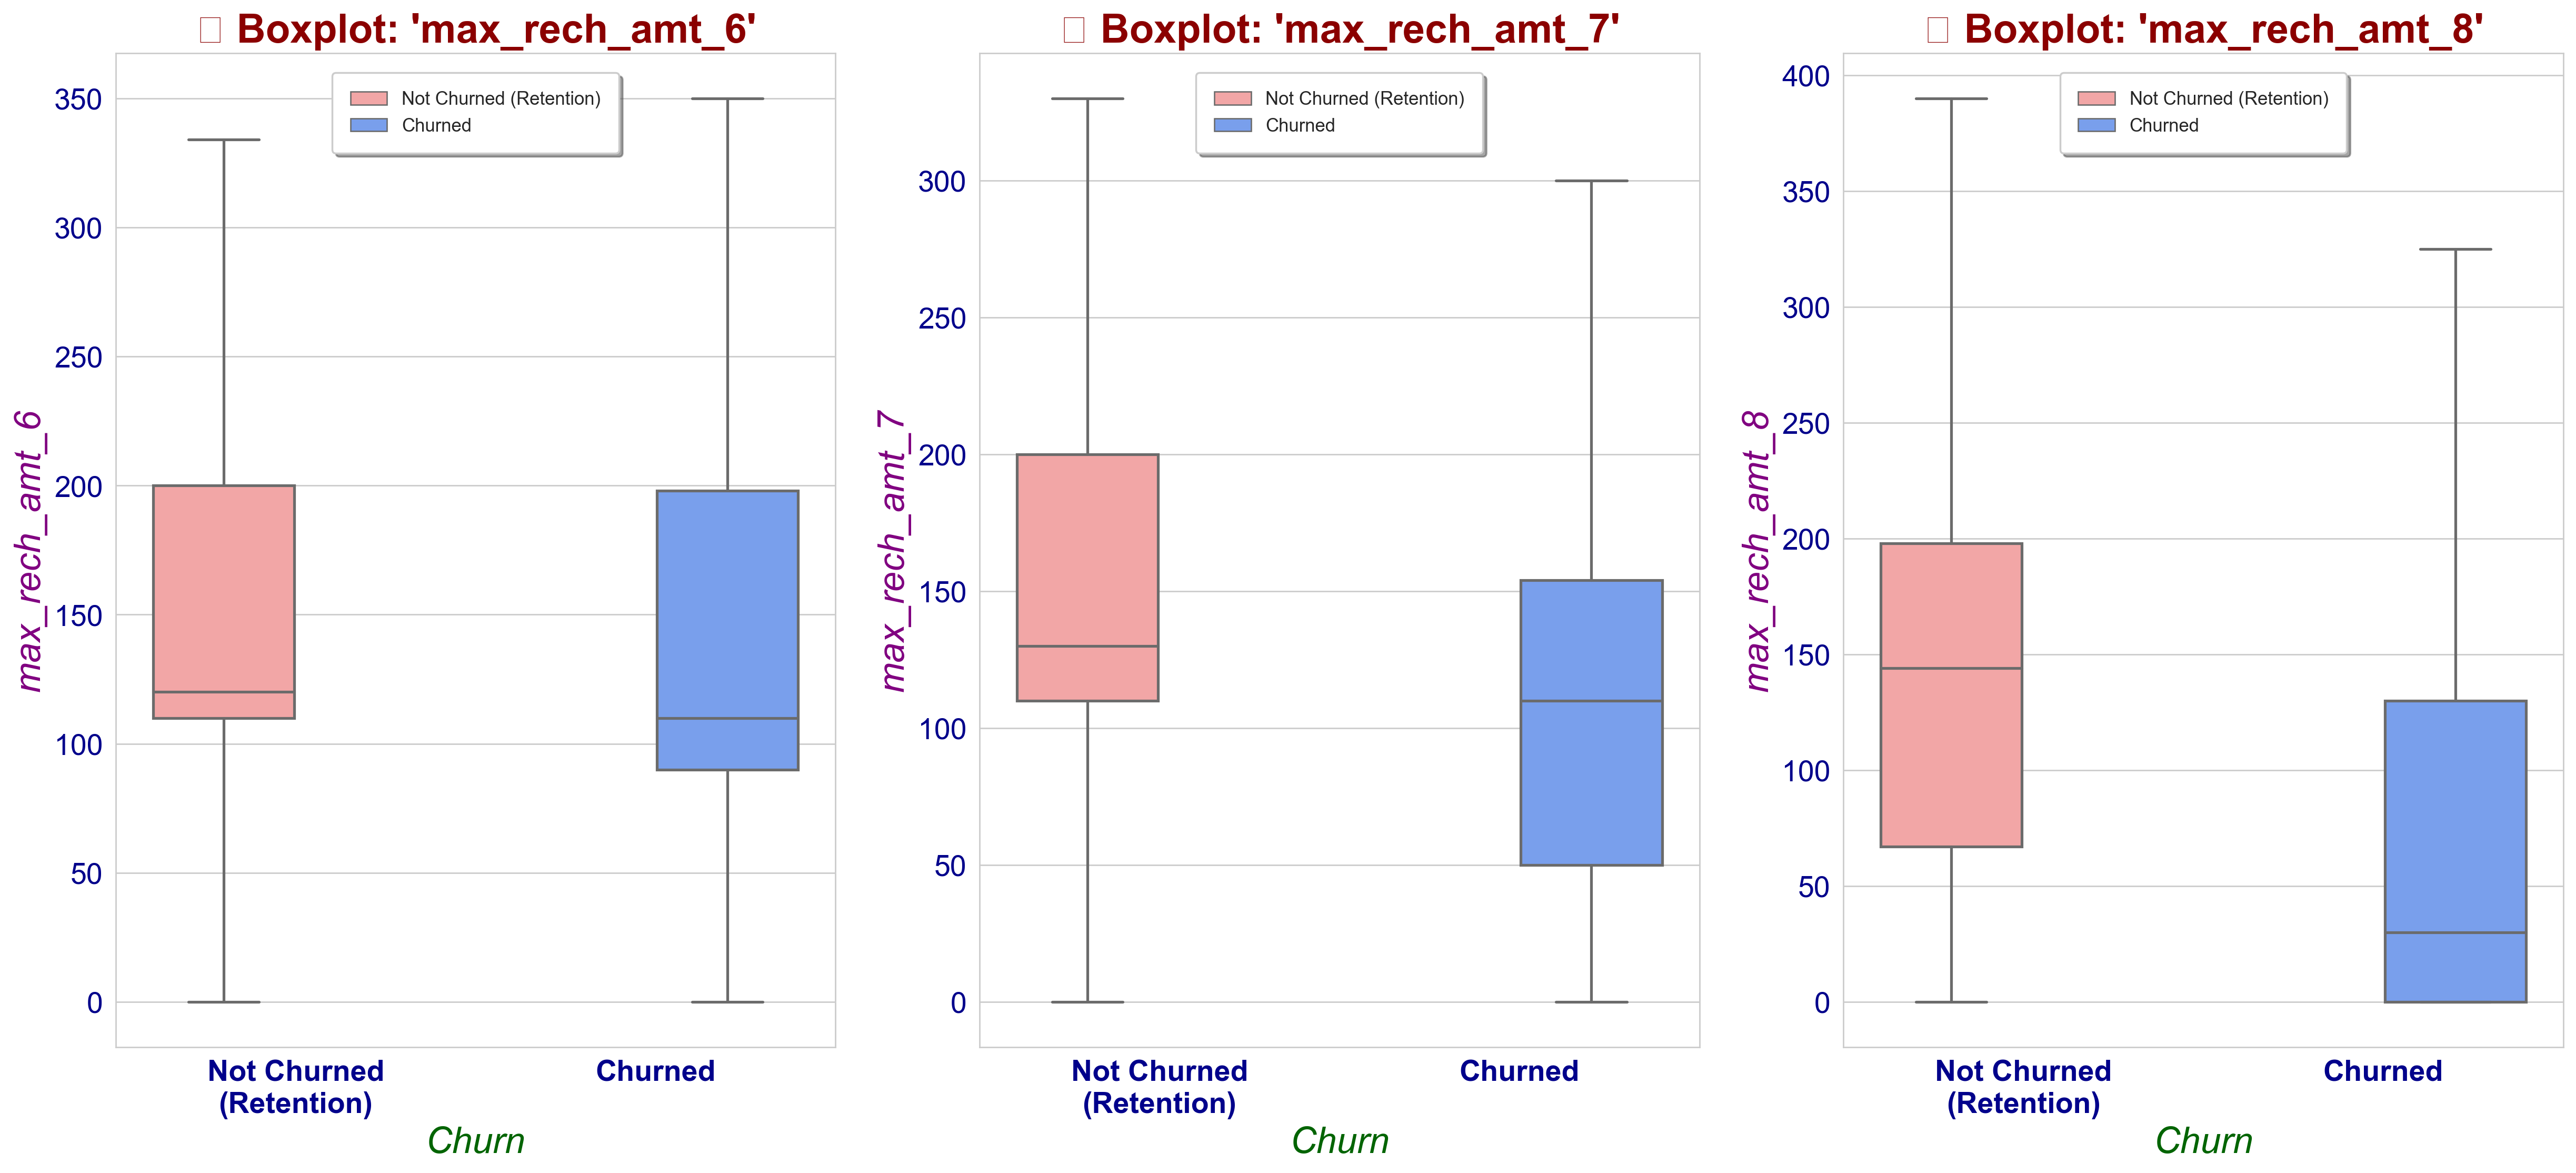

In [35]:
plot_boxplots_monthly('max_rech_amt')

**Observation:** A noticeable drop in the `maximum recharge amount` is seen in the 8th month (action phase) for churned customers.

In [36]:
##Let's check other 'rech_num' and 'max_rech_data' variables
other_rech = high_value_customers.columns[high_value_customers.columns.str.contains('rech_num|max_rech_data',regex=True)]
other_rech

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [37]:
(high_value_customers[other_rech].isnull().sum() / telecom_data.shape[0]) * 100

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     13.213132
max_rech_data_7     12.915129
max_rech_data_8     14.018140
dtype: float64

In [38]:
high_value_customers[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16740.000000     17038.000000     15935.000000
mean        139.804002       140.444712       136.353373
std         118.892926       120.295284       119.571138
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

In [39]:
##Imputing 'max_rech_data_*' columns with 0 (*columns: all 3 months - month 6, 7 and 8)
high_value_customers[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = high_value_customers[['max_rech_data_6','max_rech_data_7',\
                                                                                  'max_rech_data_8']].replace(np.nan, 0)

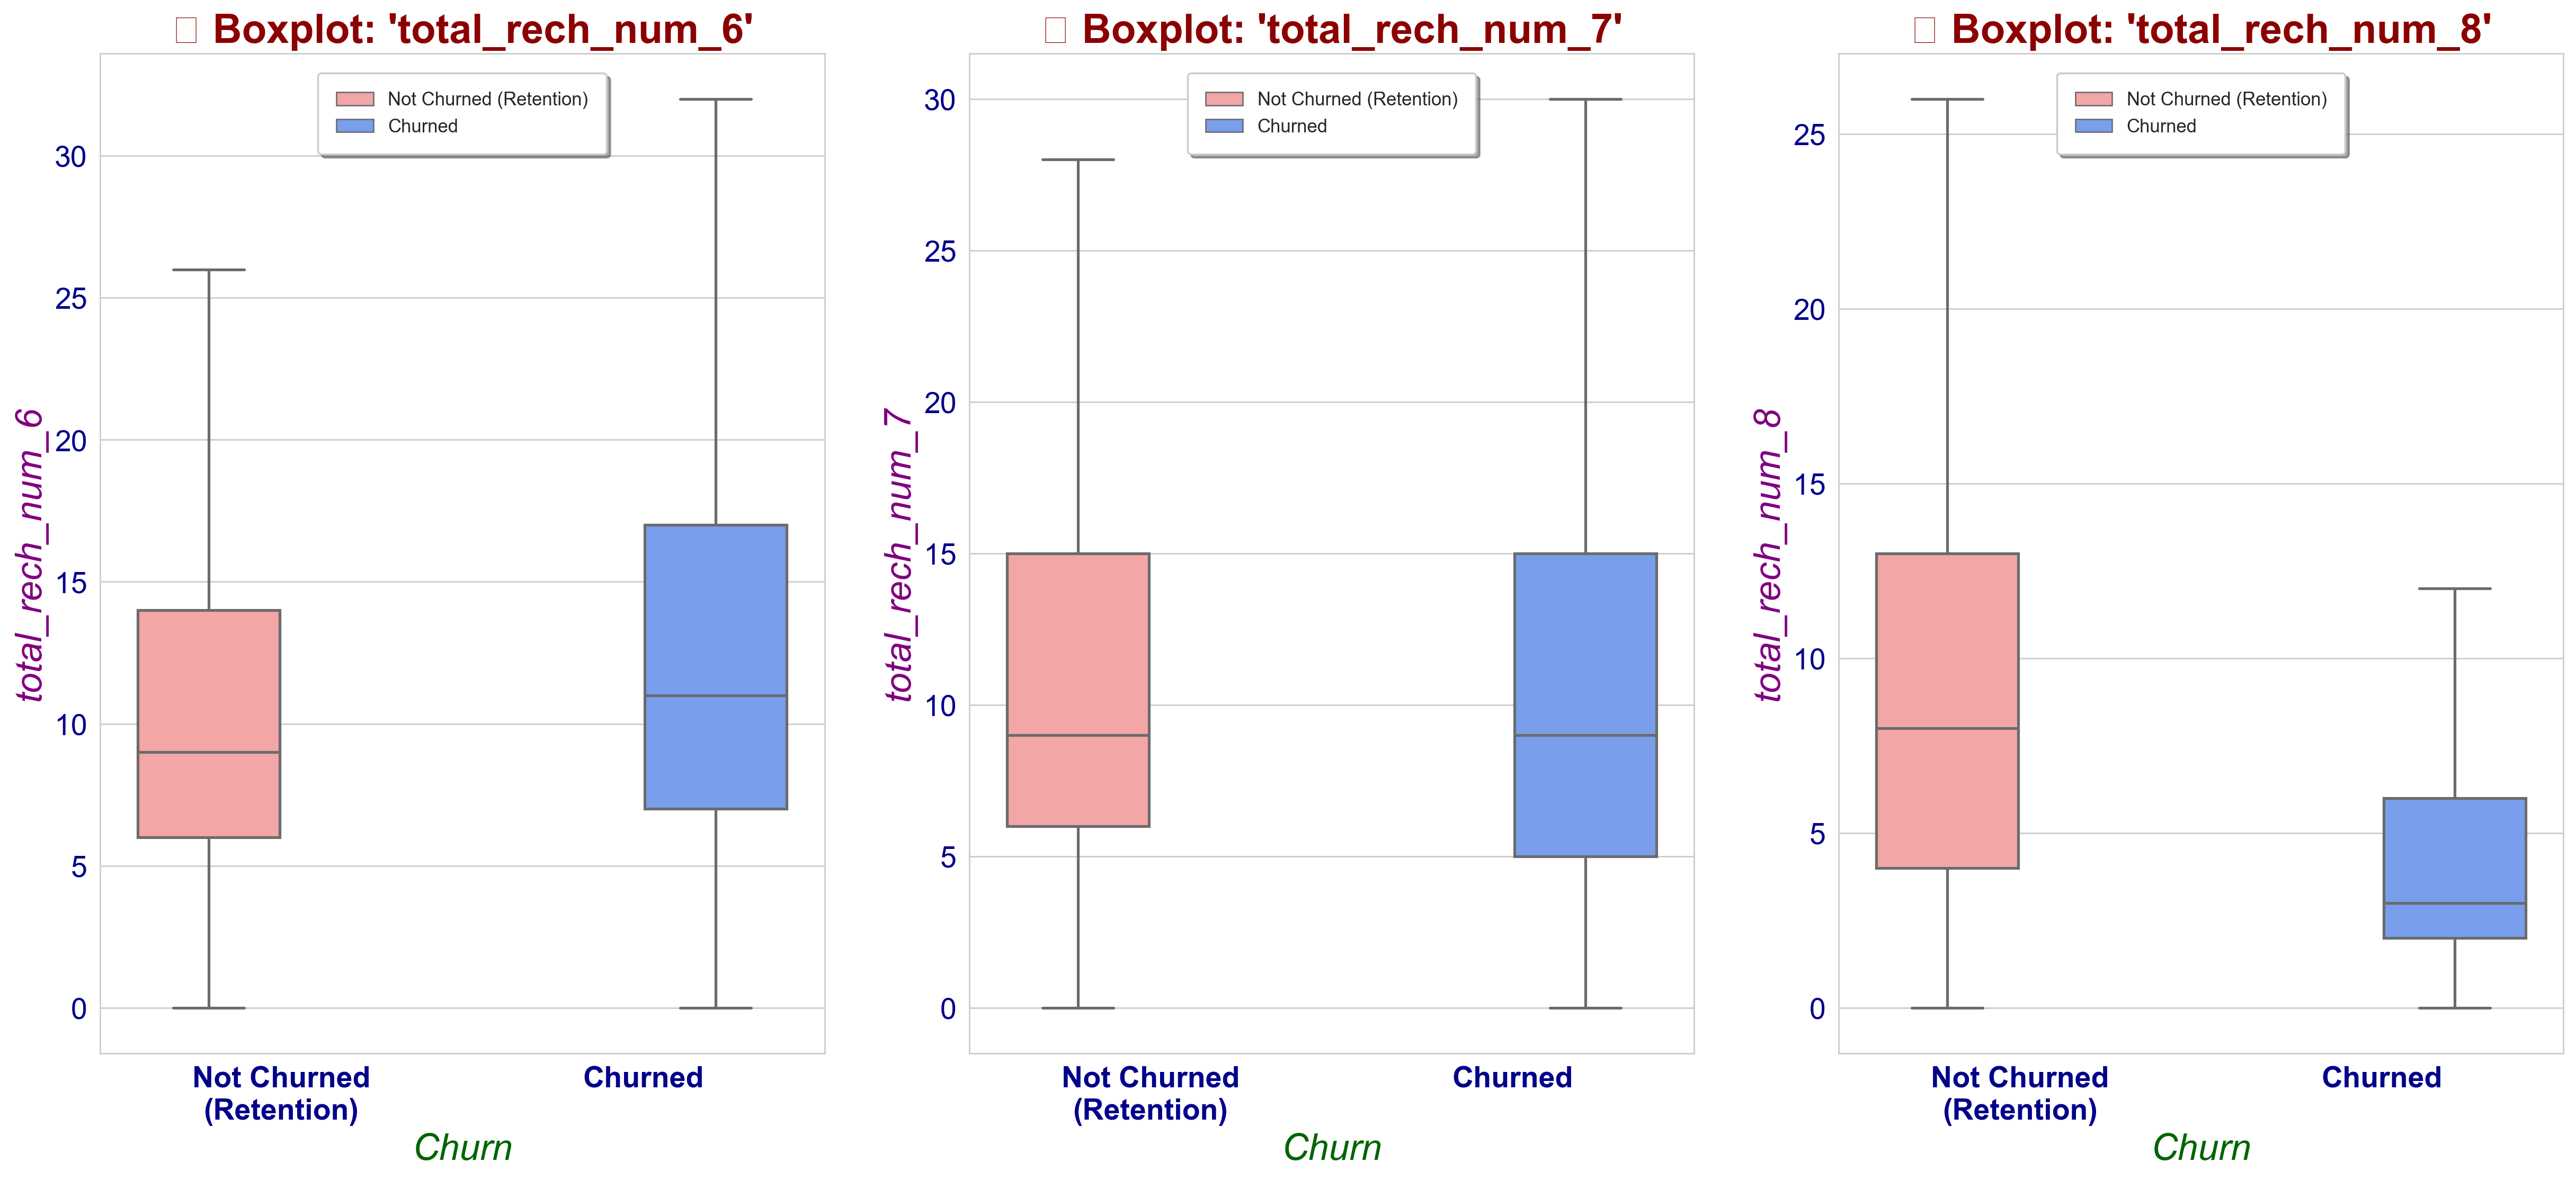

In [40]:
##Plotting boxplots for 'total_rech_num' 
plot_boxplots_monthly('total_rech_num')

**Observation:** A noticeable drop in the `total number of recharges` is seen in the 8th month (action phase) for churned customers.

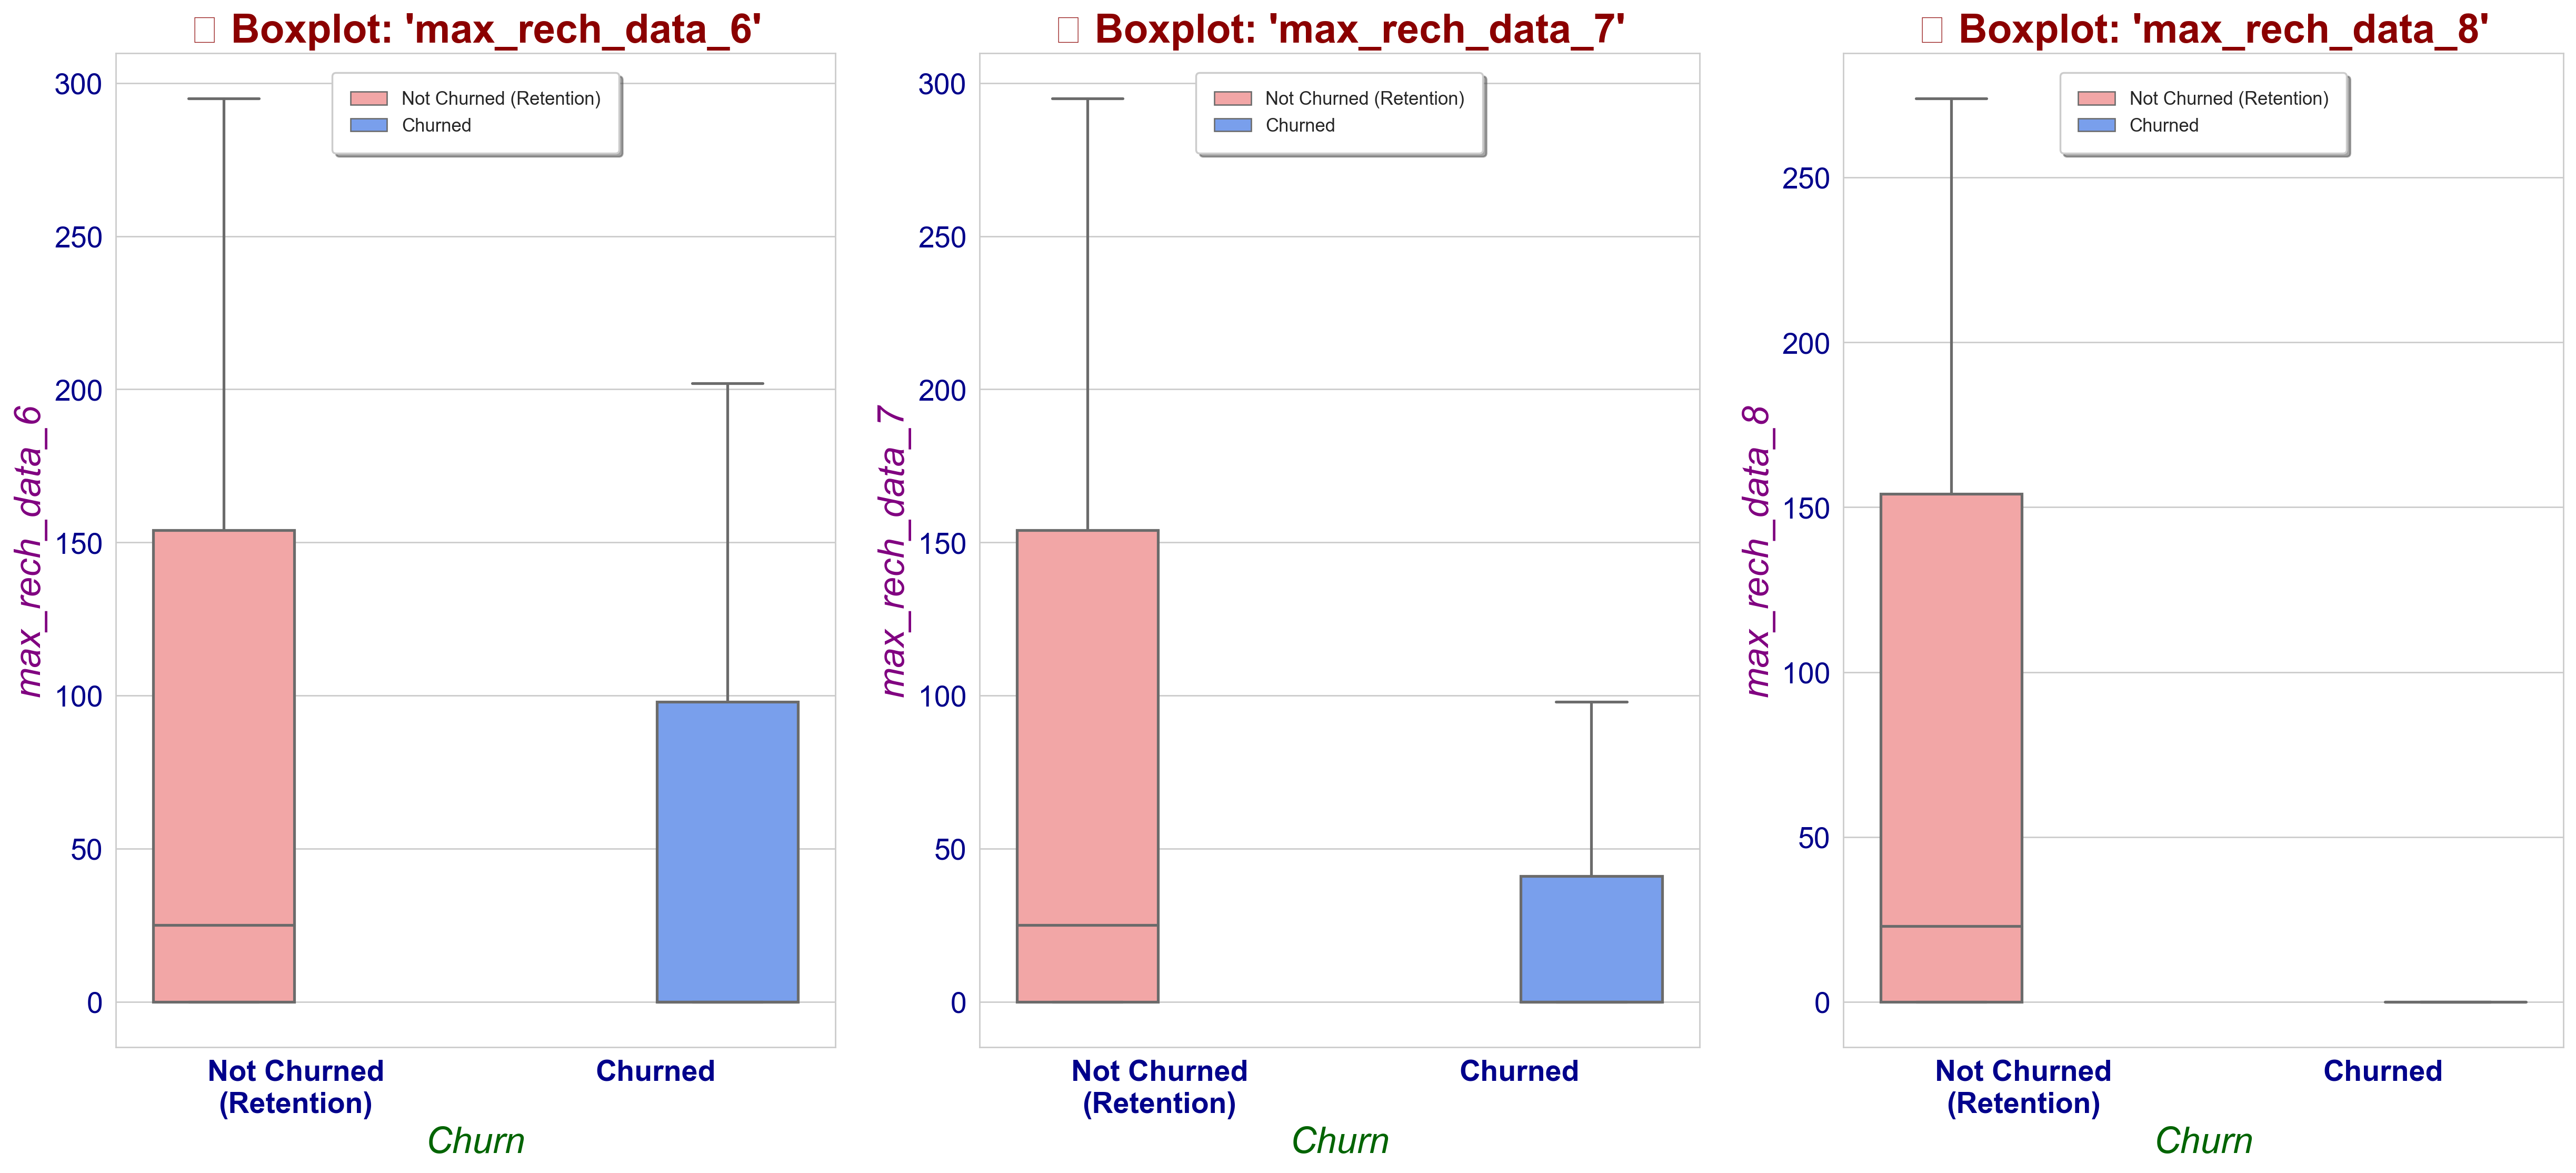

In [41]:
##Plotting boxplots for 'max_rech_data' 
plot_boxplots_monthly('max_rech_data')

**Observation:** A significant drop in the `max_rech_data` is seen in the 8th month (action phase) for churned customers.

In [42]:
all_rech_vars = high_value_customers.columns[high_value_customers.columns.str.contains('rech_amt|rech_data_amt|rech_num|max_rech_data')]

# Subset with only recharge-related columns
all_rech = high_value_customers[all_rech_vars]

# Calculating percentage of missing values
missing_percent_all_rech = (all_rech.isnull().sum() / high_value_customers.shape[0]) * 100
missing_percent_all_rech

total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_data_6          0.0
max_rech_data_7          0.0
max_rech_data_8          0.0
av_rech_amt_data_6       0.0
av_rech_amt_data_7       0.0
av_rech_amt_data_8       0.0
total_rech_data_amt_6    0.0
total_rech_data_amt_7    0.0
total_rech_data_amt_8    0.0
dtype: float64

#### (b) Visualizing 2G and 3G based usage attributes

In [43]:
usage_2g_3g_vars = list(high_value_customers.columns[high_value_customers.columns.str.contains('2g|3g',regex=True)])
usage_2g_3g_vars

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [44]:
##Check for missing values
usage_2g_3g = high_value_customers[usage_2g_3g_vars]
missing_percent_all_rech = ((usage_2g_3g.isnull().sum() / high_value_customers.shape[0]) * 100).sort_values(ascending=False)
missing_percent_all_rech

count_rech_2g_8    46.799987
arpu_2g_8          46.799987
count_rech_3g_8    46.799987
arpu_3g_8          46.799987
count_rech_2g_6    44.112443
arpu_3g_6          44.112443
count_rech_3g_6    44.112443
arpu_2g_6          44.112443
count_rech_2g_7    43.117551
arpu_3g_7          43.117551
arpu_2g_7          43.117551
count_rech_3g_7    43.117551
vol_3g_mb_8         0.000000
sachet_2g_8         0.000000
jul_vbc_3g          0.000000
aug_vbc_3g          0.000000
sachet_3g_8         0.000000
sachet_3g_7         0.000000
sachet_3g_6         0.000000
monthly_3g_8        0.000000
monthly_3g_7        0.000000
monthly_3g_6        0.000000
sachet_2g_7         0.000000
vol_3g_mb_7         0.000000
sachet_2g_6         0.000000
monthly_2g_8        0.000000
monthly_2g_7        0.000000
monthly_2g_6        0.000000
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
jun_vbc_3g          0.000000
dtype: float64

In [45]:
##Dropping 'arpu_2g', 'arpu_3g', 'count_rech_2g' and 'count_rech_3g' based features (revenue_based)
drop_vars = list(high_value_customers.columns[high_value_customers.columns.str.contains('arpu_2g|arpu_3g|count_rech_2g_|count_rech_3g')])
high_value_customers.drop(drop_vars, axis=1, inplace=True)

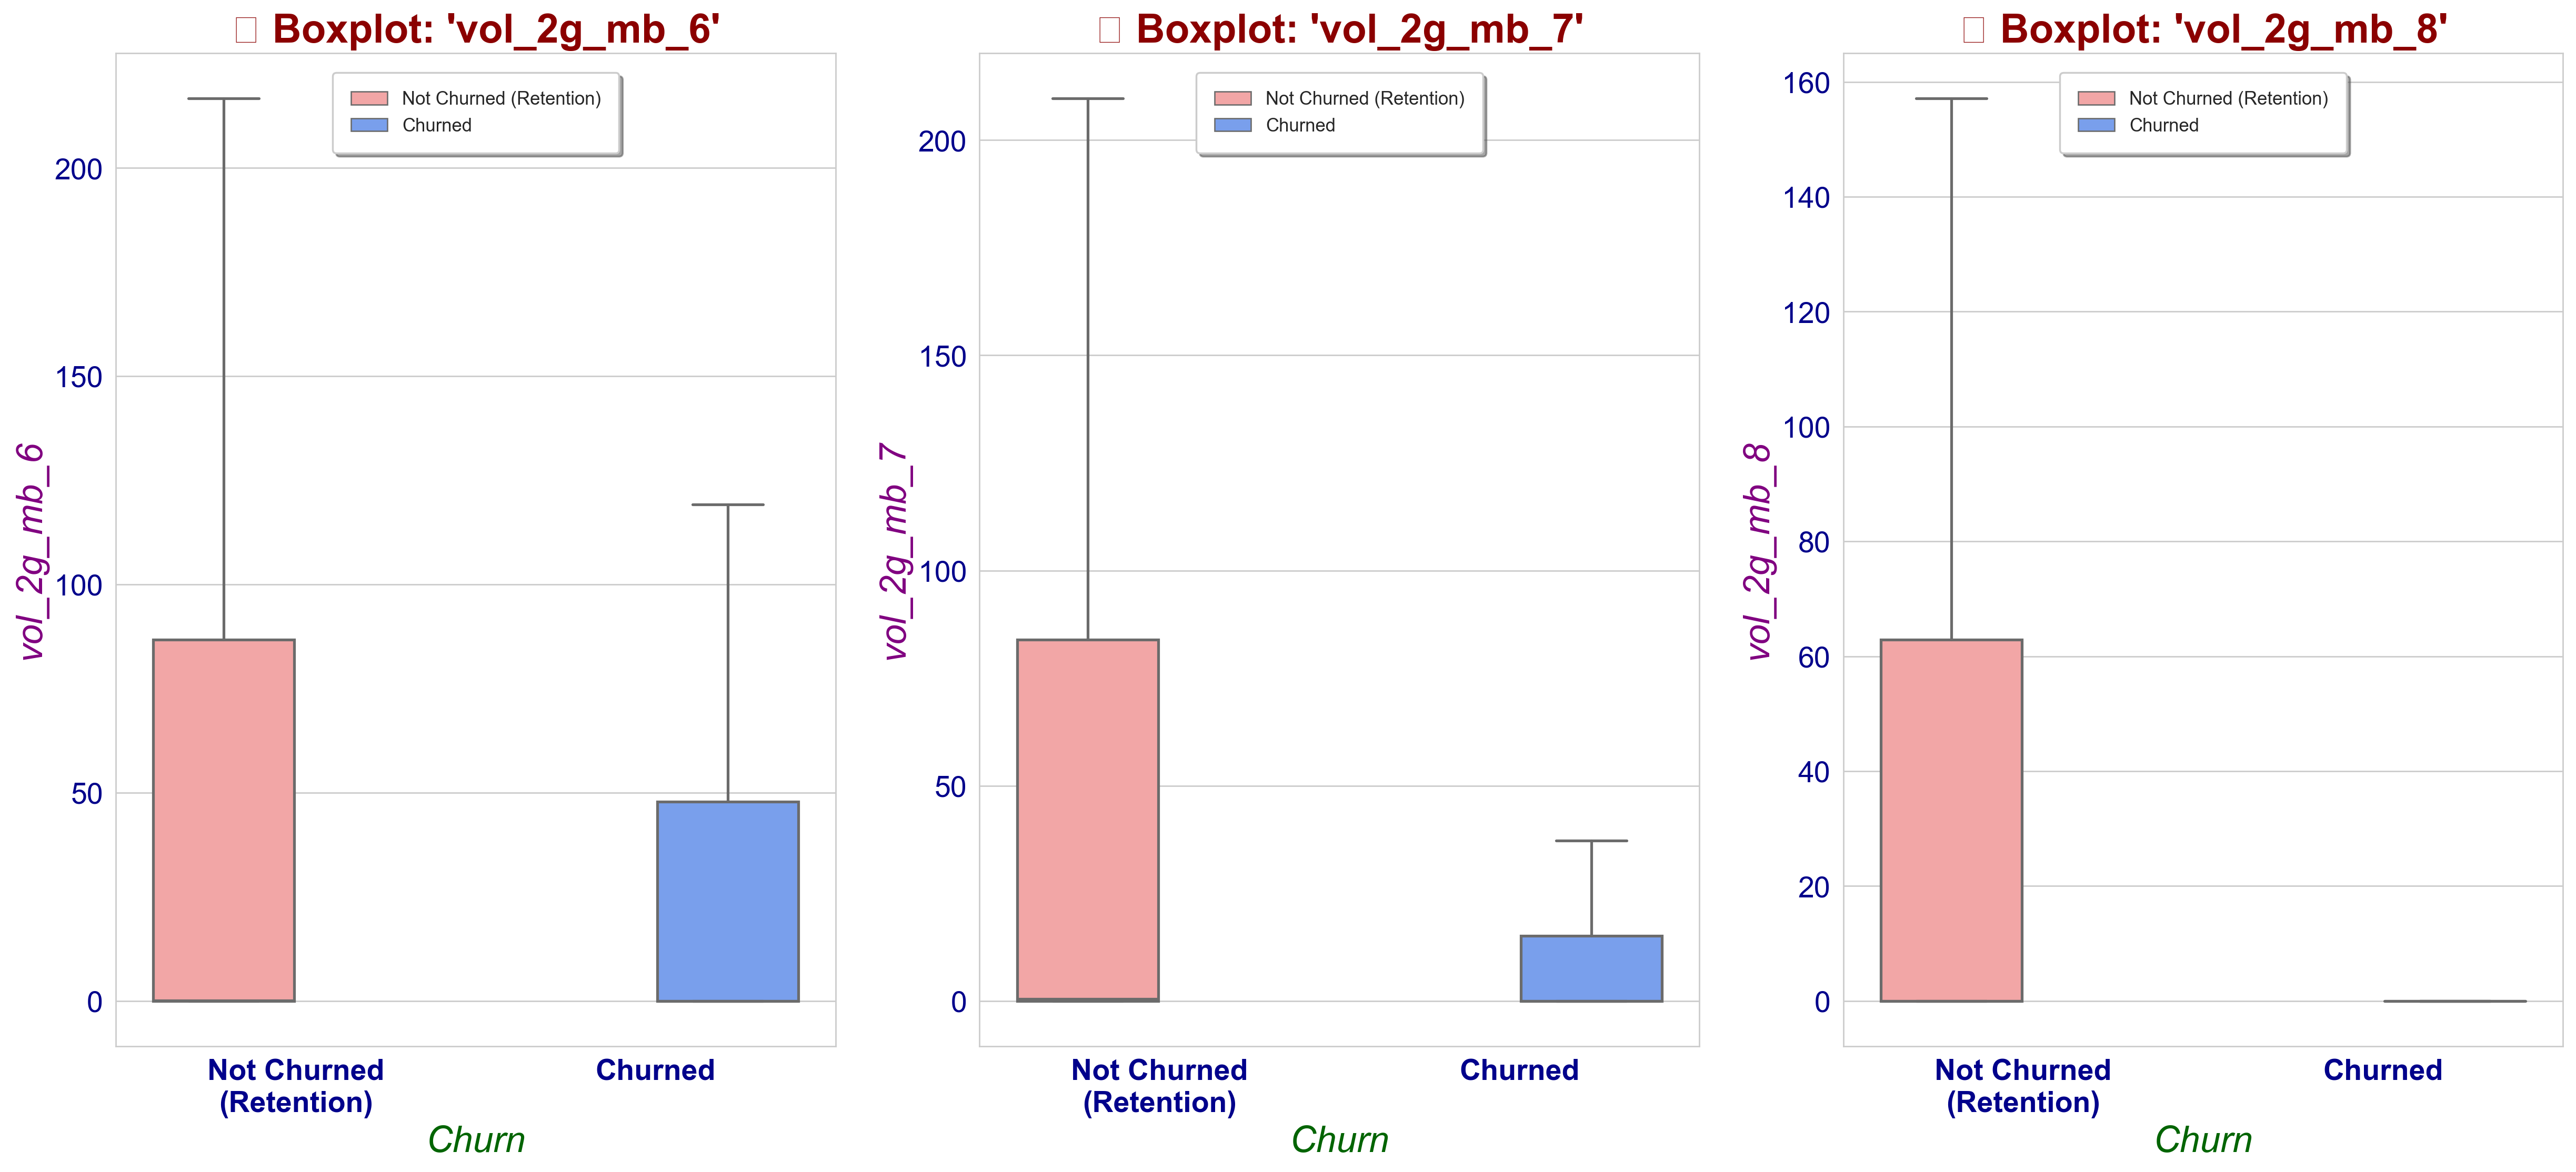

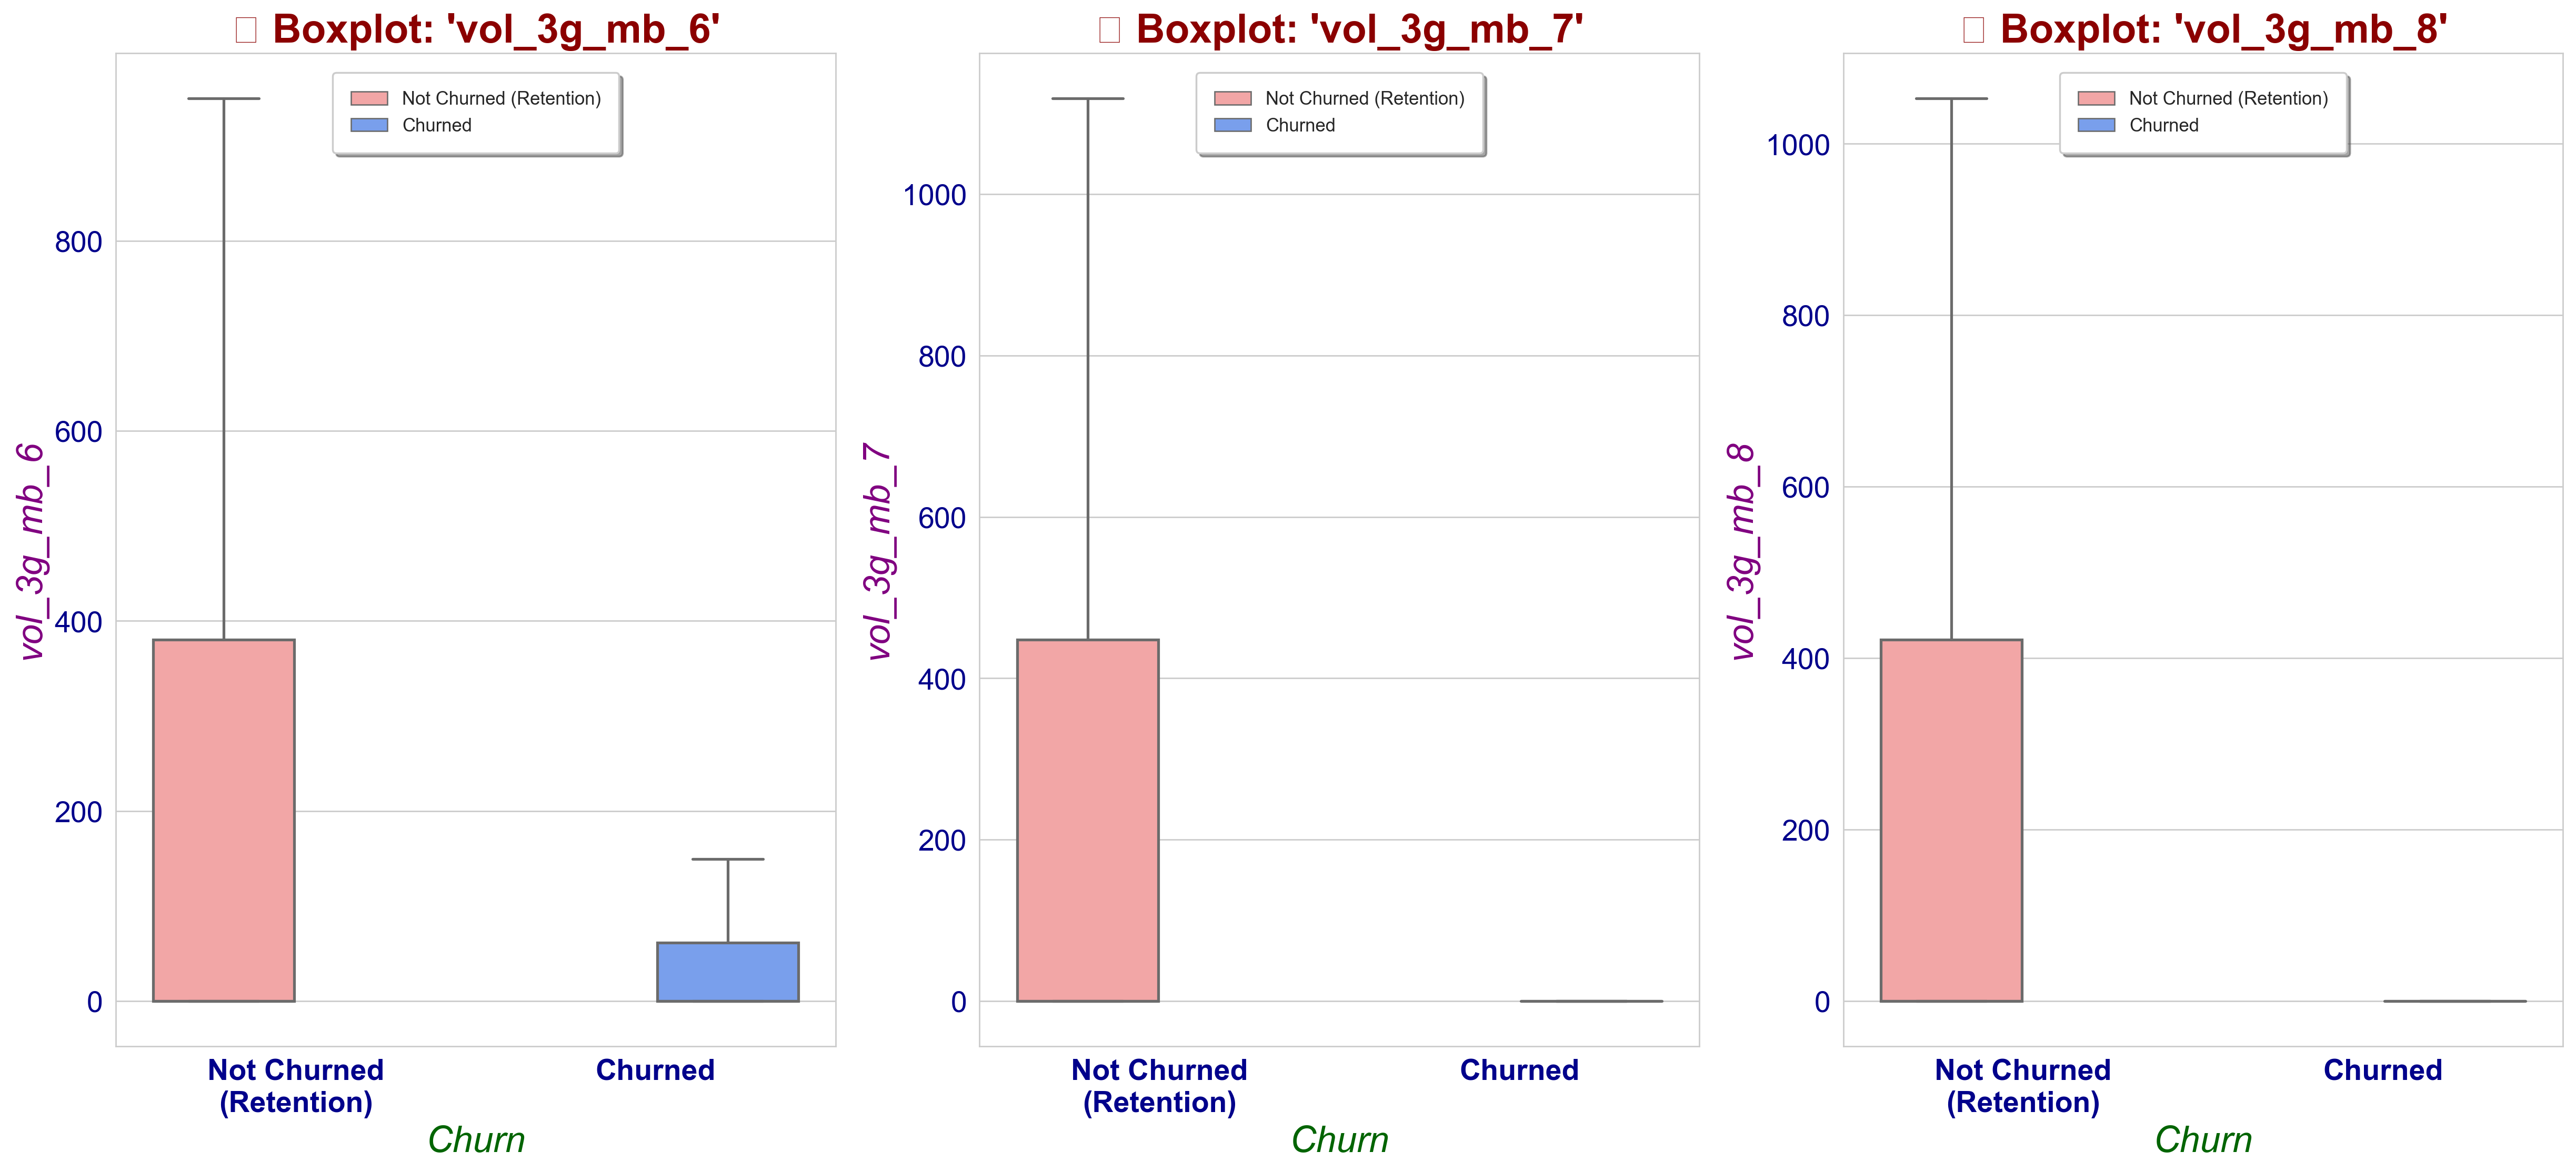

In [46]:
##Plotting volume of data usage:  

##Plotting volume of 2G data usage features:
plot_boxplots_monthly('vol_2g_mb')

##Plotting volume of 3G data usage features:
plot_boxplots_monthly('vol_3g_mb')

**Observations:**<br>(i) The `volume of 2G and 3G data usage` substantially drops in the 8th month(action phase) for churned customers.<br>(ii) Also, we see the `usage of 3G data` is comparatively `lesser than that of 2G data`, though the drop seems to follow similar pattern.

In [ ]:
##Defining a function for barplots for features belonging to months (6), (7) and (8) respectively with churn and no churn hue.
def plot_barplots_monthly(feature, months=[6, 7, 8]):
    """Plots bar plots for a given feature across multiple months with churn status."""
    plt.figure(figsize=(24, 10), dpi=250)
    sns.set_style("whitegrid")
    
    df = high_value_customers.copy()
    colors = "coolwarm" 

    for i, month in enumerate(months, 1):
        plt.subplot(1, len(months), i)
        ax = sns.barplot(
            data=df, 
            y=f"{feature}_{month}", 
            x="churn", 
            hue="churn", 
            palette=colors
        )
        ax.set_xticklabels(['Not Churned\n(Retention)', 'Churned'], fontsize=18)
        plt.title(f"📊 Barplot: '{feature}_{month}'", fontsize=22, fontweight='bold', color="darkred")
        plt.ylabel(f"{feature}_{month}", fontsize=20, fontstyle='italic', color="purple")
        plt.xlabel("Churn", fontsize=20, fontstyle='italic', color="darkgreen")
        plt.xticks(fontsize=16, color="darkblue")
        plt.yticks(fontsize=16, color="darkblue")

        # Customize legend
        legend = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
        legend.get_texts()[0].set_text('Not Churned (Retention)')
        legend.get_texts()[1].set_text('Churned')

    plt.show()

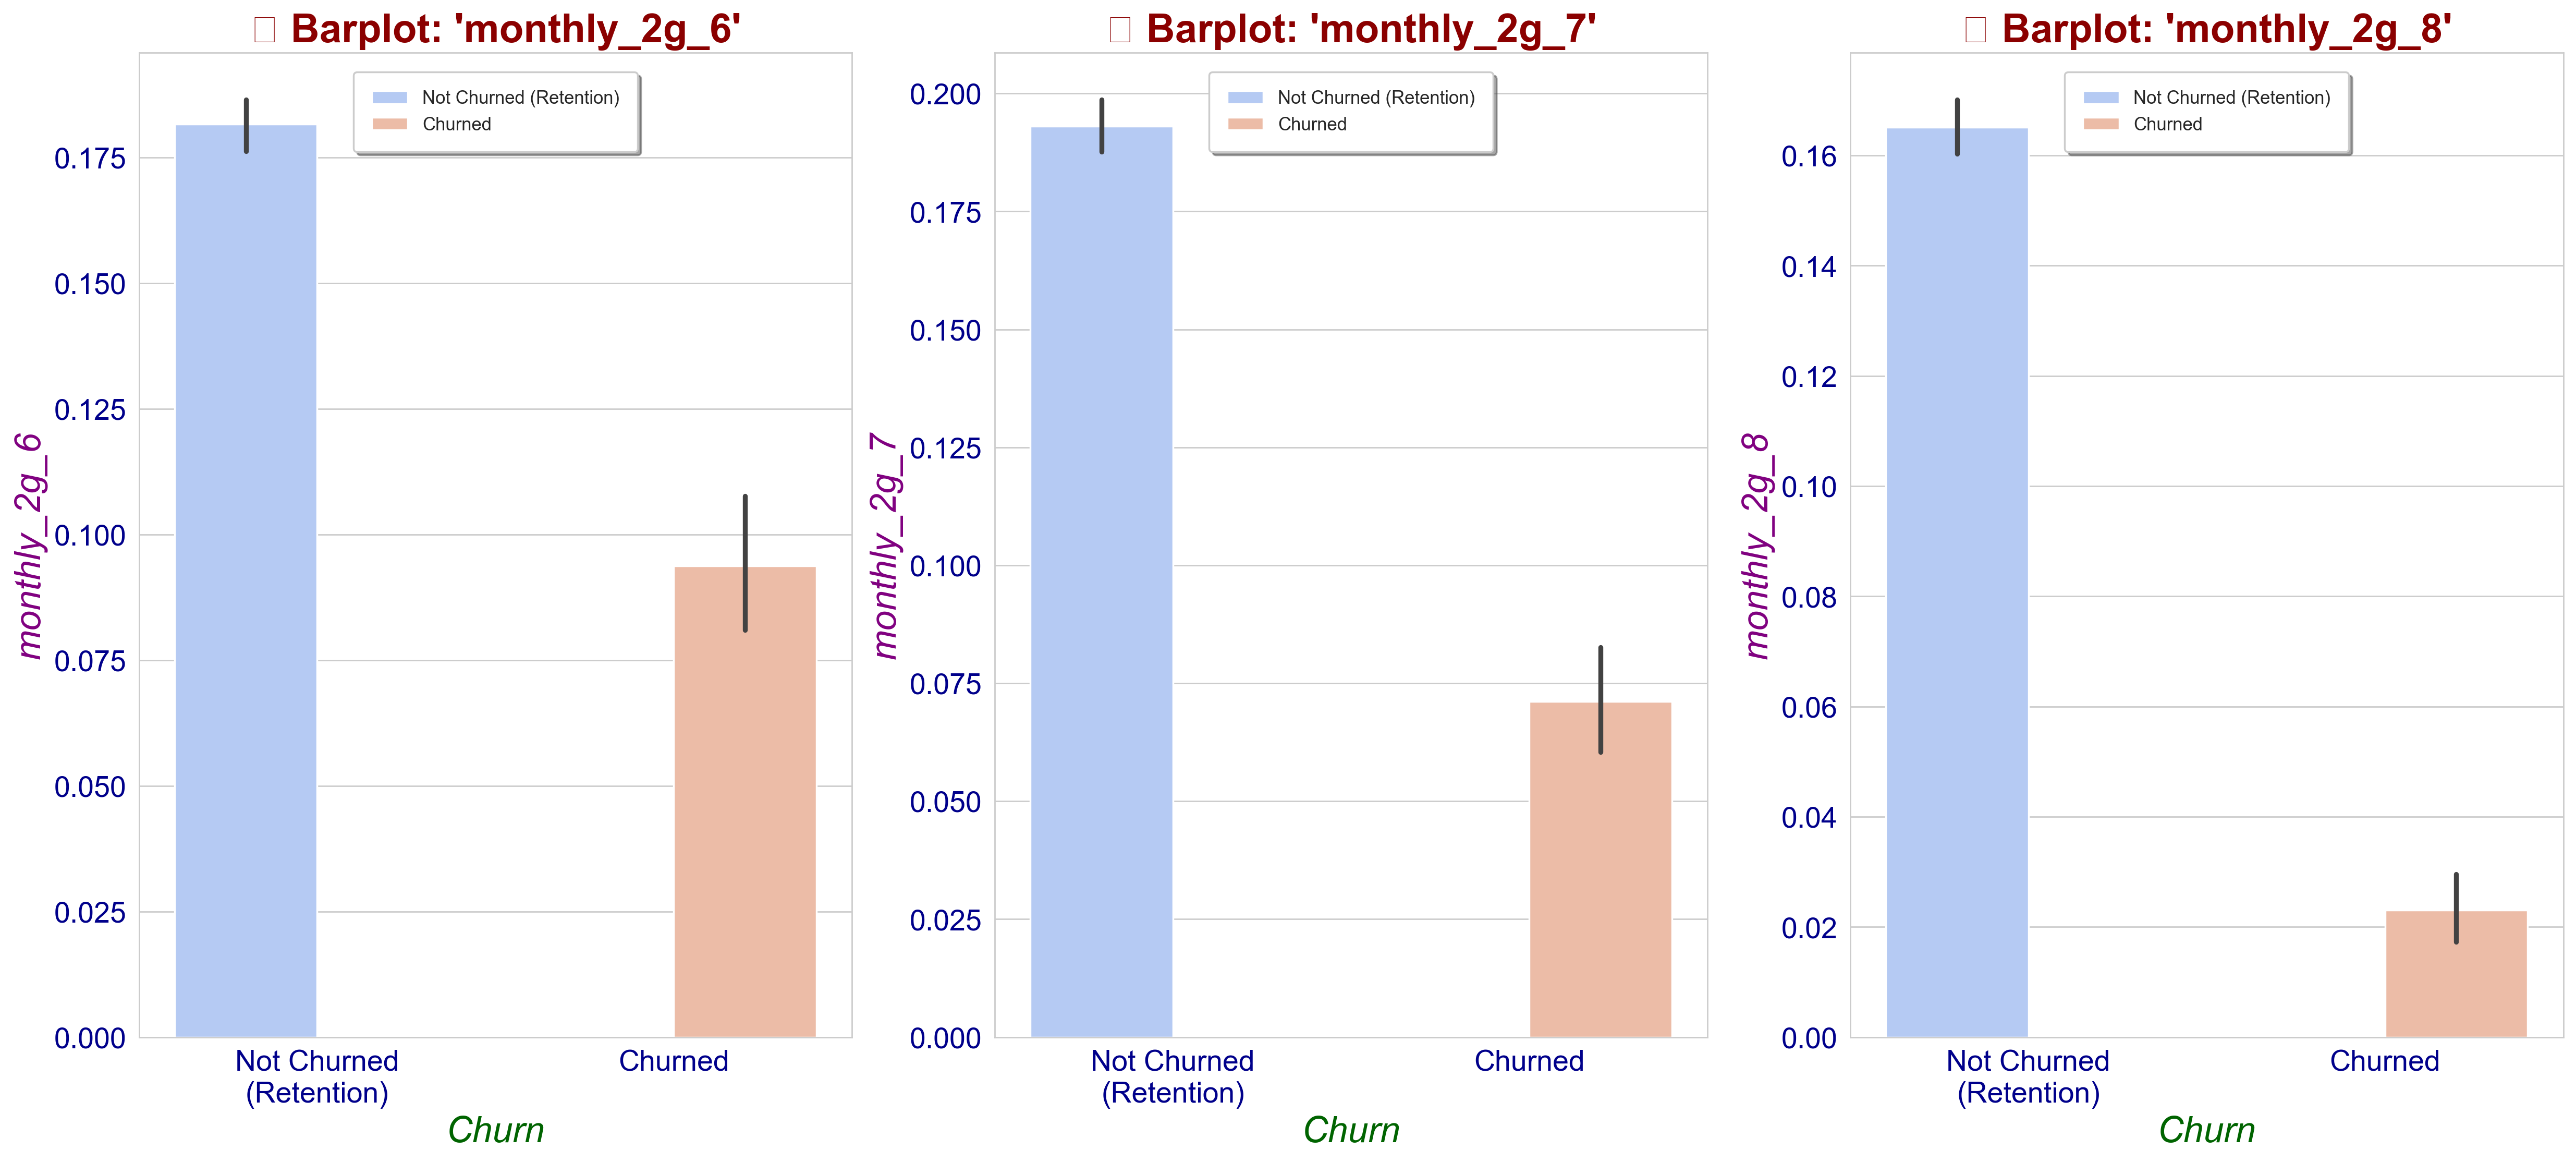

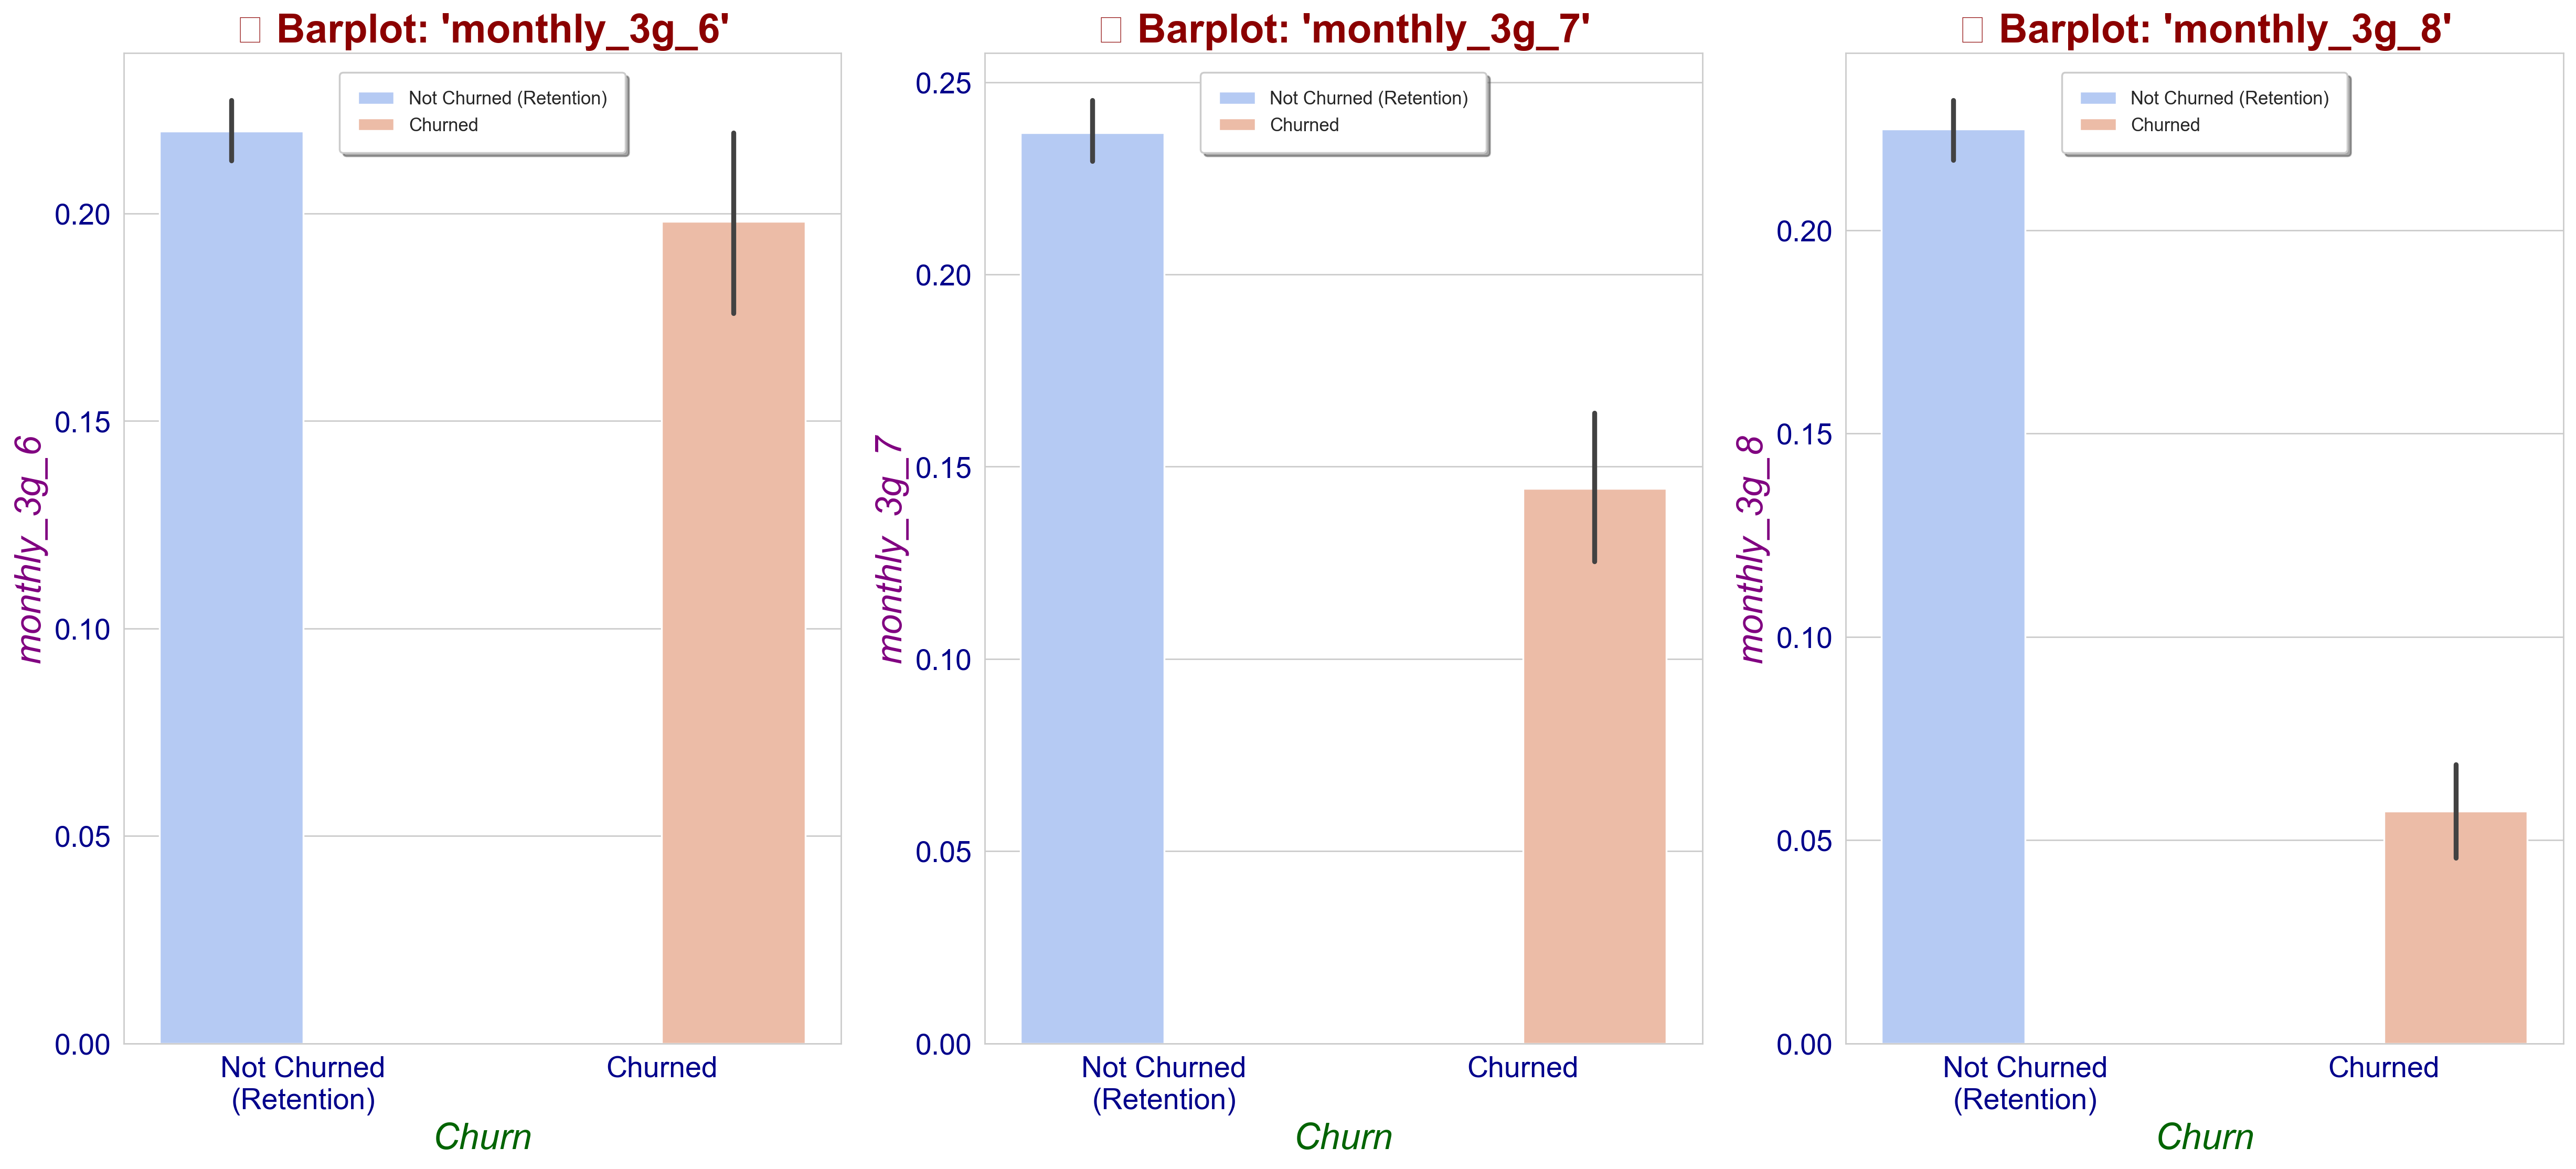

In [ ]:
#Barplots for 'monthly_2g' and 'monthly_3g' usage check
plot_barplots_monthly('monthly_2g')
plot_barplots_monthly('monthly_3g')

**Observation:** Again we can see a drop in` monthly 2G and 3G subscriptions` for churned customers in 8th Month(action phase)

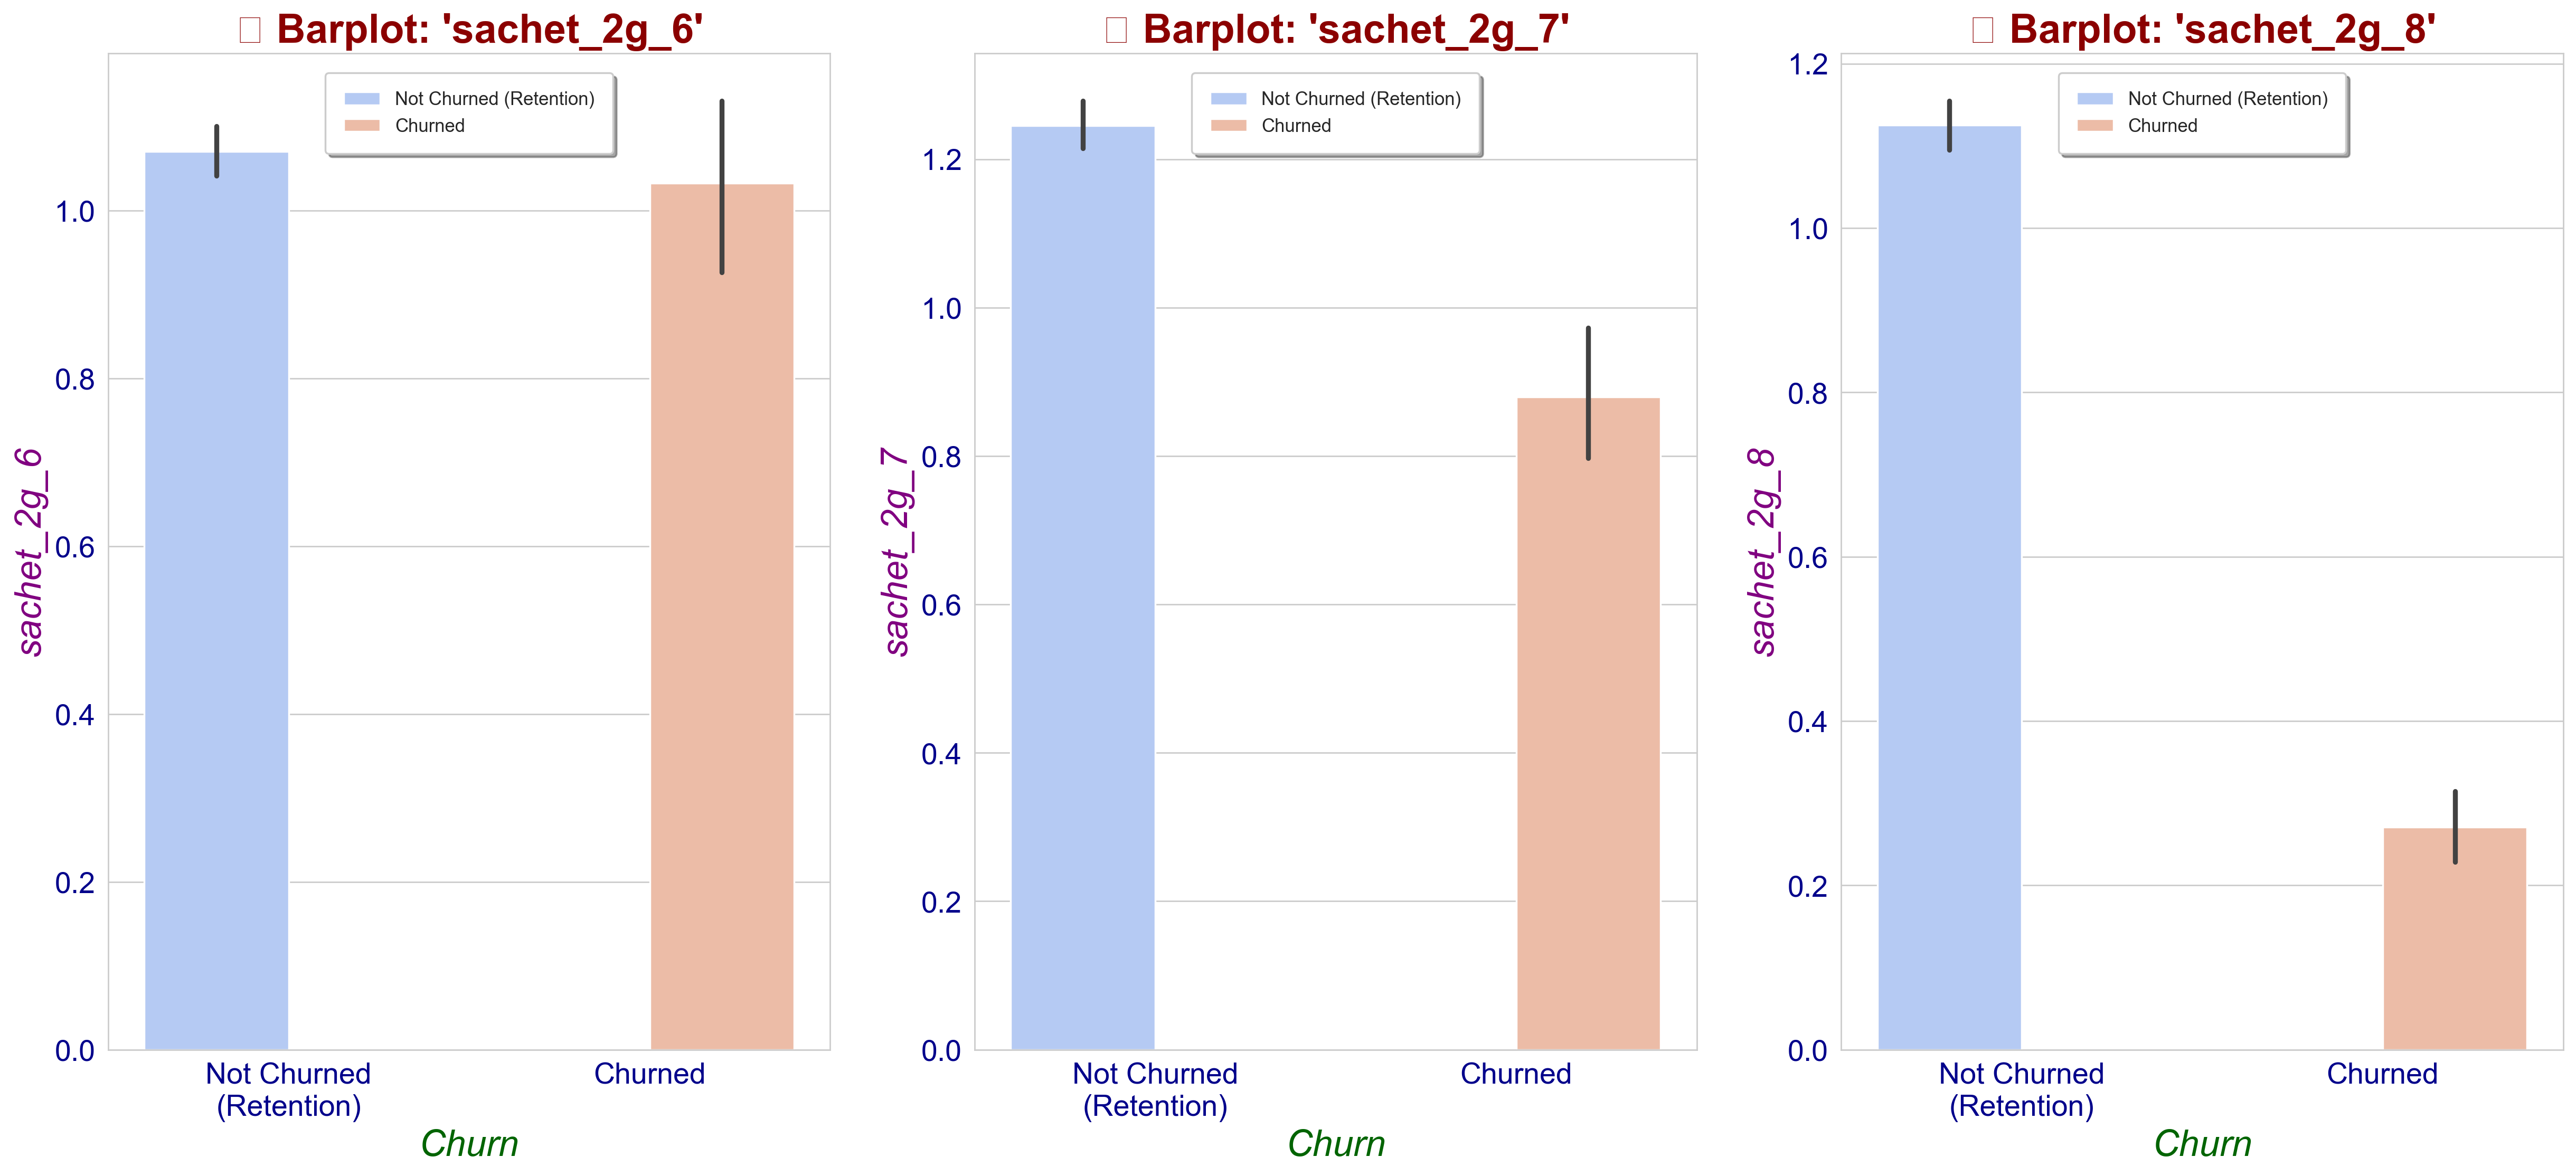

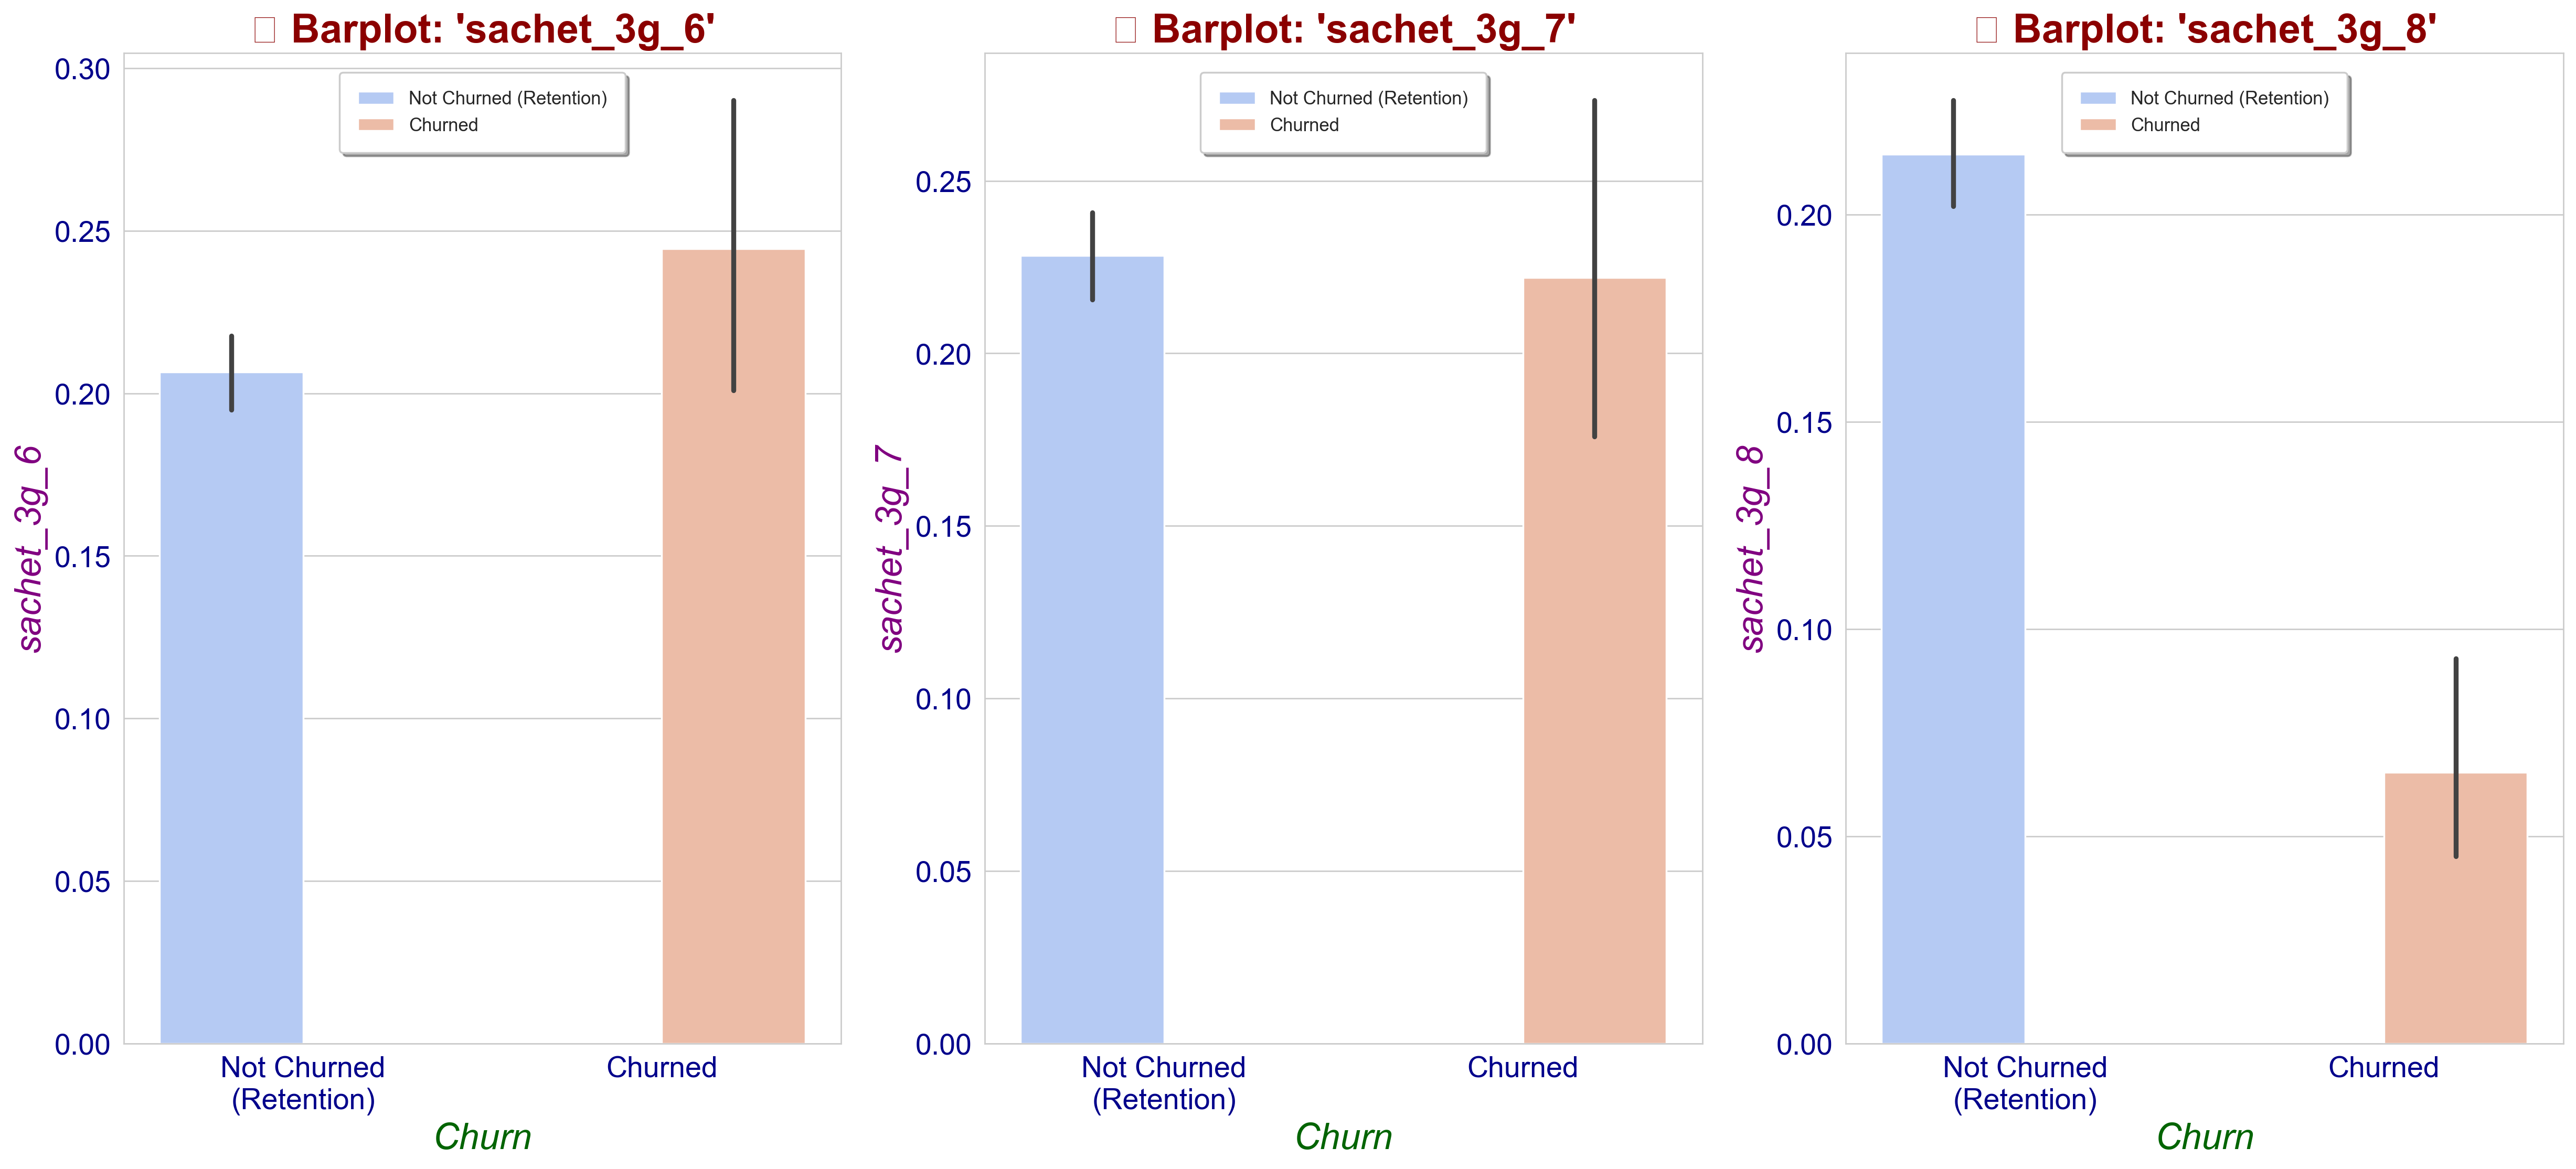

In [49]:
##Checking service schemes with validity smaller than a month for 2G/3G (sachet_2g') and ('sachet_3g') features

plot_barplots_monthly('sachet_2g')  #sachet_2g (service schemes with validity smaller than a month): for all 3 months
plot_barplots_monthly('sachet_3g')   #sachet_3g (service schemes with validity smaller than a month): for all 3 months

**Observations:** We see that the `'sachet_2g'` and `'sachet_3g'` schemes we largely used in the first and second months of good phase i.e. month (6) and (7) and then the trend shows a sudden drop in the usage as we approach the 8th month (action phase) for churned customers.

#### (C) Check for Volume Based Cost 

In [50]:
vbc_cols_list = list(high_value_customers.columns[high_value_customers.columns.str.contains('vbc')])
vbc_cols_list

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [51]:
##Rename vbc features to the desired format ending with month number
high_value_customers.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

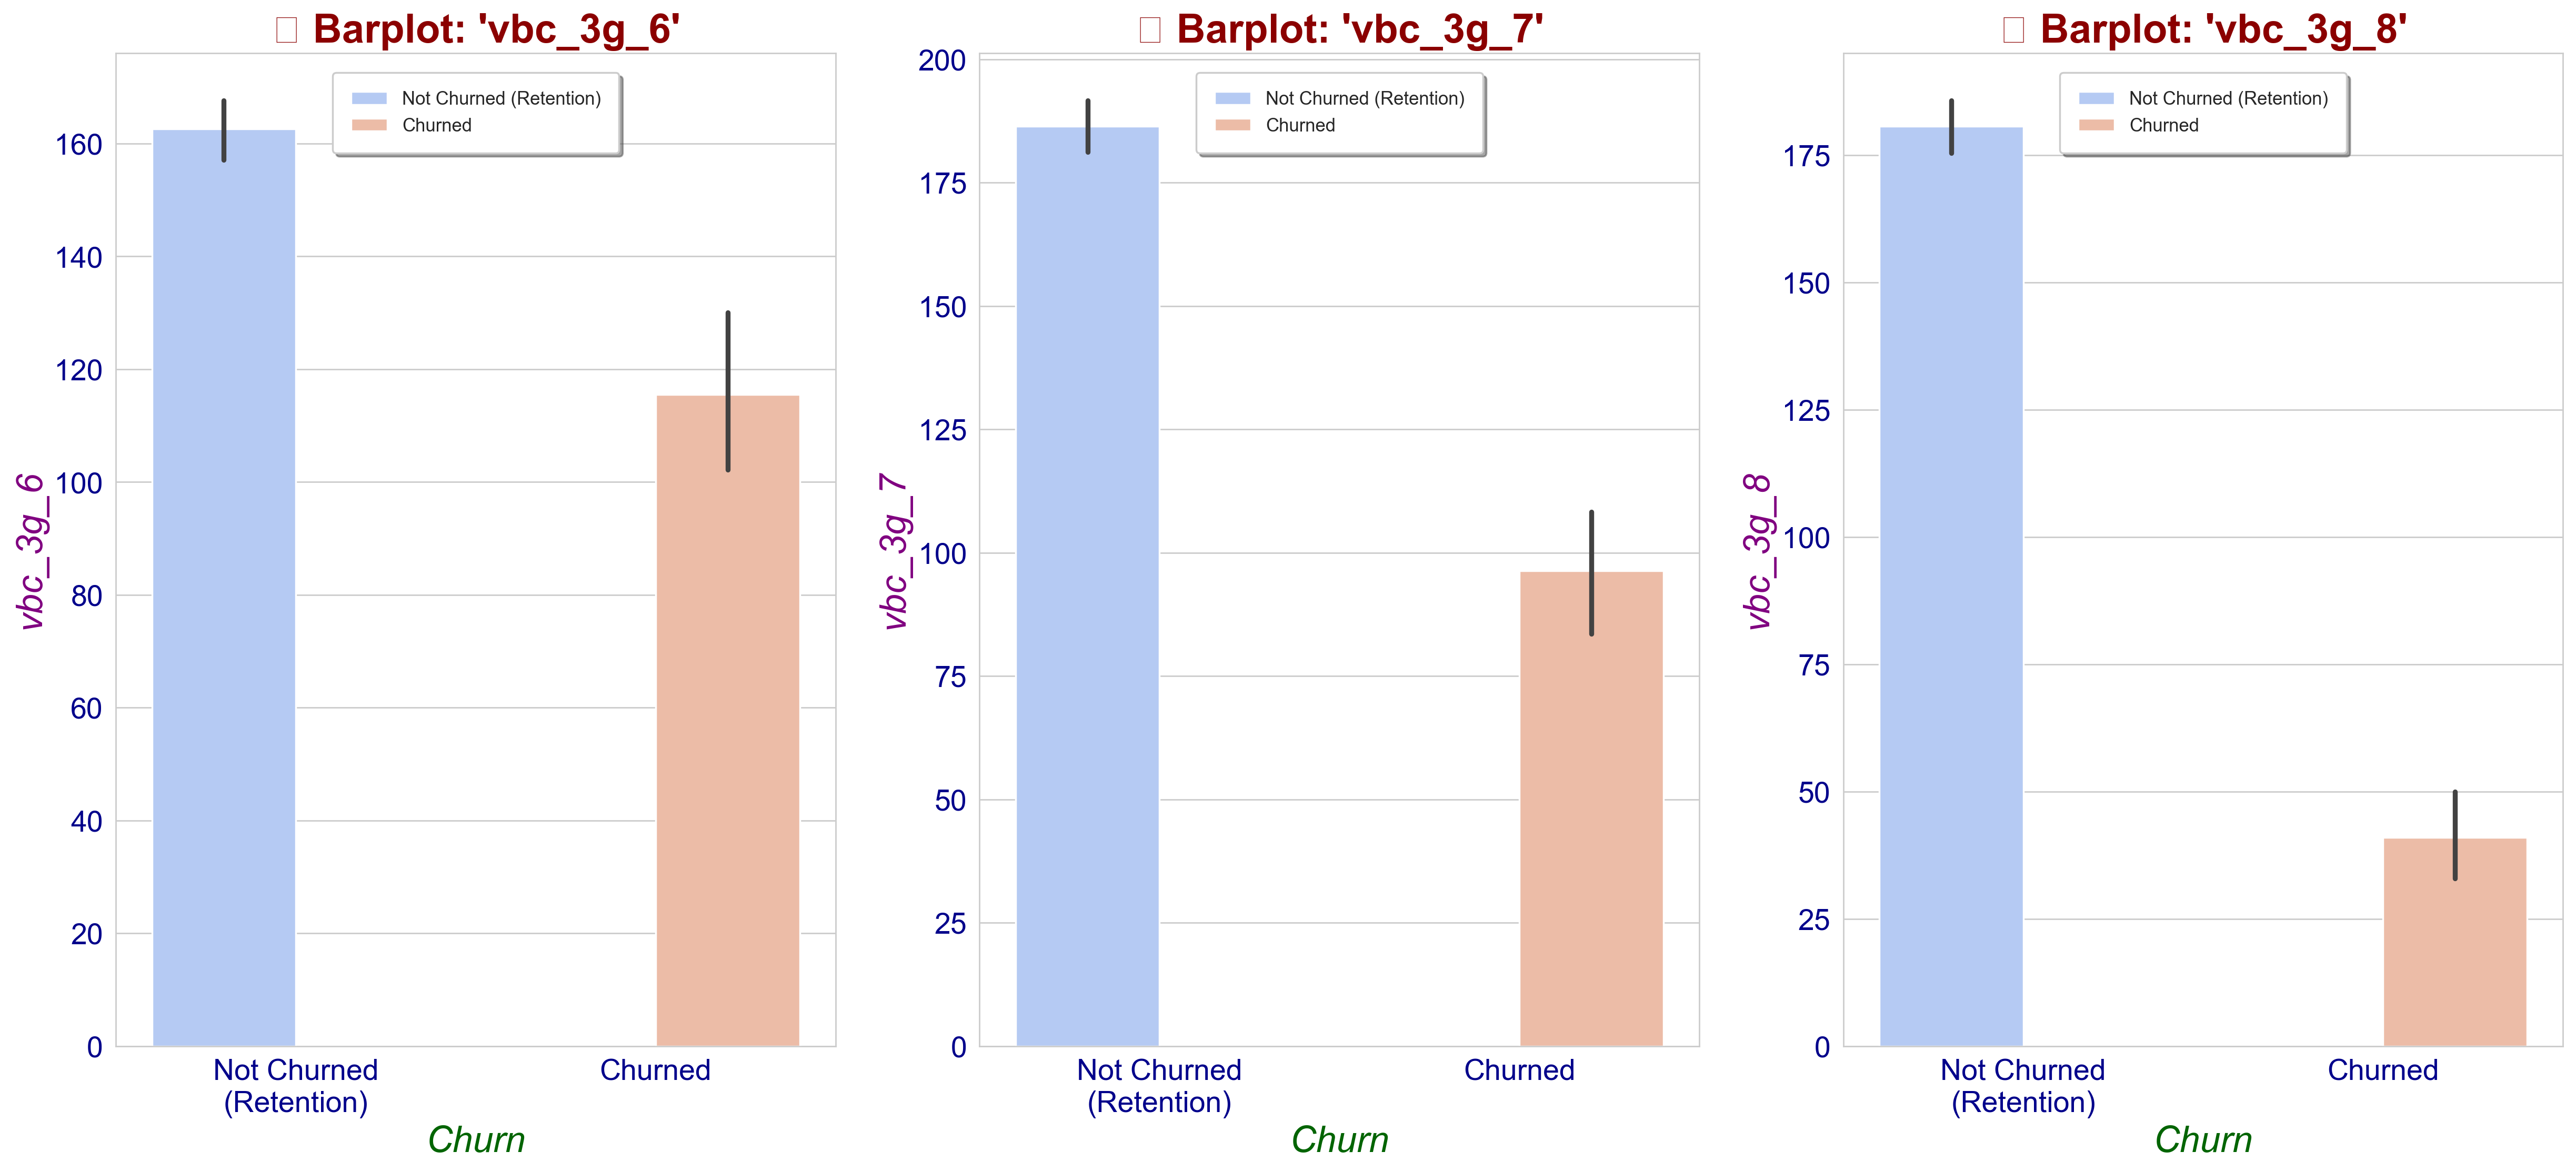

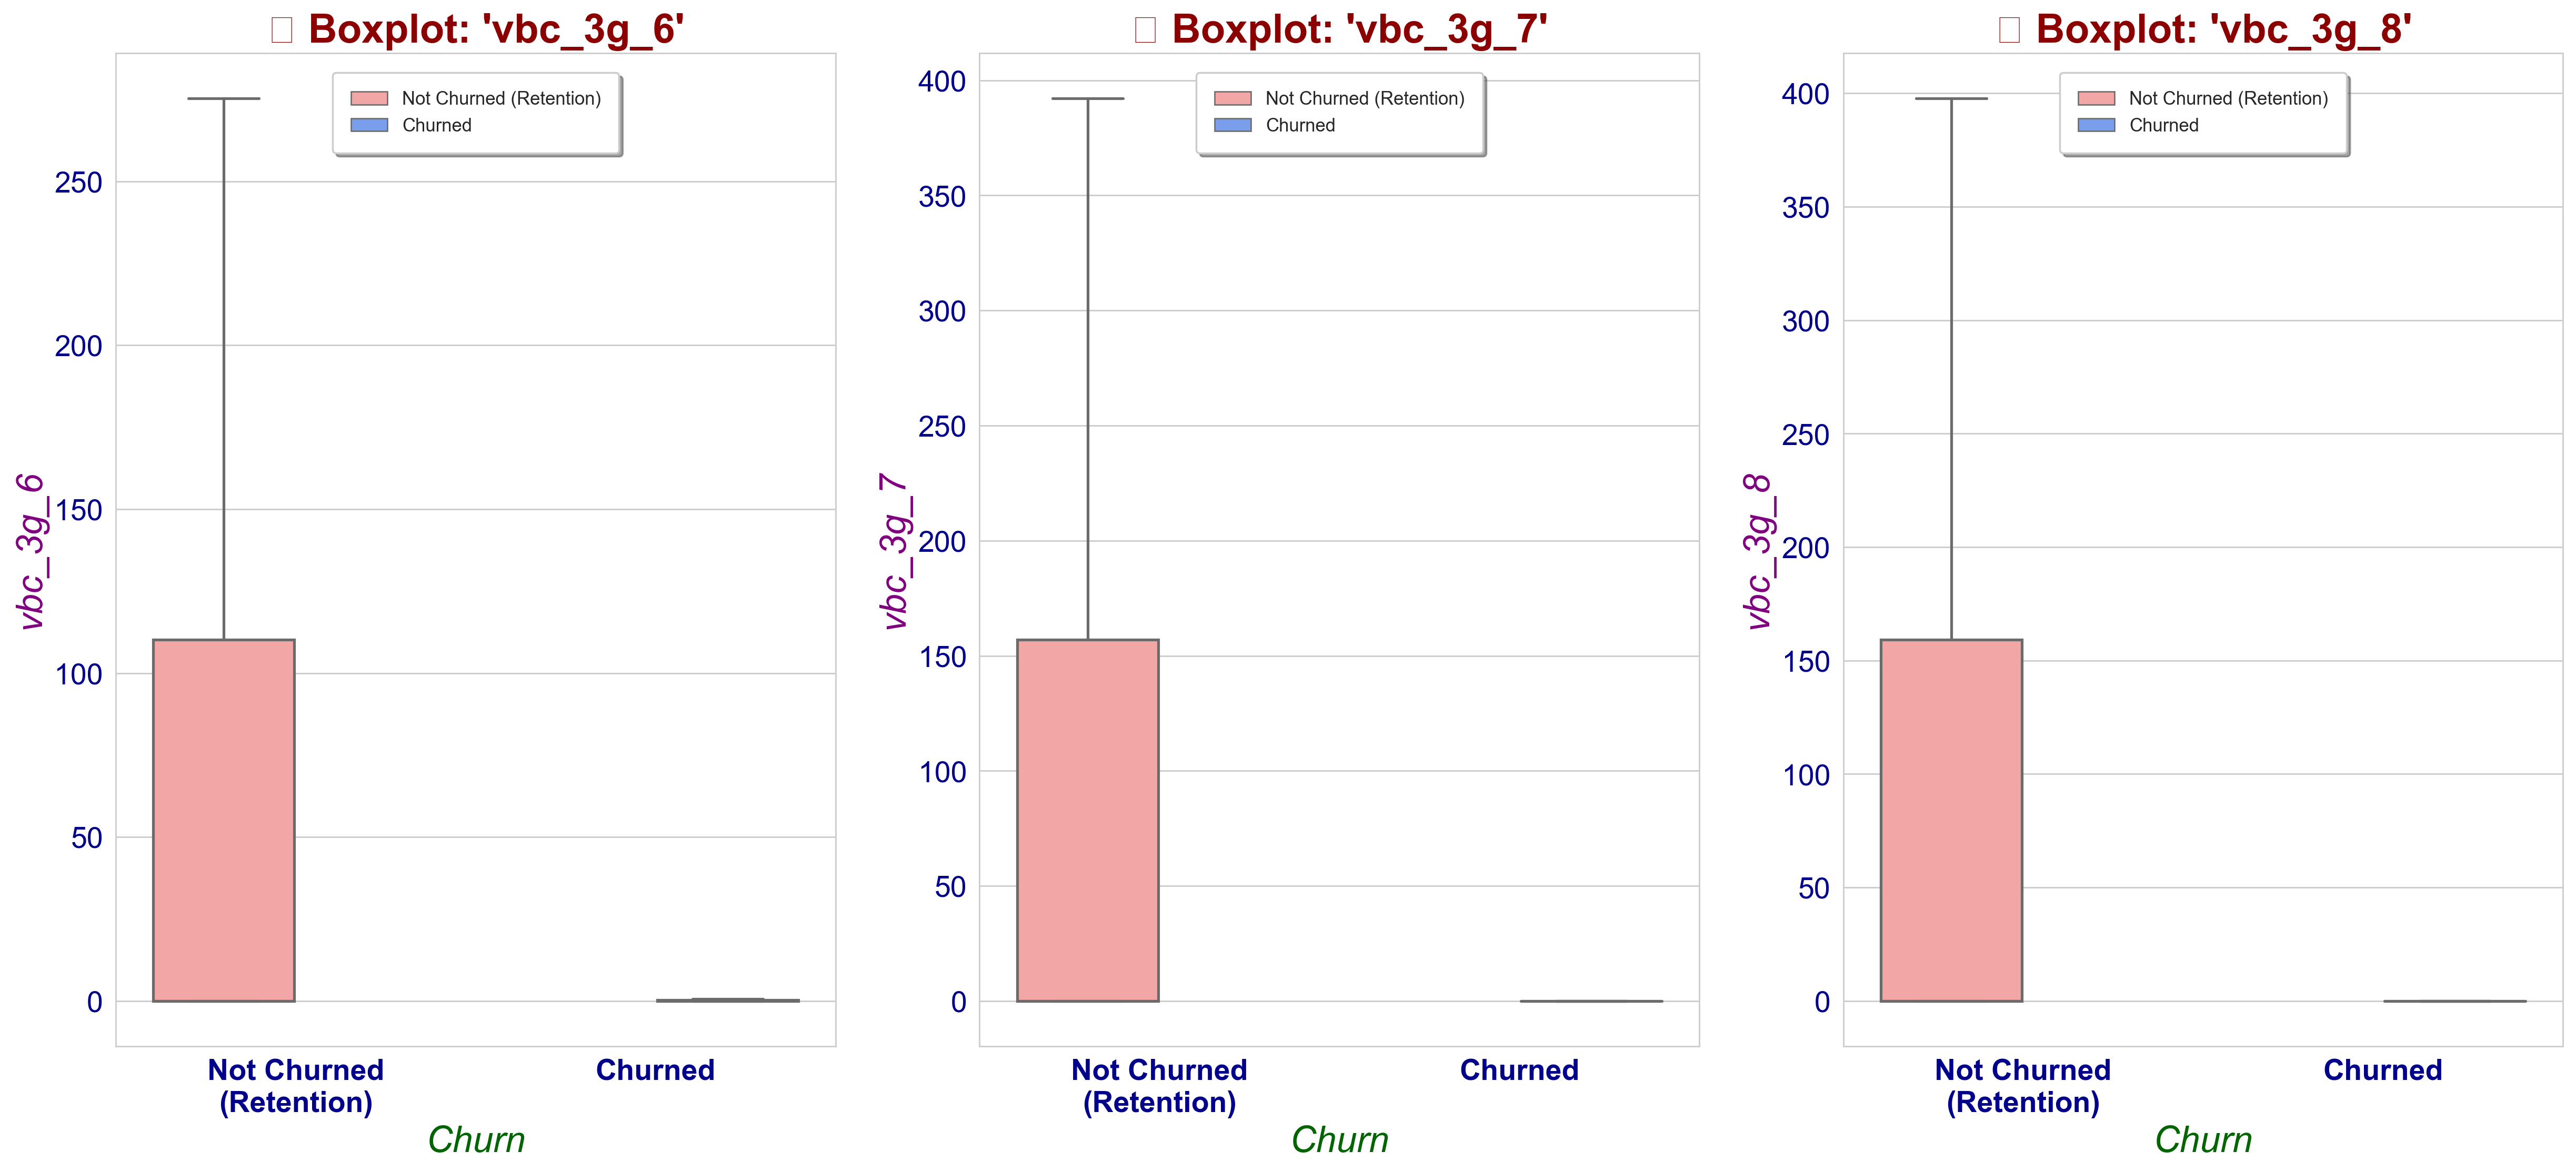

In [52]:
##Plotting boxplots and barplots for vbc based features
plot_barplots_monthly('vbc_3g')
plot_boxplots_monthly('vbc_3g')

**Observations:**<br>(i) The `volume based cost, vbc for 3G` is much lower for Churned customers than the non-churned customers. <br>(ii) Also, we see `a drop in the vbc` as we approach the 8th month(action phase) for churned customers.

#### (d) Average Revenue Per User

In [53]:
##Checking columns: average revenue per user
arpu_cols = high_value_customers.columns[high_value_customers.columns.str.contains('arpu_')]

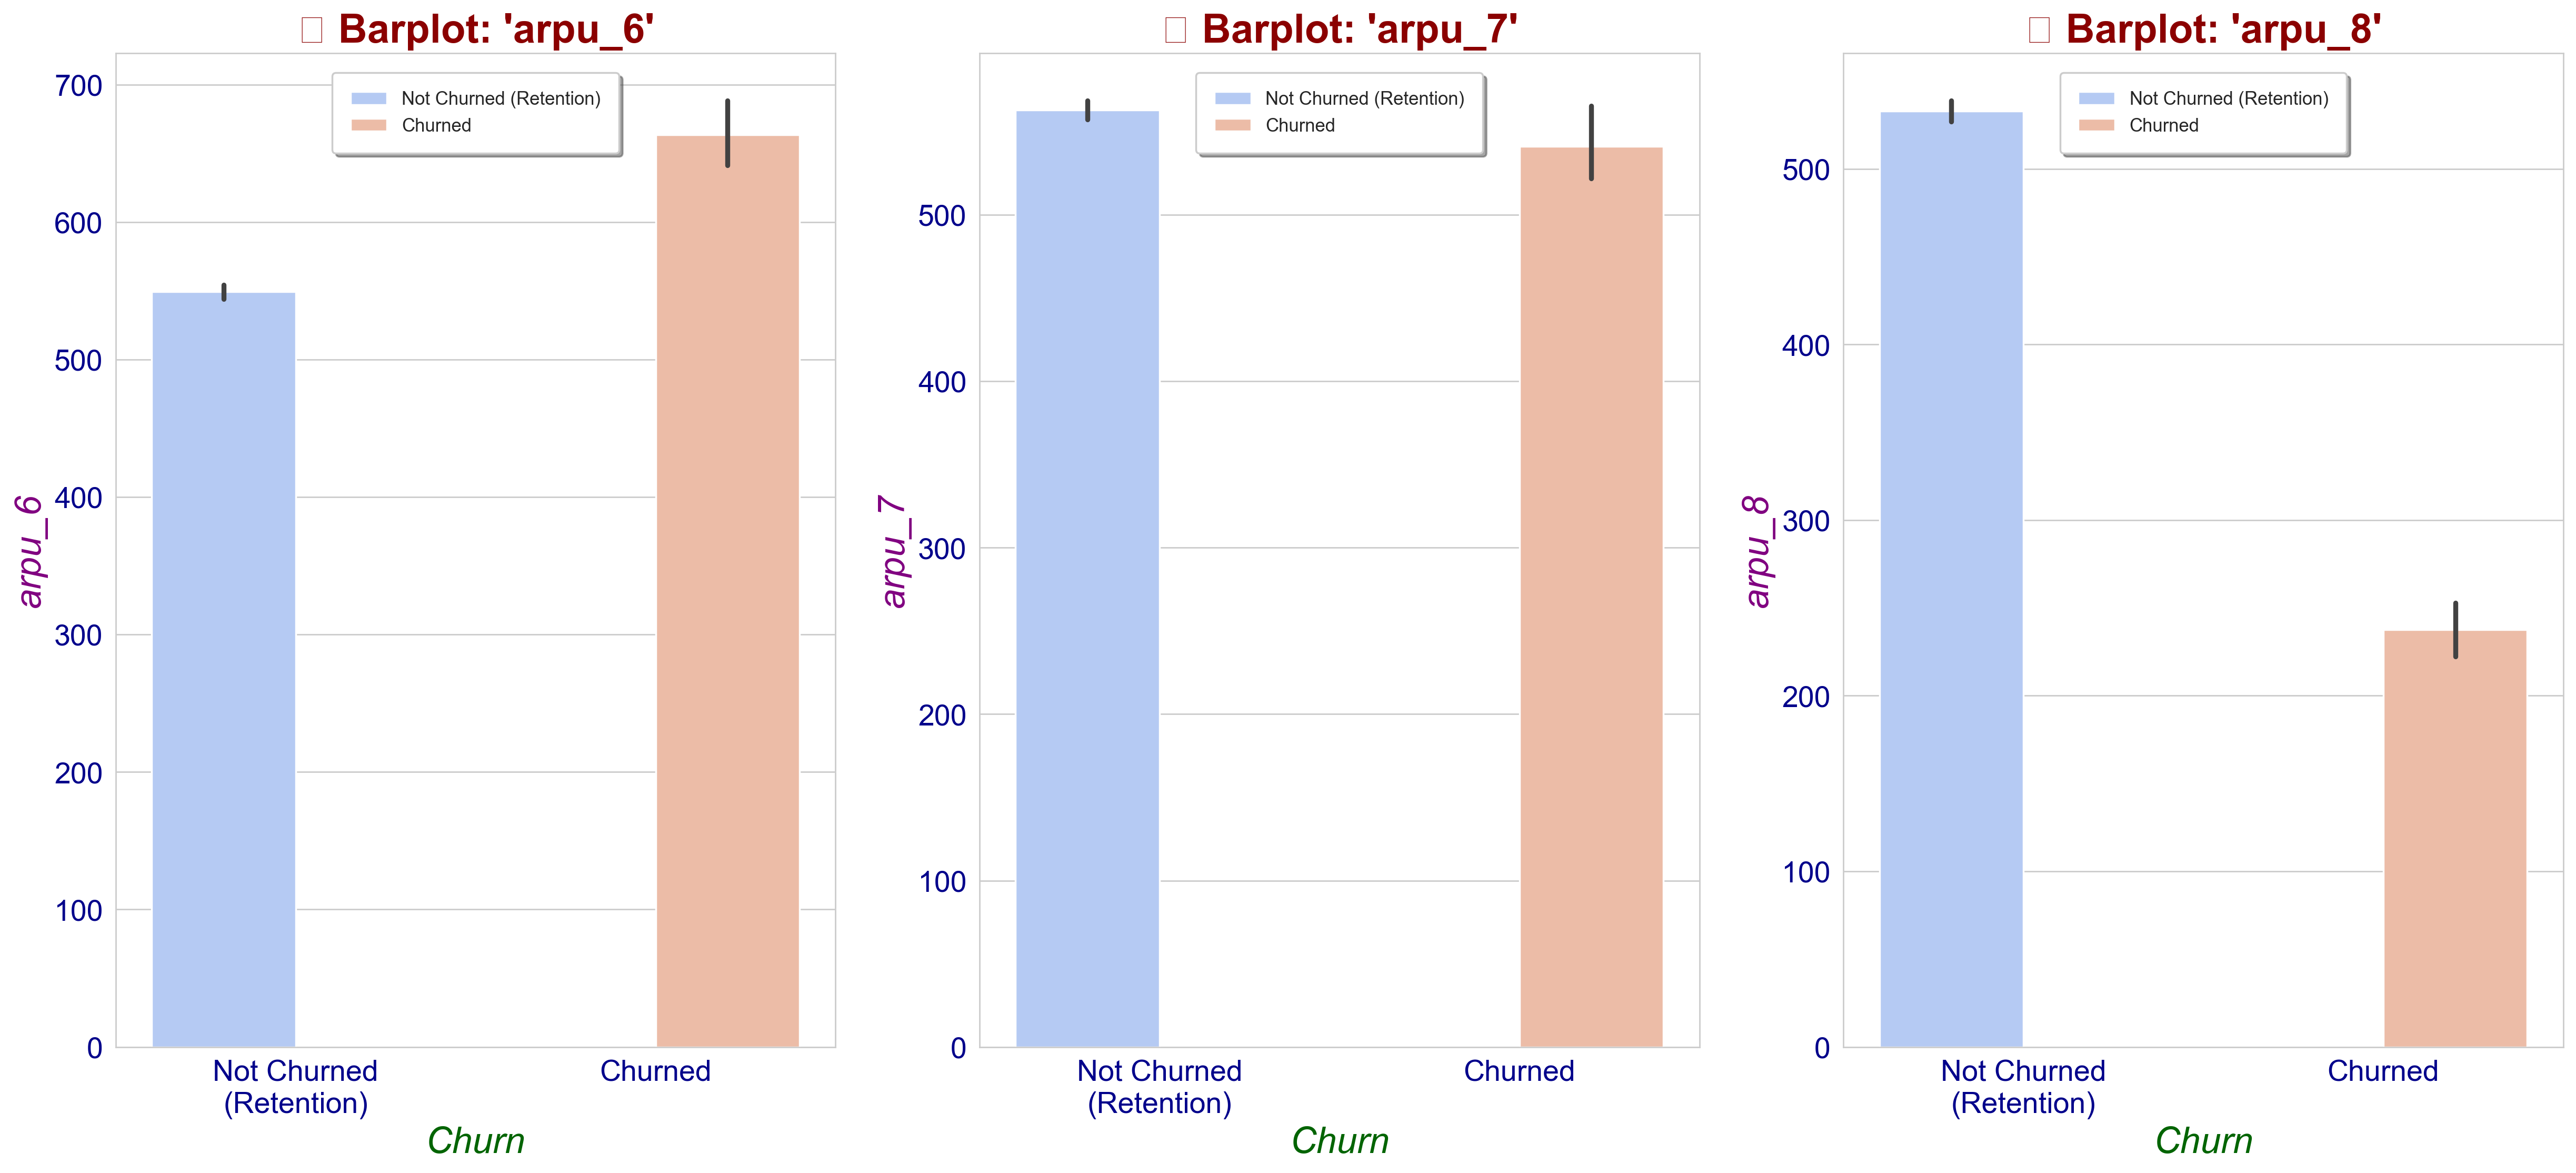

In [54]:
##Plotting 'arpu_' barplots
plot_barplots_monthly('arpu')

**Observation:** We see a drop in the `average revenue per user` for churned customers as we approach month 8(action phase) from the good phase (i.e. months 6 and 7)

#### (e) Minutes of usage (MOU): for voice calls

In [55]:
##Check minutes of usage 'mou' columns
mou_cols = high_value_customers.columns[high_value_customers.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [56]:
all_mou = high_value_customers[mou_cols]

# Calculating percentage of missing values
missing_percent_all_mou = ((all_mou.isnull().sum() / high_value_customers.shape[0]) * 100).sort_values(ascending=False)
missing_percent_all_mou

isd_ic_mou_8        3.912797
loc_ic_t2t_mou_8    3.912797
loc_ic_t2m_mou_8    3.912797
std_og_t2t_mou_8    3.912797
loc_og_t2c_mou_8    3.912797
loc_ic_t2f_mou_8    3.912797
loc_og_t2f_mou_8    3.912797
loc_ic_mou_8        3.912797
std_og_mou_8        3.912797
loc_og_t2m_mou_8    3.912797
std_ic_t2t_mou_8    3.912797
spl_og_mou_8        3.912797
loc_og_t2t_mou_8    3.912797
std_ic_t2m_mou_8    3.912797
std_og_t2m_mou_8    3.912797
roam_og_mou_8       3.912797
std_ic_t2f_mou_8    3.912797
roam_ic_mou_8       3.912797
std_ic_mou_8        3.912797
isd_og_mou_8        3.912797
offnet_mou_8        3.912797
spl_ic_mou_8        3.912797
std_og_t2f_mou_8    3.912797
onnet_mou_8         3.912797
loc_og_mou_8        3.912797
spl_og_mou_6        1.809502
loc_ic_t2t_mou_6    1.809502
std_ic_t2t_mou_6    1.809502
loc_ic_t2m_mou_6    1.809502
loc_ic_t2f_mou_6    1.809502
loc_ic_mou_6        1.809502
std_ic_t2m_mou_6    1.809502
std_ic_t2f_mou_6    1.809502
std_ic_mou_6        1.809502
spl_ic_mou_6  

In [57]:
# Imputing minutes of usage (mou) attributes with 0
high_value_customers[mou_cols] = high_value_customers[mou_cols].replace(np.nan, 0)

In [58]:
all_mou = high_value_customers[mou_cols]

# Calculating percentage of missing values
missing_percent_all_mou = ((all_mou.isnull().sum() / high_value_customers.shape[0]) * 100).sort_values(ascending=False)
missing_percent_all_mou

onnet_mou_6         0.0
isd_og_mou_8        0.0
loc_ic_mou_8        0.0
loc_ic_mou_7        0.0
loc_ic_mou_6        0.0
loc_ic_t2f_mou_8    0.0
loc_ic_t2f_mou_7    0.0
loc_ic_t2f_mou_6    0.0
loc_ic_t2m_mou_8    0.0
loc_ic_t2m_mou_7    0.0
loc_ic_t2m_mou_6    0.0
loc_ic_t2t_mou_8    0.0
loc_ic_t2t_mou_7    0.0
loc_ic_t2t_mou_6    0.0
total_og_mou_8      0.0
total_og_mou_7      0.0
total_og_mou_6      0.0
spl_og_mou_8        0.0
spl_og_mou_7        0.0
std_ic_t2t_mou_6    0.0
std_ic_t2t_mou_7    0.0
std_ic_t2t_mou_8    0.0
total_ic_mou_6      0.0
isd_ic_mou_7        0.0
isd_ic_mou_6        0.0
spl_ic_mou_8        0.0
spl_ic_mou_7        0.0
spl_ic_mou_6        0.0
total_ic_mou_8      0.0
total_ic_mou_7      0.0
std_ic_mou_8        0.0
std_ic_t2m_mou_6    0.0
std_ic_mou_7        0.0
std_ic_mou_6        0.0
std_ic_t2f_mou_8    0.0
std_ic_t2f_mou_7    0.0
std_ic_t2f_mou_6    0.0
std_ic_t2m_mou_8    0.0
std_ic_t2m_mou_7    0.0
spl_og_mou_6        0.0
isd_og_mou_7        0.0
onnet_mou_7     

#### Incoming Calls

In [59]:
##Check for incoming(ic) mou features (just for 6th month)
ic_mou_features = list(high_value_customers.columns[high_value_customers.columns.str.contains('.*_ic_.*mou_6')])
ic_mou_features

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6']

In [60]:
high_value_customers[ic_mou_features].describe()

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       16.124001         65.508916        150.474219         15.291721   
std        76.344227        163.855393        219.321437         45.785255   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.100000         28.090000          0.000000   
50%         0.000000         25.080000         84.110000          1.840000   
75%         0.000000         67.480000        188.740000         11.980000   
max      2613.310000       6351.440000       4693.860000       1678.410000   

       loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
count  29953.000000      29953.000000      29953.000000      29953.000000   
mean     231.284489         14.896832         29.212448          2.698829   
std      315.005426         77.750215         98.279300         19.114766   
min        0.000000          0.000000          0.000000          0.000000   
25%       47.910000          0.000000          0.000000          0.000000   
50%      134.560000          0.380000          5.000000          0.000000   
75%      297.260000          8.190000         23.630000          0.110000   
max     7454.630000       5459.560000       4630.230000       1351.110000   

       std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  
count  29953.000000    29953.000000  29953.000000  29953.000000  
mean      46.811695      290.121569      0.061047     10.800999  
std      137.597749      365.739944      0.188124     76.789627  
min        0.000000        0.000000      0.000000      0.000000  
25%        1.030000       72.890000      0.000000      0.000000  
50%       11.410000      183.780000      0.000000      0.000000  
75%       41.490000      372.160000      0.000000      0.000000  
max     5459.630000     7716.140000     19.760000   6789.410000

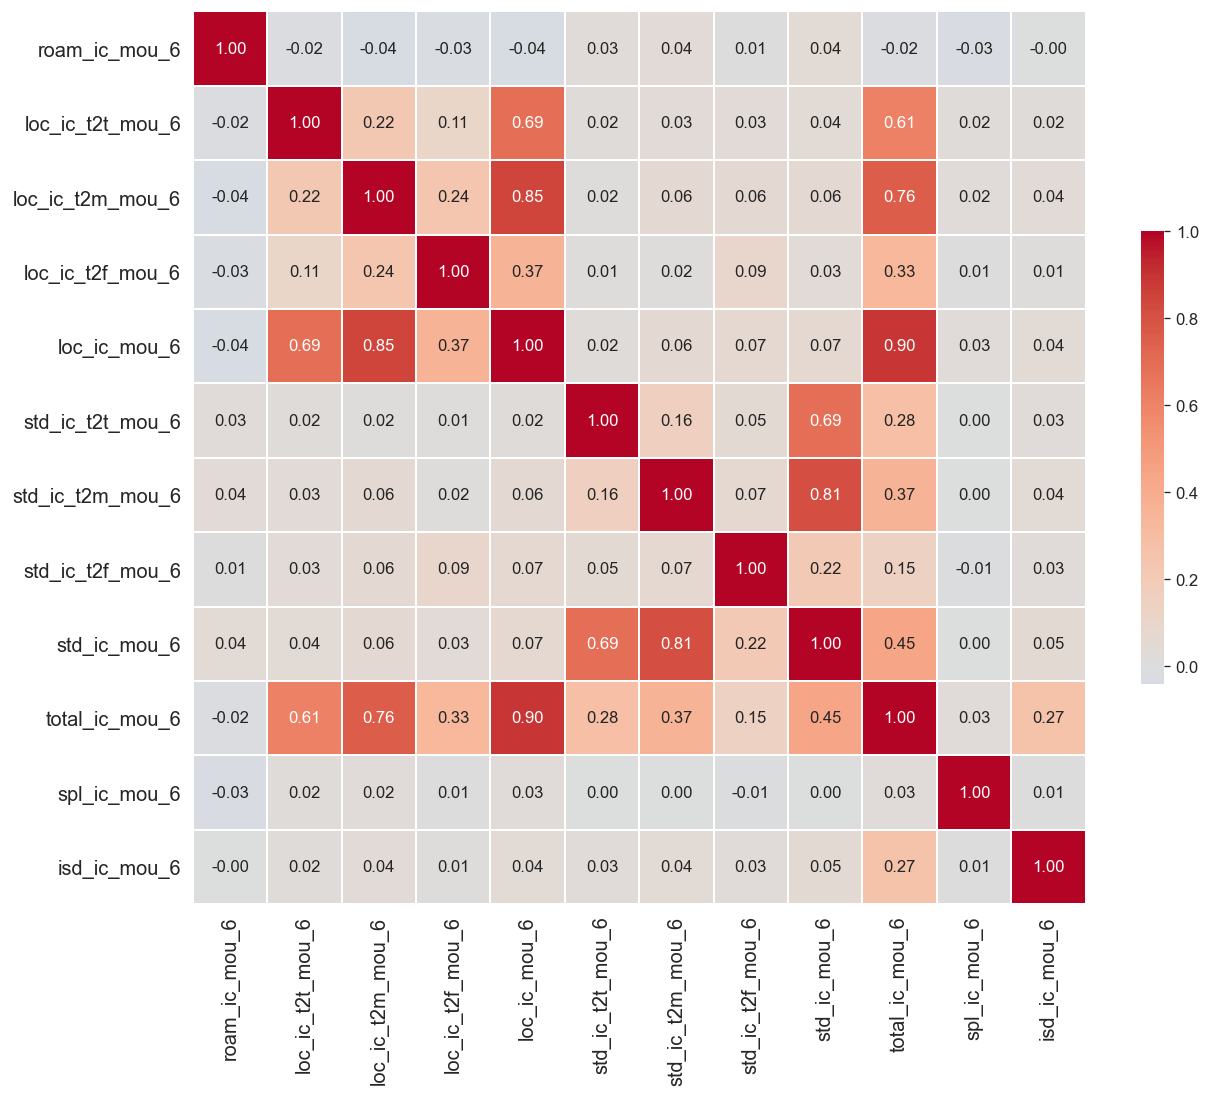

In [61]:
corr_matrix = high_value_customers[ic_mou_features].corr()

# Set figure size
plt.figure(figsize=(12, 10), dpi=120)

# Plot heatmap
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True, 
    fmt=".2f",
    linewidths=0.5, 
    square=True, 
    center=0, 
    cbar_kws={"shrink": 0.5}
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

##### From the above correlation matrix, We can see that `total_ic_mou_6`, `std_ic_mou_6` and `loc_ic_mou_6` seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues. 

In [62]:
##Let's check for a record (i.e. index 8: example)

print("'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'")
print(high_value_customers.loc[8,'loc_ic_mou_6'],"==",high_value_customers.loc[8,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())

print("\n'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'")
print(high_value_customers.loc[8,'std_ic_mou_6'],"==",high_value_customers.loc[8,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

print("\n'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'")
print(high_value_customers.loc[8,'total_ic_mou_6'],"==",high_value_customers.loc[8,['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6', 'spl_ic_mou_6']].sum())

'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'
81.43 == 81.42

'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'
22.43 == 22.43

'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'
103.86 == 103.86000000000001


In [63]:
##Dropping 'loc_ic_mou', 'std_ic_mou' and 'total_ic_mou' for all 3 months
drop_ic_mou_features = list(high_value_customers.columns[high_value_customers.columns.str.contains('loc_ic_mou_|std_ic_mou_|total_ic_mou_')])
print('List of features dropped:\n', drop_ic_mou_features)

high_value_customers.drop(drop_ic_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


#### Outgoing Calls

In [64]:
##Check for outgoing(og) mou features (just for 6th month)
og_mou_features = list(high_value_customers.columns[high_value_customers.columns.str.contains('.*_og_.*mou_6')])
og_mou_features

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'total_og_mou_6']

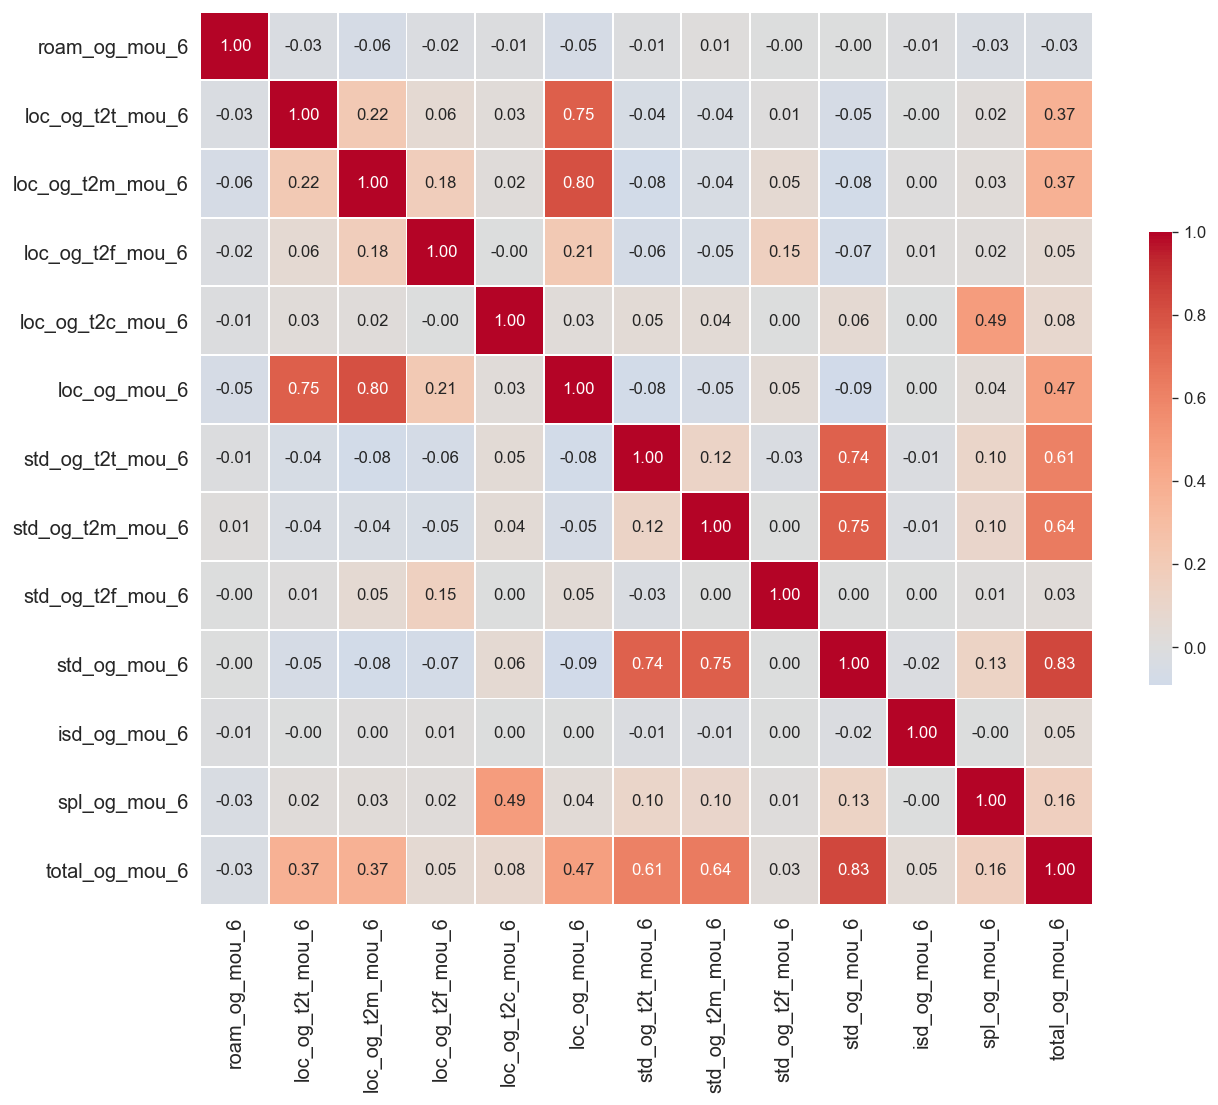

In [65]:
corr_matrix = high_value_customers[og_mou_features].corr()

# Set figure size
plt.figure(figsize=(12, 10), dpi=120)

# Plot heatmap
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True, 
    fmt=".2f",
    linewidths=0.5, 
    square=True, 
    center=0, 
    cbar_kws={"shrink": 0.5}
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

##### From the above correlation matrix, We can see that `total_og_mou_6`, `std_og_mou_6` and `loc_og_mou_6` seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues. Let's cross check to eliminate multicollinearity.

In [66]:
##Let's check for a record (i.e. index 21: example)

print("'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'")
print(high_value_customers.loc[21,'loc_og_mou_6'],"==",high_value_customers.loc[21,['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6']].sum())

print("\n'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'")
print(high_value_customers.loc[21,'std_og_mou_6'],"==",high_value_customers.loc[21,['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6']].sum())

print("\n'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'")
print(high_value_customers.loc[21,'total_og_mou_6'],"==",high_value_customers.loc[21,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6']].sum())

'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'
97.04 == 97.04

'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'
763.29 == 763.29

'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'
860.34 == 860.3299999999999


In [67]:
##Dropping 'loc_og_mou', 'std_og_mou' and 'total_og_mou' for all 3 months
drop_og_mou_features = list(high_value_customers.columns[high_value_customers.columns.str.contains('loc_og_mou_|std_og_mou_|total_og_mou_')])
print('List of features dropped:\n', drop_og_mou_features)

high_value_customers.drop(drop_og_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


#### (f) Offnet MOU Usage: All kind of calls outside the operator T network

In [68]:
offnet_usage_cols = list(high_value_customers.columns[high_value_customers.columns.str.contains('offnet.*mou')])
offnet_usage_cols

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

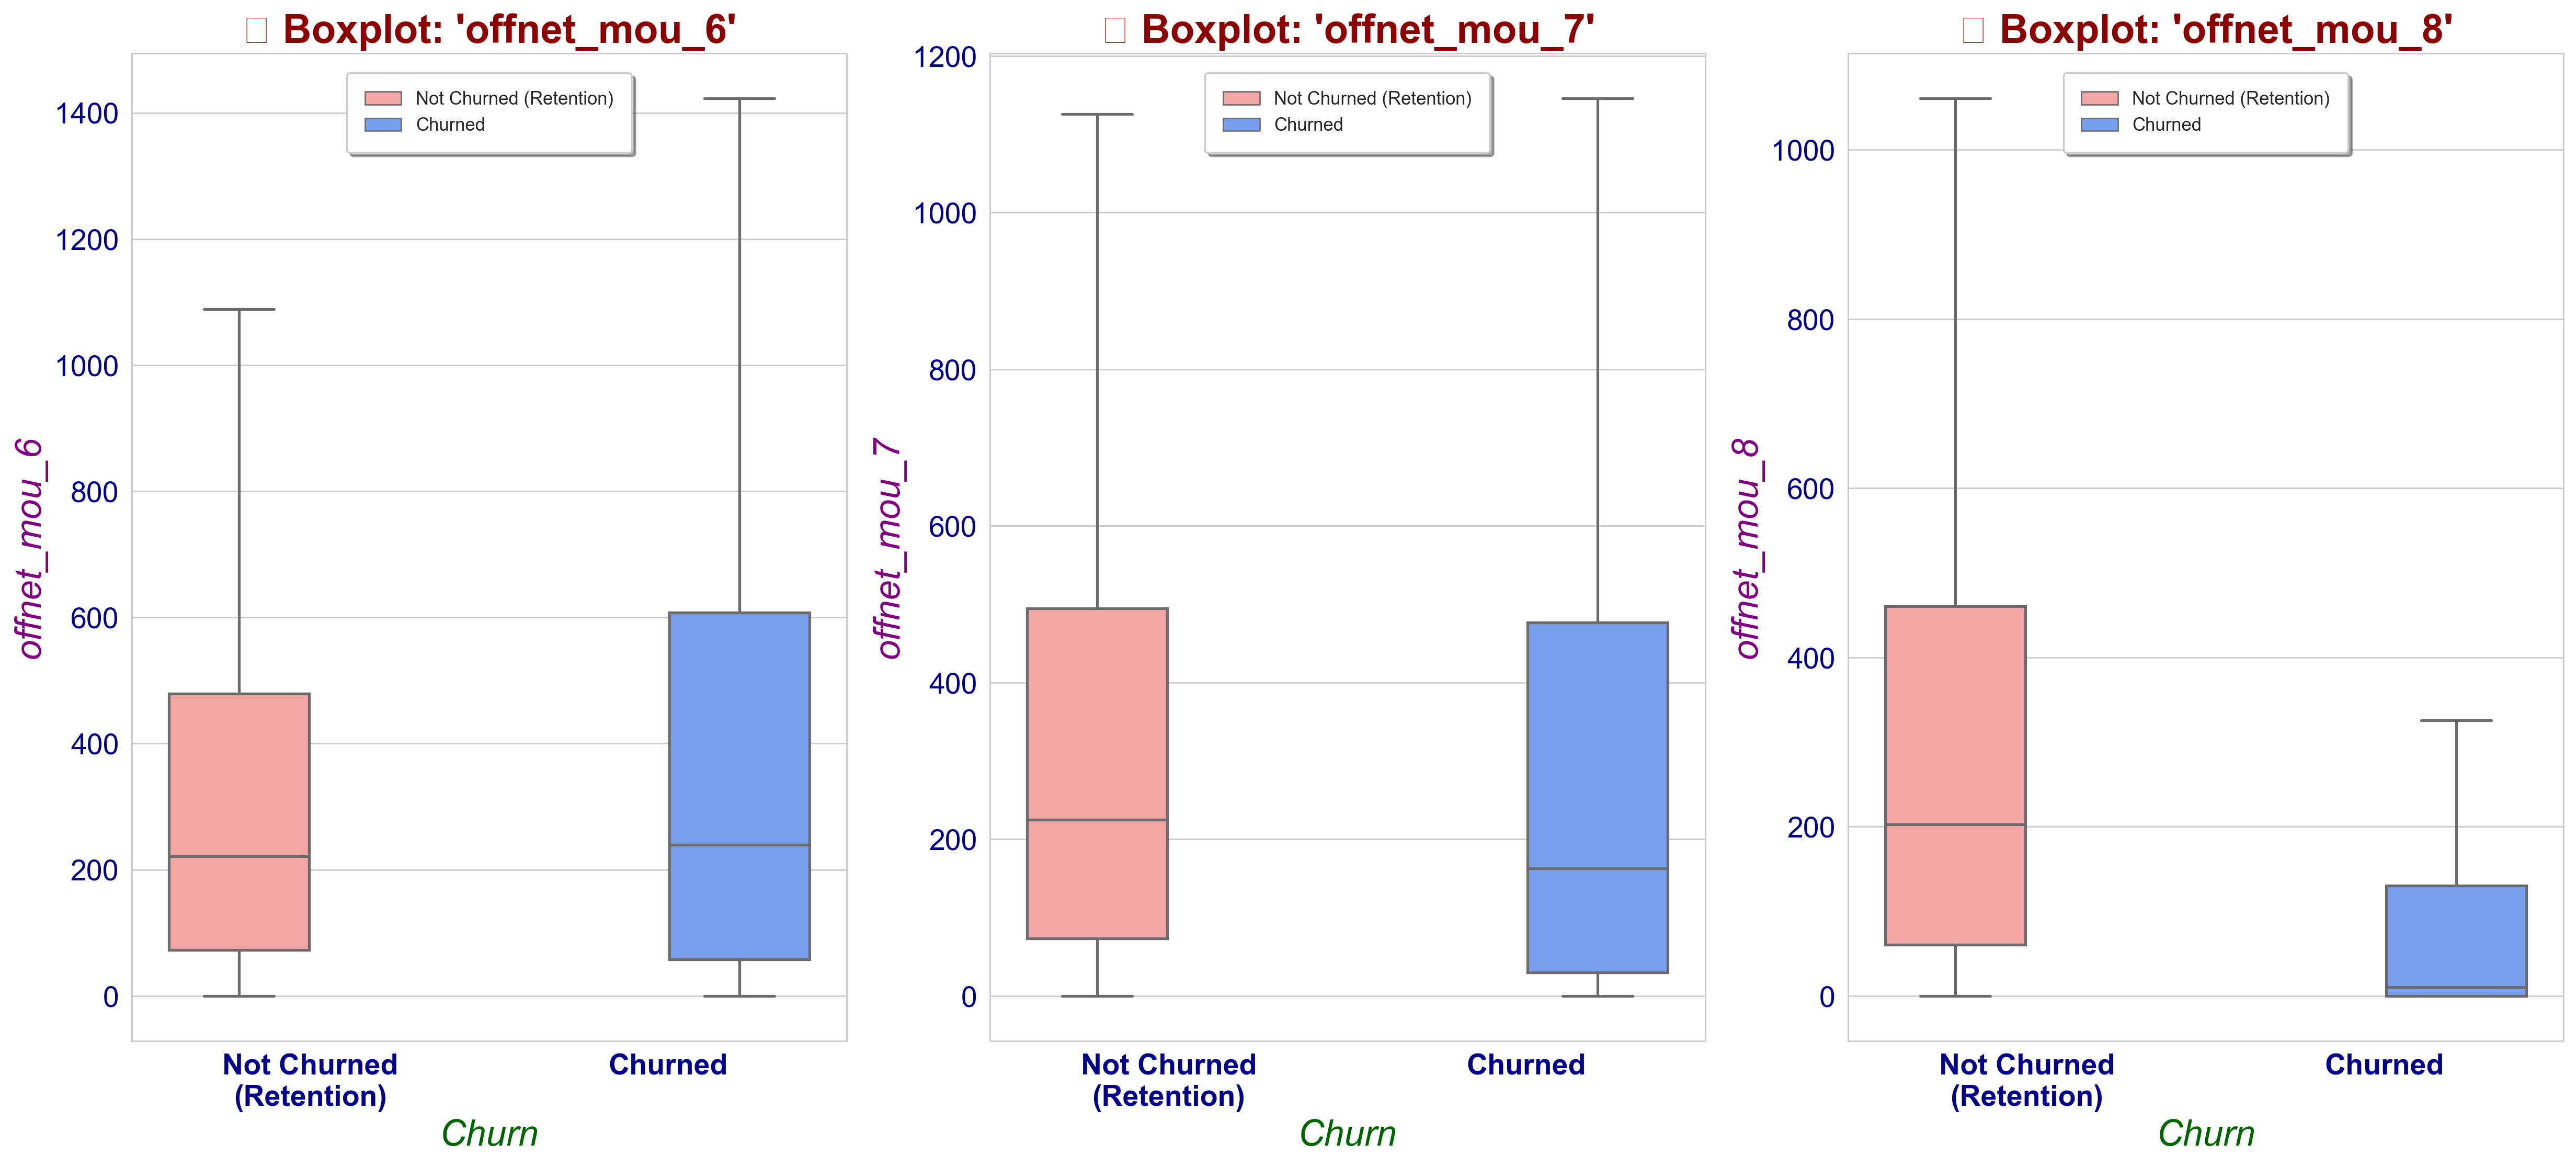

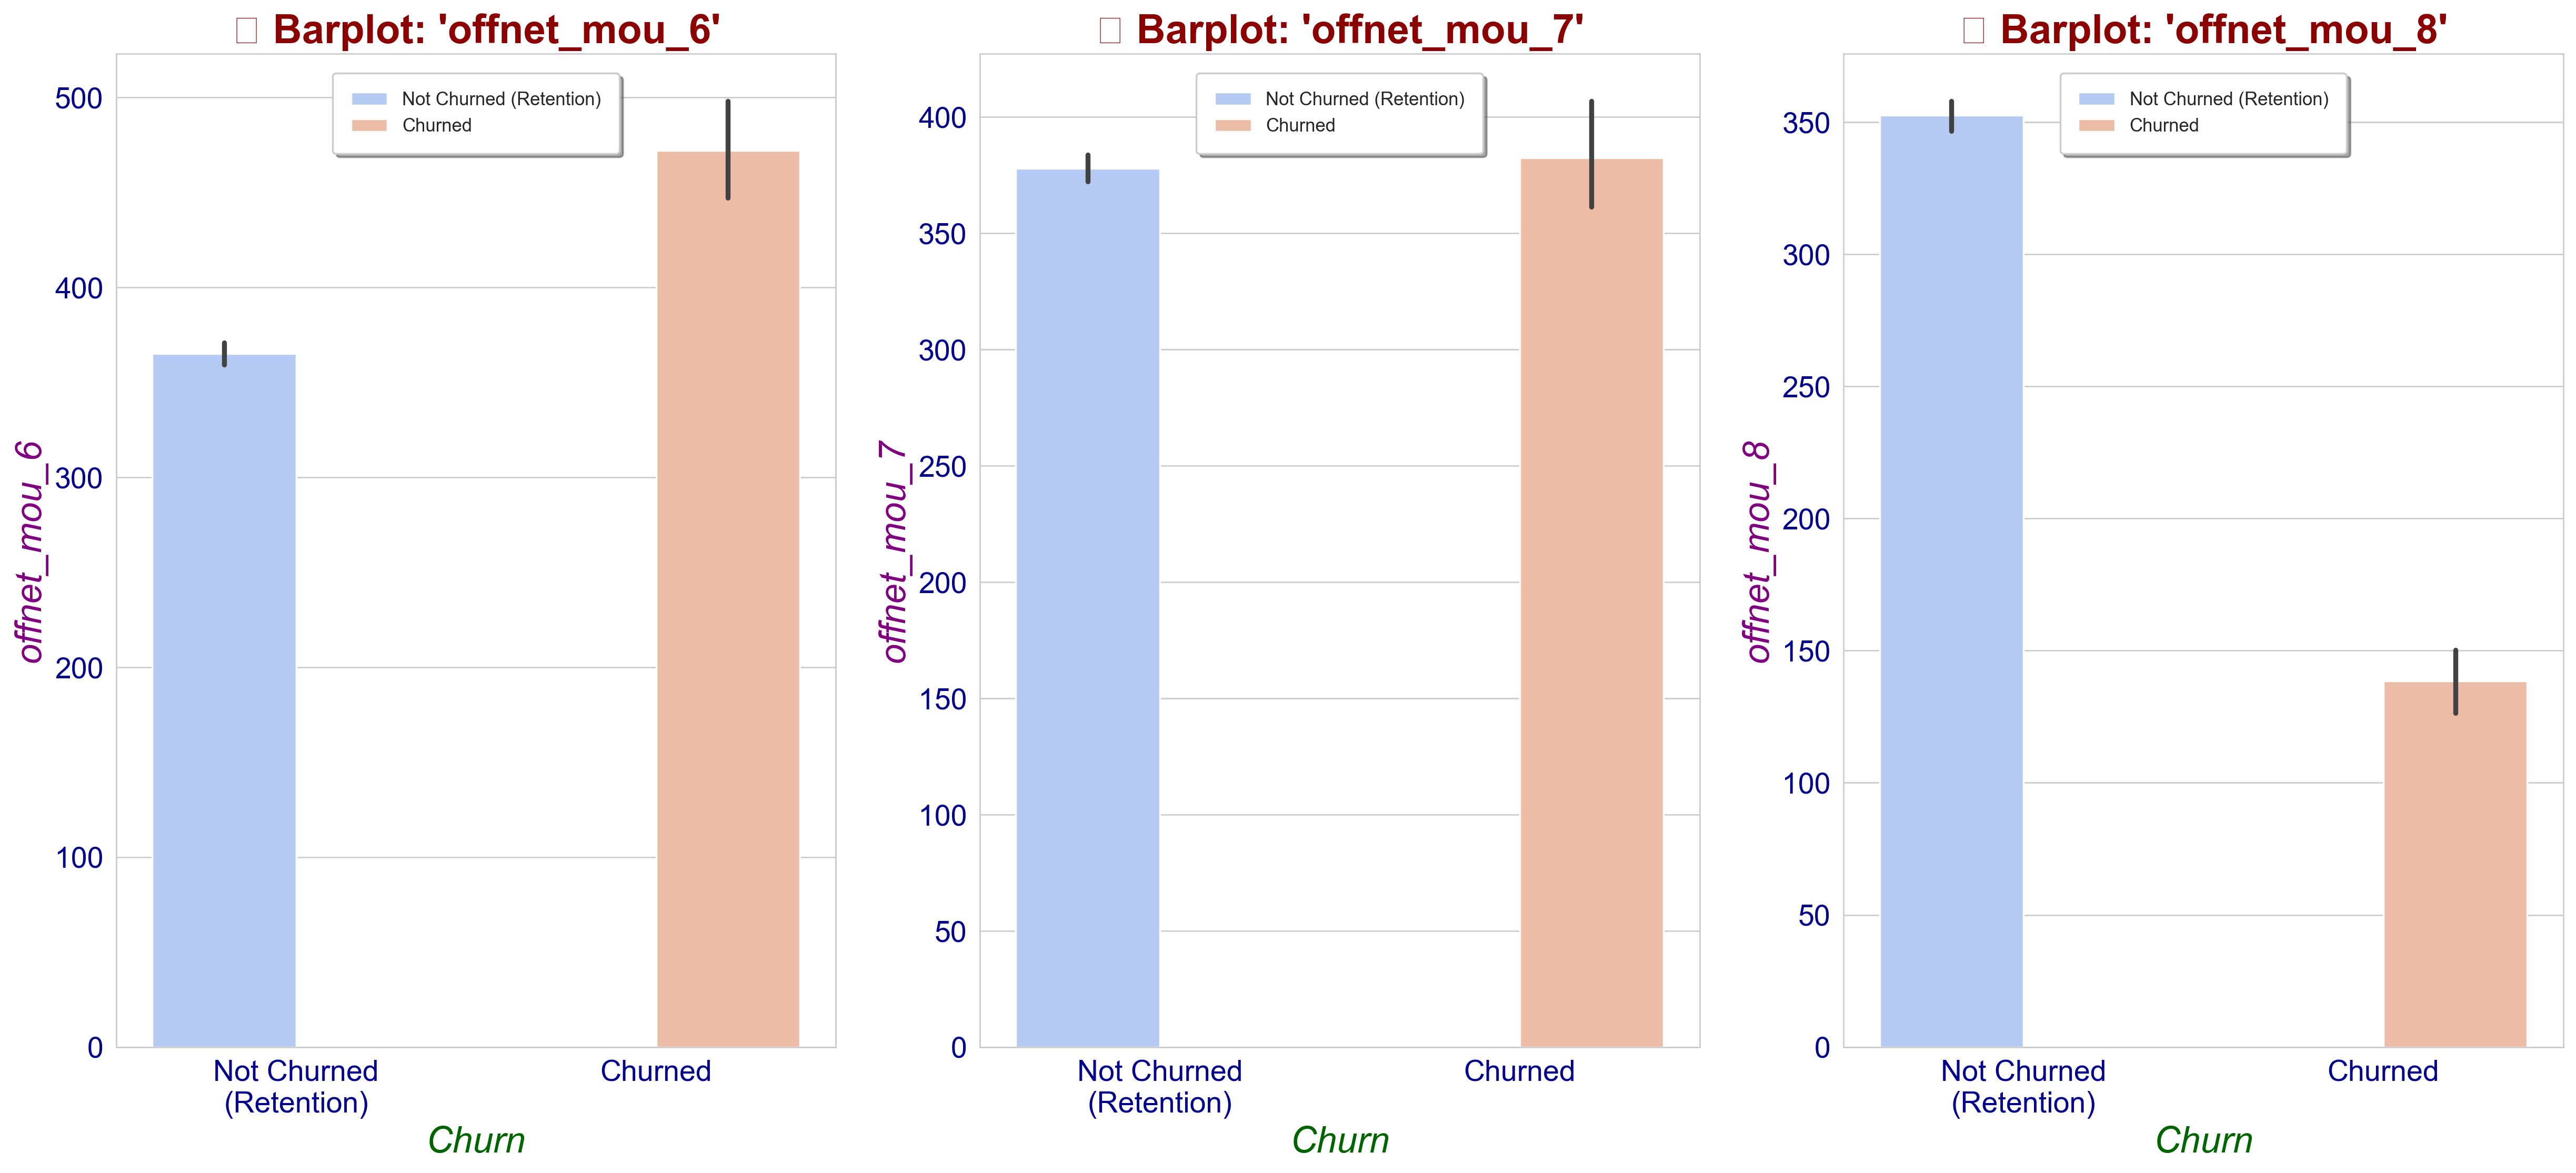

In [69]:
# Plotting 'offnet_mou' boxplots and barplots
plot_boxplots_monthly('offnet_mou') 
plot_barplots_monthly('offnet_mou')

**Observation:** The `offnet_mou` (minutes of usage) decline as we move from good phase (i.e. month 6 and 7) to the action phase(month 8) for churned customers.

#### (g) Onnet MOU Usage: All kind of calls within the same operator network

In [70]:
onnet_usage_cols = list(high_value_customers.columns[high_value_customers.columns.str.contains('onnet.*mou')])
onnet_usage_cols

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

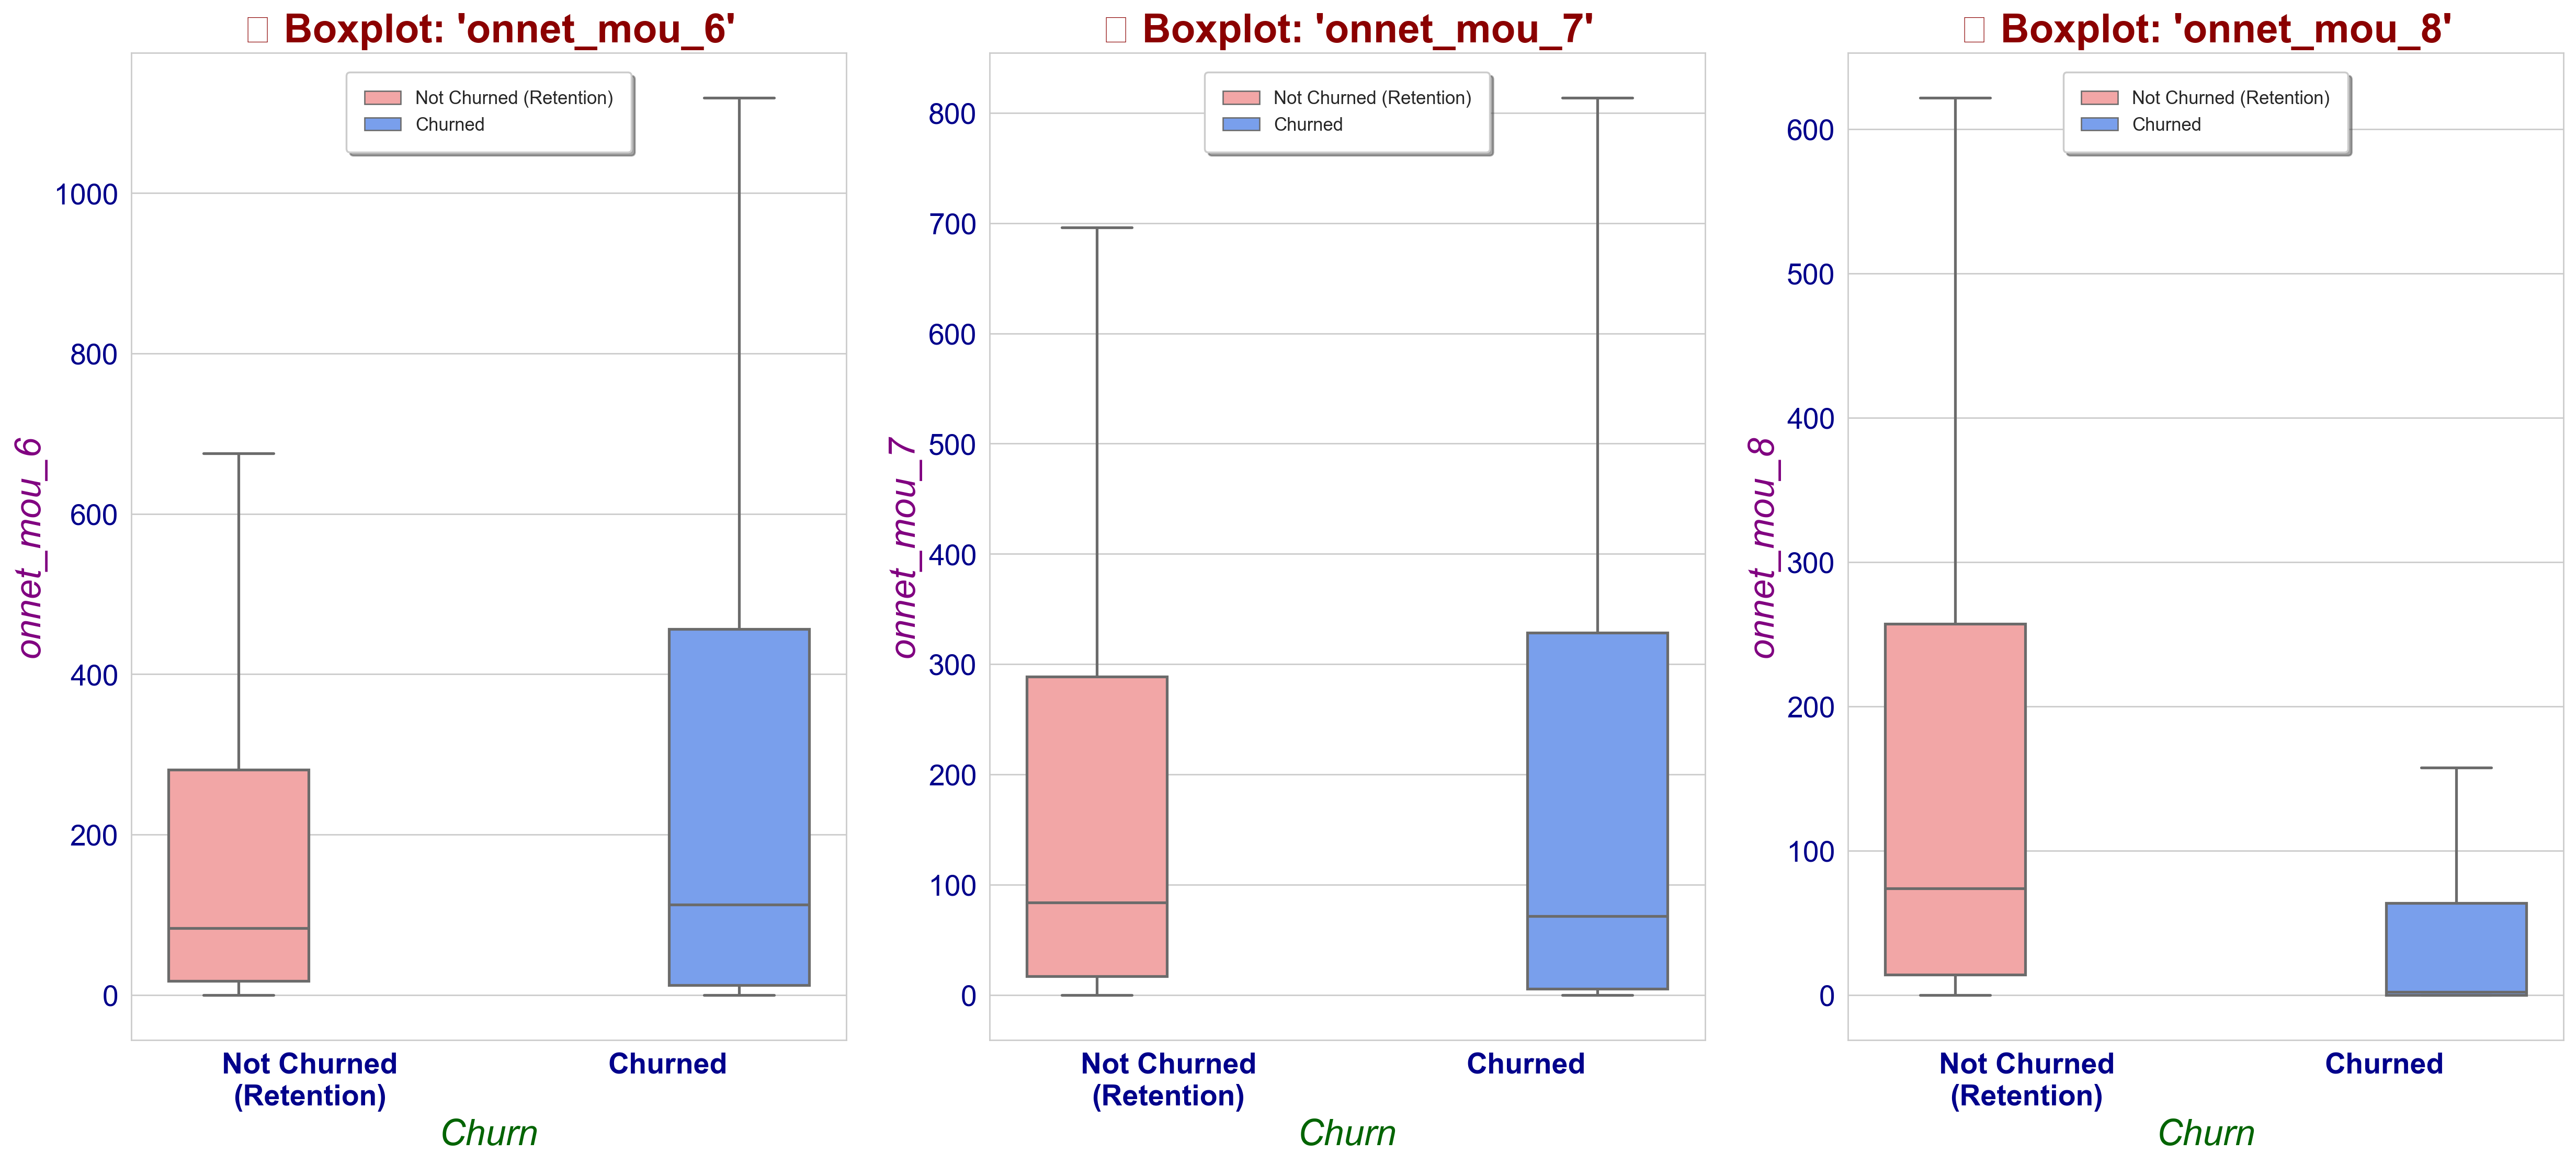

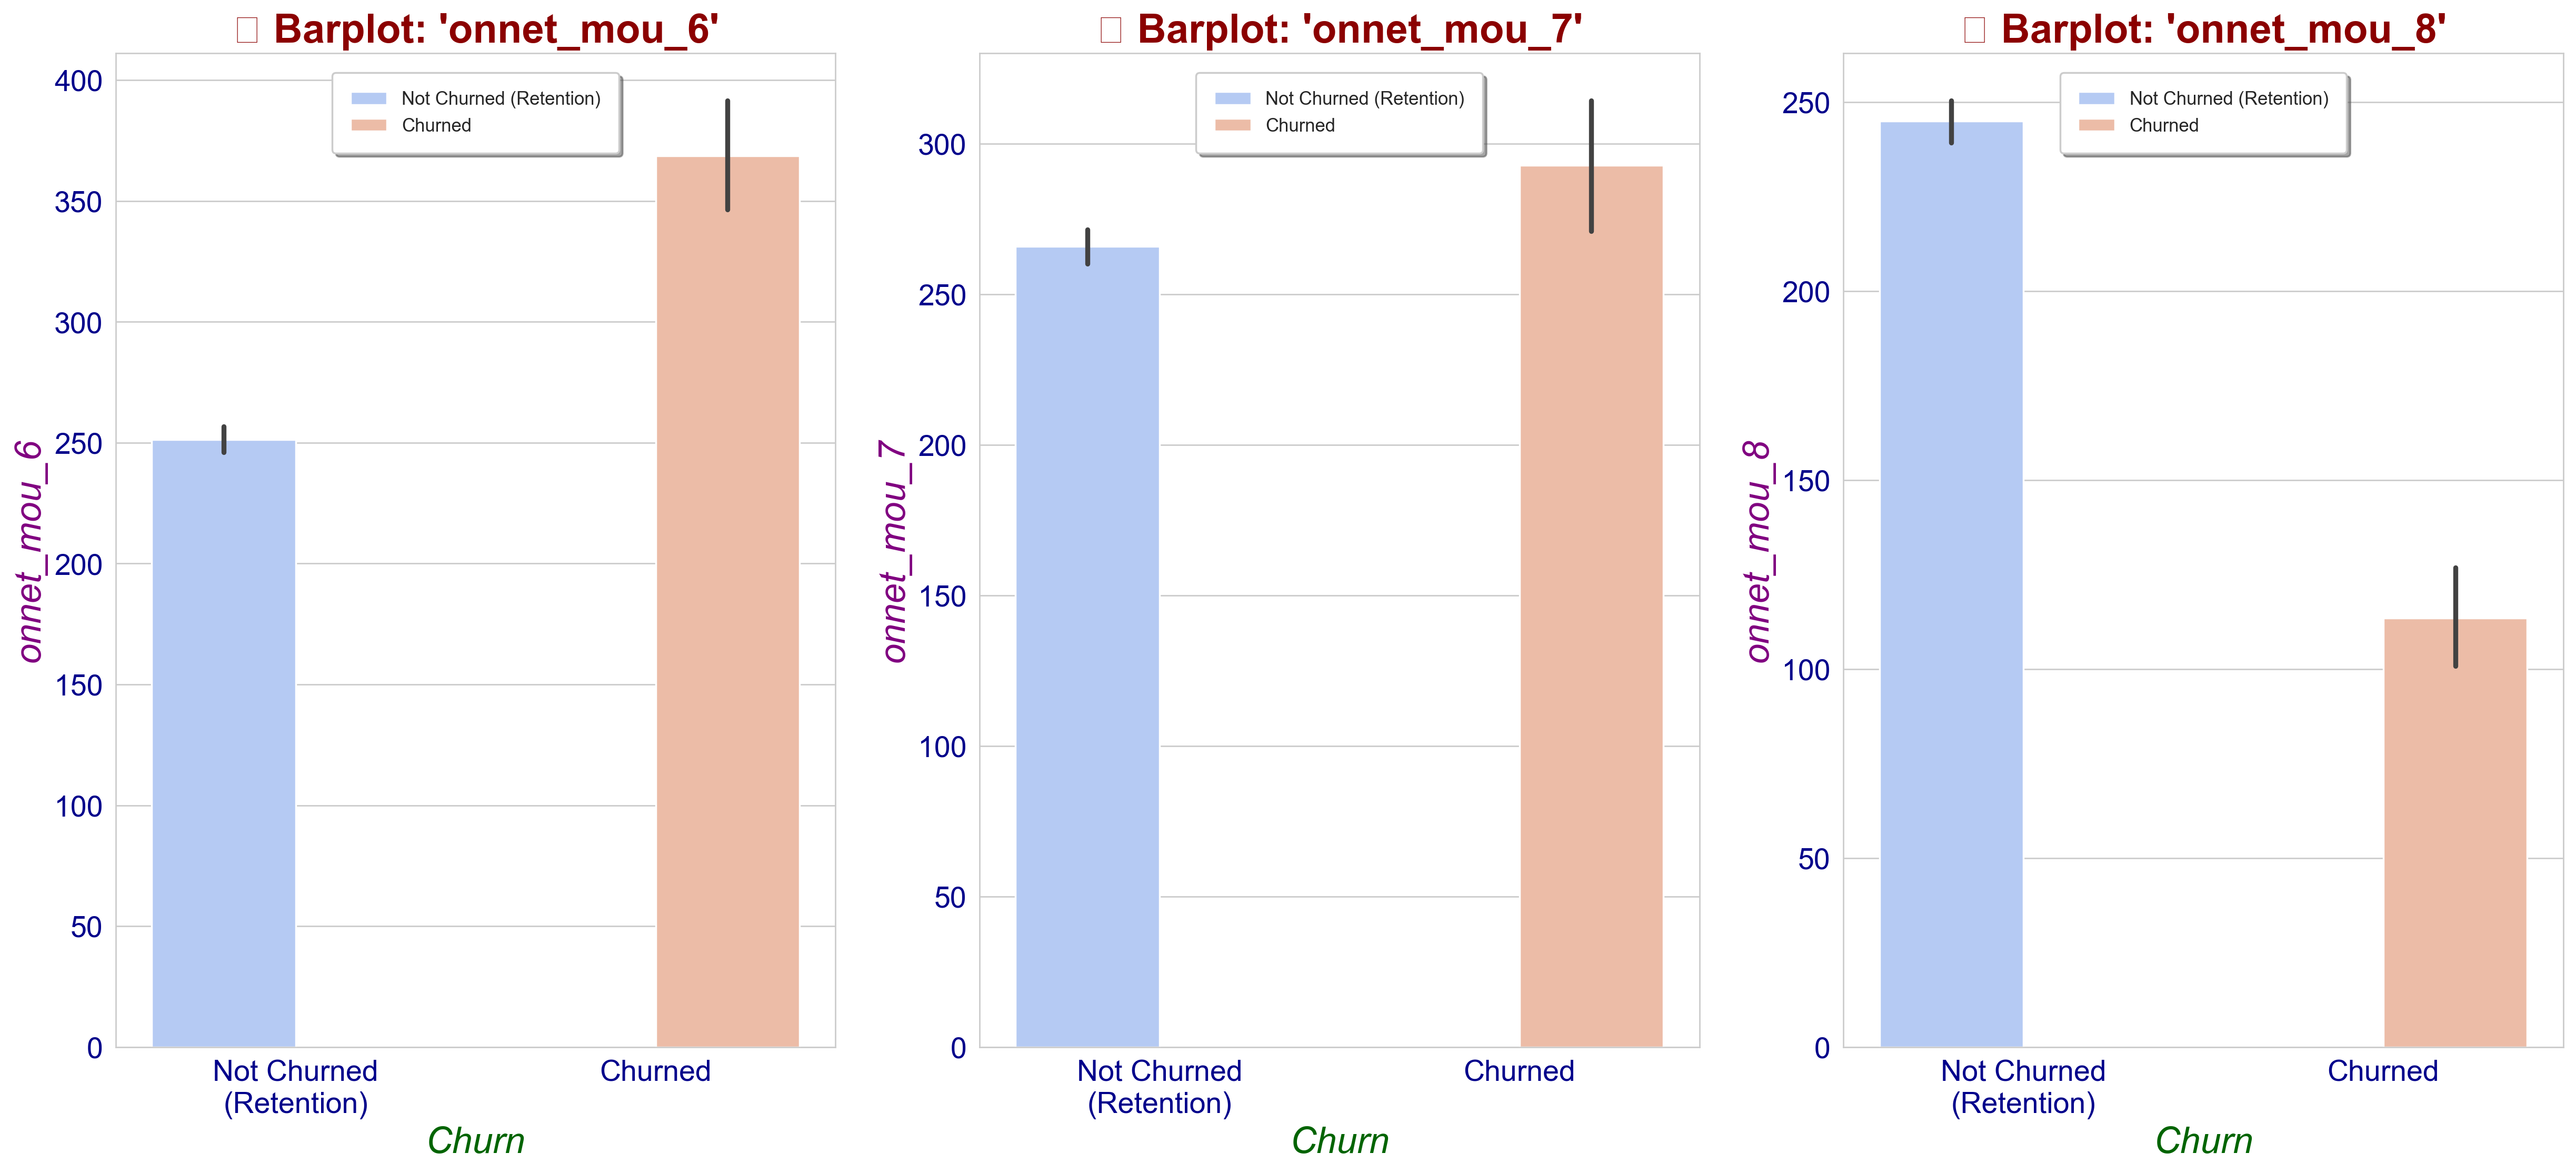

In [71]:
# Plotting 'onnet_mou' boxplots and barplots
plot_boxplots_monthly('onnet_mou') 
plot_barplots_monthly('onnet_mou')

**Observation:** The `onnet_mou` (minutes of usage) decline as we move from good phase (i.e. month 6 and 7) to the action phase(month 8) for churned customers.

#### (h) Tenure (Age on network) Analysis

In [72]:
##Creating  a new column tenure_year to store the number of years the customer has been on network T
high_value_customers['tenure_year'] = round(high_value_customers['aon']/365, 1)

print(high_value_customers.tenure_year.value_counts())
print("Min:",high_value_customers.tenure_year.min())
print("Max:",high_value_customers.tenure_year.max())

1.3     1361
0.6     1110
0.8     1068
1.0     1035
0.9      991
1.4      976
0.7      927
1.2      863
1.1      755
1.7      694
2.0      680
1.8      672
1.5      655
0.5      646
1.9      629
1.6      523
2.1      518
2.2      515
2.3      501
2.4      488
10.0     476
2.6      463
2.8      420
3.0      416
2.9      411
2.5      396
2.7      363
6.5      347
3.1      338
3.3      333
3.2      310
3.4      303
3.6      295
8.5      289
3.5      288
3.7      283
3.8      278
4.2      247
3.9      244
4.0      242
4.6      230
7.1      216
6.6      214
6.9      212
4.3      207
4.7      205
7.0      201
6.8      195
7.6      192
4.1      187
7.5      181
7.9      174
6.4      171
4.9      171
7.8      170
4.4      165
6.7      163
7.2      160
5.4      160
8.0      158
7.4      156
6.2      155
6.3      155
4.5      145
5.0      144
8.8      141
4.8      139
5.5      139
7.7      138
8.1      137
6.1      136
8.2      133
5.3      132
5.6      129
8.4      129
8.3      127
7.3      127

In [73]:
##Creating bins
my_bins = [0,1,2,3,5,12]
my_labels_aon= ['0_1_year','1_2_year','2_3_year','3_5_year','5_12_year']
high_value_customers['tenure'] = pd.cut(high_value_customers['tenure_year'], bins= my_bins, labels= my_labels_aon)

##Dropping 'tenure_year' and 'aon' column as we have already created bins in 'tenure' column
high_value_customers.drop(['tenure_year','aon'] , axis=1, inplace= True)

high_value_customers.tenure.value_counts()

1_2_year     7808
5_12_year    7123
0_1_year     5777
3_5_year     4754
2_3_year     4491
Name: tenure, dtype: int64

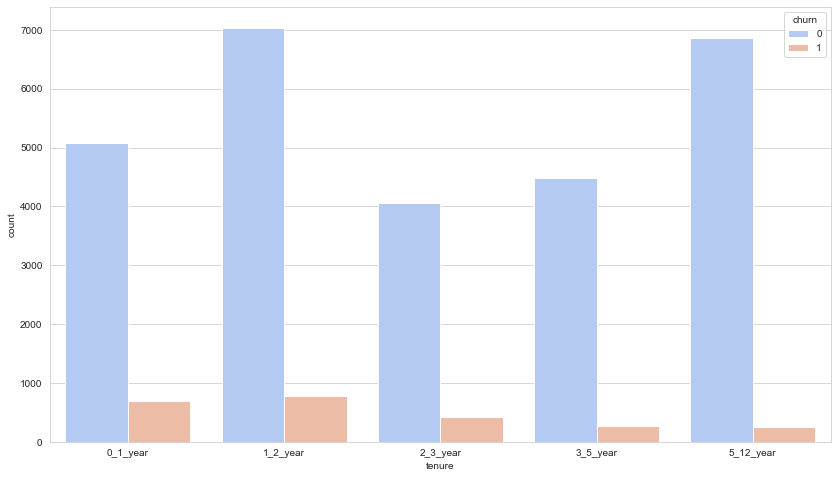

In [74]:
##Visualizing 'age of network' and 'churn'
plt.figure(figsize=(14,8))
tenure_df= high_value_customers[['tenure','churn']]
sns.countplot(x = 'tenure', hue = 'churn',data = tenure_df,palette=("coolwarm"))
plt.show()

**Observation:** We see that as the `age on network (AON) increases`, the number of `people churned out (i.e. churned class label: 1) are reduced`.

In [75]:
round(100*high_value_customers.isnull().sum()/len(high_value_customers.index),2).sort_values(ascending=False)

fb_user_8                           46.80
night_pck_user_8                    46.80
fb_user_6                           44.11
night_pck_user_6                    44.11
night_pck_user_7                    43.12
fb_user_7                           43.12
og_others_8                          3.91
ic_others_8                          3.91
ic_others_6                          1.81
og_others_6                          1.81
og_others_7                          1.79
ic_others_7                          1.79
mobile_number                        0.00
last_day_rch_amt_7                   0.00
total_rech_data_6                    0.00
total_rech_data_7                    0.00
total_rech_data_8                    0.00
max_rech_data_6                      0.00
max_rech_data_7                      0.00
last_day_rch_amt_8                   0.00
max_rech_amt_6                       0.00
last_day_rch_amt_6                   0.00
max_rech_amt_8                       0.00
max_rech_amt_7                    

In [76]:
##Dropping 'fb_user_*' and 'night_pck_user_*' features
cols_to_drop = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
high_value_customers.drop(cols_to_drop, axis=1, inplace= True)

##Imputing 'ic_others' and 'og_others' with 0 (<=3.91% missing values)
cols_to_impute = high_value_customers.columns[high_value_customers.columns.str.contains('ic_others|og_others')]
high_value_customers[cols_to_impute] = high_value_customers[cols_to_impute].replace(np.nan, 0)

In [77]:
round(100*high_value_customers.isnull().sum()/len(high_value_customers.index),2).sort_values(ascending=False)

mobile_number                       0.0
std_ic_t2f_mou_6                    0.0
max_rech_data_7                     0.0
max_rech_data_6                     0.0
total_rech_data_8                   0.0
total_rech_data_7                   0.0
total_rech_data_6                   0.0
last_day_rch_amt_8                  0.0
last_day_rch_amt_7                  0.0
last_day_rch_amt_6                  0.0
max_rech_amt_8                      0.0
max_rech_amt_7                      0.0
max_rech_amt_6                      0.0
total_rech_amt_8                    0.0
total_rech_amt_7                    0.0
total_rech_amt_6                    0.0
total_rech_num_8                    0.0
total_rech_num_7                    0.0
total_rech_num_6                    0.0
ic_others_8                         0.0
ic_others_7                         0.0
ic_others_6                         0.0
isd_ic_mou_8                        0.0
isd_ic_mou_7                        0.0
isd_ic_mou_6                        0.0


In [78]:
high_value_customers.shape

(29953, 121)

In [79]:
##Features in telecom_hv corresponding to 'month_6'
attributes_6 = list(high_value_customers.columns[high_value_customers.columns.str.contains("_6")])
print(attributes_6)
print(len(attributes_6))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'vbc_3g_6', 'total_rech_data_amt_6', 'avg_total_rech_plus_data_amt_6_7']
40


In [80]:
##Features in telecom_hv corresponding to 'month_7'
attributes_7 = high_value_customers.columns[high_value_customers.columns.str.contains("_7")]
print(attributes_7)
print(len(attributes_7))

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'last_day_rch_amt_7', 'total_rech_data_7', 'max_rech_data_7',
       'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7',
       'total_rech_data_amt_7', 'avg_total_rech_plus_data_amt_6_7'],
      dtype='object')
40


In [81]:
##Firstly, let's drop 'avg_total_rech_plus_data_amt_6_7'
high_value_customers.drop('avg_total_rech_plus_data_amt_6_7', axis=1, inplace= True)

In [82]:
##Let's combine and take average of remaining '_6'  and '_7' attributes
feature_names_6 = [i.split('_6')[0] for i in attributes_6 if i.endswith("_6")]
feature_names_7 = [i.split('_7')[0] for i in attributes_7 if i.endswith("_7")]
uncommon_feature_names = [i for i,j in (zip(feature_names_6, feature_names_7)) if i!=j]
uncommon_feature_names

[]

In [83]:
common_feature_names= [i for i,j in (zip(feature_names_6, feature_names_7)) if i==j]
common_feature_names

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_rech_data_amt']

In [84]:
#Since all features of '_6' exist in '_7'. Therefore let's find the new 'avg_6_7' features 
##(together representing the good phase)

f6_cols=[]
f7_cols=[]
for feature in common_feature_names:
    f6= feature+'_6'
    f7= feature+'_7'
    avg_67= feature+'_avg_6_7'
    
    f6_cols.append(f6)  ##Storing all remaining attributes from '_6'
    f7_cols.append(f7)  ##Storing all remaining attributes from '_7'
    
    high_value_customers[avg_67] = (high_value_customers[f6] + high_value_customers[f7])/2

high_value_customers.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  \
0          0.00          0.00          0.00          0.00  ...   
7         52.29        453.43        567.16        325.91  ...   
8         35.08         94.66         80.63        136.48  ...   
21        85.14        757.93        896.68        983.39  ...   
23        33.58         85.41         89.36        205.89  ...   

    max_rech_data_avg_6_7  av_rech_amt_data_avg_6_7  vol_2g_mb_avg_6_7  \
0                   252.0                     252.0             15.725   
7                     0.0                       0.0              0.000   
8                    77.0                      88.5            178.000   
21                    0.0                       0.0              0.000   
23                   89.5                     178.0              0.240   

    vol_3g_mb_avg_6_7  monthly_2g_avg_6_7  sachet_2g_avg_6_7  \
0             117.165                 0.0                0.0   
7               0.000                 0.0                0.0   
8             375.475                 0.5                0.5   
21              0.000                 0.0                0.0   
23            299.545                 0.0                0.0   

    monthly_3g_avg_6_7  sachet_3g_avg_6_7  vbc_3g_avg_6_7  \
0                  1.0                0.0          50.600   
7                  0.0                0.0          19.060   
8                  0.0                0.0         516.405   
21                 0.0                0.0           0.000   
23                 1.0                0.0          25.930   

    total_rech_data_amt_avg_6_7  
0                         252.0  
7                           0.0  
8                         177.0  
21                          0.0  
23                        356.0  

[5 rows x 159 columns]

In [85]:
##Dropping the fundamental explanatory variables belonging to '_6'
high_value_customers.drop(f6_cols, axis=1, inplace=True)

In [86]:
##Dropping the fundamental explanatory variables belonging to '_6'
high_value_customers.drop(f7_cols, axis=1, inplace=True)

In [87]:
high_value_customers.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  ...  max_rech_data_avg_6_7  av_rech_amt_data_avg_6_7  \
0               0.00  ...                  252.0                     252.0   
7               0.00  ...                    0.0                       0.0   
8               7.15  ...                   77.0                      88.5   
21              0.00  ...                    0.0                       0.0   
23             17.71  ...                   89.5                     178.0   

    vol_2g_mb_avg_6_7  vol_3g_mb_avg_6_7  monthly_2g_avg_6_7  \
0              15.725            117.165                 0.0   
7               0.000              0.000                 0.0   
8             178.000            375.475                 0.5   
21              0.000              0.000                 0.0   
23              0.240            299.545                 0.0   

    sachet_2g_avg_6_7  monthly_3g_avg_6_7  sachet_3g_avg_6_7  vbc_3g_avg_6_7  \
0                 0.0                 1.0                0.0          50.600   
7                 0.0                 0.0                0.0          19.060   
8                 0.5                 0.0                0.0         516.405   
21                0.0                 0.0                0.0           0.000   
23                0.0                 1.0                0.0          25.930   

    total_rech_data_amt_avg_6_7  
0                         252.0  
7                           0.0  
8                         177.0  
21                          0.0  
23                        356.0  

[5 rows x 81 columns]

In [88]:
high_value_customers.shape

(29953, 81)

In [89]:
high_value_customers.describe(percentiles= [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

mobile_number        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
count   2.995300e+04  29953.000000  29953.000000  29953.000000   29953.000000   
mean    7.001206e+09    508.890301    234.345252    335.123008      12.512269   
std     6.908102e+05    502.136278    458.751242    481.985106      74.179181   
min     7.000000e+09   -945.808000      0.000000      0.000000       0.000000   
1%      7.000026e+09      0.000000      0.000000      0.000000       0.000000   
10%     7.000251e+09     84.302800      0.000000      2.200000       0.000000   
25%     7.000609e+09    231.615000     10.440000     46.760000       0.000000   
50%     7.001203e+09    427.604000     65.660000    182.840000       0.000000   
75%     7.001804e+09    661.753000    240.630000    438.860000       0.000000   
90%     7.002165e+09    977.546400    666.266000    823.880000      15.030000   
95%     7.002285e+09   1255.086400   1075.384000   1167.620000      56.362000   
99%     7.002386e+09   1986.739600   2159.676400   2191.731200     282.689200   
99.9%   7.002408e+09   3978.343672   4169.950800   4473.025440     918.464960   
max     7.002411e+09  33543.624000  10752.560000  14007.340000    4169.810000   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       19.889295         78.153334        151.810056          5.891865   
std       104.799622        227.540167        233.745412         19.516259   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          2.540000         13.130000          0.000000   
50%         0.000000         20.740000         67.790000          0.000000   
75%         0.000000         72.130000        197.030000          3.930000   
90%        28.880000        179.138000        398.496000         15.188000   
95%       100.692000        299.542000        574.828000         28.390000   
99%       427.068400        913.858000       1088.679600         82.249600   
99.9%    1365.610640       2767.469520       2101.222400        234.916640   
max      5337.040000      10752.560000       4961.330000        928.490000   

       loc_og_t2c_mou_8  ...  max_rech_data_avg_6_7  av_rech_amt_data_avg_6_7  \
count      29953.000000  ...           29953.000000              29953.000000   
mean           1.701889  ...              79.010717                135.348290   
std            7.147606  ...             103.245264                182.091835   
min            0.000000  ...               0.000000                  0.000000   
1%             0.000000  ...               0.000000                  0.000000   
10%            0.000000  ...               0.000000                  0.000000   
25%            0.000000  ...               0.000000                  0.000000   
50%            0.000000  ...              25.000000                 92.000000   
75%            0.010000  ...             149.500000                211.000000   
90%            4.576000  ...             203.000000                314.700000   
95%            9.354000  ...             252.000000                425.000000   
99%           28.210000  ...             449.000000                782.240000   
99.9%         72.907200  ...             855.000000               1638.000000   
max          351.830000  ...            1555.000000               5142.500000   

       vol_2g_mb_avg_6_7  vol_3g_mb_avg_6_7  monthly_2g_avg_6_7  \
count       29953.000000       29953.000000        29953.000000   
mean          125.818200         357.604327            0.178830   
std           299.869268         840.511247            0.387753   
min             0.000000           0.000000            0.000000   
1%              0.000000           0.000000            0.000000   
10

#### 4.Outlier Treatment

In [90]:
##Continuous features
cont_cols_hv= [i for i in high_value_customers.columns if i not in ['mobile_number', 'churn', 'tenure']]
cont_cols_hv

##Using numpy clip() to cap the values of outliers in between 1 and 99.9 percentiles

for col in cont_cols_hv:
    percentiles = high_value_customers[col].quantile([0.01,0.999]).values
    high_value_customers[col] = np.clip(high_value_customers[col], percentiles[0], percentiles[1])

In [91]:
##Checking categorical column 'tenure'
high_value_customers.tenure.head()

0     2_3_year
7     2_3_year
8     0_1_year
21    1_2_year
23    1_2_year
Name: tenure, dtype: category
Categories (5, object): ['0_1_year' < '1_2_year' < '2_3_year' < '3_5_year' < '5_12_year']

In [92]:
###Creating dummies for categorical variable 'tenure'
cat_cols= ['tenure']
d_tenure = pd.get_dummies(high_value_customers['tenure'], prefix='tenure', drop_first = True)
high_value_customers = pd.concat([high_value_customers, d_tenure], axis = 1)

##Dropping the 'tenure' column
high_value_customers.drop(cat_cols, axis=1, inplace=True)

In [93]:
high_value_customers.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  ...  monthly_2g_avg_6_7  sachet_2g_avg_6_7  \
0               0.00  ...                 0.0                0.0   
7               0.00  ...                 0.0                0.0   
8               7.15  ...                 0.5                0.5   
21              0.00  ...                 0.0                0.0   
23             17.71  ...                 0.0                0.0   

    monthly_3g_avg_6_7  sachet_3g_avg_6_7  vbc_3g_avg_6_7  \
0                  1.0                0.0          50.600   
7                  0.0                0.0          19.060   
8                  0.0                0.0         516.405   
21                 0.0                0.0           0.000   
23                 1.0                0.0          25.930   

    total_rech_data_amt_avg_6_7  tenure_1_2_year  tenure_2_3_year  \
0                         252.0                0                1   
7                           0.0                0                1   
8                         177.0                0                0   
21                          0.0                1                0   
23                        356.0                1                0   

    tenure_3_5_year  tenure_5_12_year  
0                 0                 0  
7                 0                 0  
8                 0                 0  
21                0                 0  
23                0                 0  

[5 rows x 84 columns]

In [94]:
high_value_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mobile_number                29953 non-null  int64  
 1   arpu_8                       29953 non-null  float64
 2   onnet_mou_8                  29953 non-null  float64
 3   offnet_mou_8                 29953 non-null  float64
 4   roam_ic_mou_8                29953 non-null  float64
 5   roam_og_mou_8                29953 non-null  float64
 6   loc_og_t2t_mou_8             29953 non-null  float64
 7   loc_og_t2m_mou_8             29953 non-null  float64
 8   loc_og_t2f_mou_8             29953 non-null  float64
 9   loc_og_t2c_mou_8             29953 non-null  float64
 10  std_og_t2t_mou_8             29953 non-null  float64
 11  std_og_t2m_mou_8             29953 non-null  float64
 12  std_og_t2f_mou_8             29953 non-null  float64
 13  isd_og_mou_8    

In [95]:
##Dropping 'mobile_number' attribute from the dataframe as it is won't be useful while modeling as it is an ID.
high_value_customers.drop('mobile_number', axis=1, inplace= True)

In [96]:
high_value_customers.shape

(29953, 83)

In [97]:
high_value_customers.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    std_og_t2t_mou_8  ...  monthly_2g_avg_6_7  sachet_2g_avg_6_7  \
0               0.00  ...                 0.0                0.0   
7              12.01  ...                 0.0                0.0   
8              22.58  ...                 0.5                0.5   
21             61.79  ...                 0.0                0.0   
23              0.00  ...                 0.0                0.0   

    monthly_3g_avg_6_7  sachet_3g_avg_6_7  vbc_3g_avg_6_7  \
0                  1.0                0.0          50.600   
7                  0.0                0.0          19.060   
8                  0.0                0.0         516.405   
21                 0.0                0.0           0.000   
23                 1.0                0.0          25.930   

    total_rech_data_amt_avg_6_7  tenure_1_2_year  tenure_2_3_year  \
0                         252.0                0                1   
7                           0.0                0                1   
8                         177.0                0                0   
21                          0.0                1                0   
23                        356.0                1                0   

    tenure_3_5_year  tenure_5_12_year  
0                 0                 0  
7                 0                 0  
8                 0                 0  
21                0                 0  
23                0                 0  

[5 rows x 83 columns]

### 5. Model Building and Predictions

## (i) Logistic Regression Model Using RFE

#### Train-Test Split

In [98]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(high_value_customers, train_size=0.7, test_size = 0.3, random_state=42)

#### Feature Scaling

In [99]:
from sklearn.preprocessing import MinMaxScaler
all_cols = df_train.columns
scaler = MinMaxScaler()
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
df_test[all_cols] = scaler.transform(df_test[all_cols])

In [100]:
print(df_train.shape)
print(df_test.shape)

(20967, 83)
(8986, 83)


In [101]:
df_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
49069  0.025601     0.000091      0.004518            0.0            0.0   
90375  0.417918     0.856072      0.033364            0.0            0.0   
80131  0.120122     0.000000      0.029070            0.0            0.0   
36950  0.000000     0.000000      0.000000            0.0            0.0   
22699  0.186370     0.006350      0.395323            0.0            0.0   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
49069          0.000137          0.009199          0.001490          0.000000   
90375          0.007711          0.007205          0.001064          0.000000   
80131          0.000000          0.056948          0.000000          0.000000   
36950          0.000000          0.000000          0.000000          0.000000   
22699          0.009568          0.836860          0.005321          0.002469   

       std_og_t2t_mou_8  ...  monthly_2g_avg_6_7  sachet_2g_avg_6_7  \
49069          0.000000  ...                0.00           0.305556   
90375          0.938489  ...                0.00           0.000000   
80131          0.000000  ...                0.00           0.027778   
36950          0.000000  ...                0.25           0.000000   
22699          0.000000  ...                0.00           0.000000   

       monthly_3g_avg_6_7  sachet_3g_avg_6_7  vbc_3g_avg_6_7  \
49069                 0.0                0.0             0.0   
90375                 0.0                0.0             0.0   
80131                 0.0                0.0             0.0   
36950                 0.0                0.0             0.0   
22699                 0.0                0.0             0.0   

       total_rech_data_amt_avg_6_7  tenure_1_2_year  tenure_2_3_year  \
49069                     0.026330              1.0              0.0   
90375                     0.000000              0.0              1.0   
80131                     0.000831              1.0              0.0   
36950                     0.006582              0.0              0.0   
22699                     0.000000              0.0              0.0   

       tenure_3_5_year  tenure_5_12_year  
49069              0.0               0.0  
90375              0.0               0.0  
80131              0.0               0.0  
36950              0.0               1.0  
22699              1.0               0.0  

[5 rows x 83 columns]

In [102]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [103]:
y = high_value_customers['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))

Before OverSampling, counts of label '1'(train_set): 1695
Before OverSampling, counts of label '0'(train_set): 19272 

Before OverSampling, churn event rate (Entire Dataset): 8.123% 



#### Data Imbalance Handling

##### Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [104]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_res==1)/len(y_res)*100,2)))

After OverSampling, the shape of train_X: (38544, 82)
After OverSampling, the shape of train_y: (38544,) 

After OverSampling, counts of label '1': 19272
After OverSampling, counts of label '0': 19272
After OverSampling, churn event rate : 50.0% 



#### Running First Training Model

In [105]:
import statsmodels.api as sm

In [106]:
# Logistic regression model
logm1 = sm.GLM(y_res,(sm.add_constant(X_res)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38461
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14363.
Date:                Mon, 10 Mar 2025   Deviance:                       28725.
Time:                        12:33:05   Pearson chi2:                 1.38e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5201      0.053     28.697      0.000       1.416       1.624
arpu_8                          2.9414      0.774      3.799      0.000       1.424       4.459
onnet_mou_8                    12.4030      2.879      4.308      0.000       6.760      18.046
offnet_mou_8                    2.3919      2.951      0.811      0.418      -3.391       8.175
roam_ic_mou_8                  -0.5962      0.333     -1.788      0.074      -1.250       0.057
roam_og_mou_8                  -1.2456      0.931     -1.338      0.181      -3.071       0.580
loc_og_t2t_mou_8              -15.9373      2.209     -7.215      0.000     -20.267     -11.608
loc_og_t2m_mou_8               -4.9654      1.463     -3.394      0.001      -7.833      -2.098
loc_og_t2f_mou_8               -2.5472      0.735     -3.464      0.001      -3.988      -1.106
loc_og_t2c_mou_8                1.2880      0.335      3.847      0.000       0.632       1.944
std_og_t2t_mou_8              -13.5422      2.604     -5.200      0.000     -18.646      -8.438
std_og_t2m_mou_8               -6.4223      2.799     -2.294      0.022     -11.909      -0.936
std_og_t2f_mou_8               -0.4534      0.635     -0.714      0.476      -1.699       0.792
isd_og_mou_8                   -2.0228      0.868     -2.330      0.020      -3.725      -0.321
spl_og_mou_8                   -2.7516      0.600     -4.587      0.000      -3.927      -1.576
og_others_8                    -7.2895      3.101     -2.351      0.019     -13.368      -1.211
loc_ic_t2t_mou_8               -8.5643      1.041     -8.225      0.000     -10.605      -6.523
loc_ic_t2m_mou_8              -18.7848      0.832    -22.574      0.000     -20.416     -17.154
loc_ic_t2f_mou_8               -6.0990      0.811     -7.521      0.000      -7.688      -4.510
std_ic_t2t_mou_8               -7.5161      0.773     -9.720      0.000      -9.032      -6.001
std_ic_t2m_mou_8               -2.0587      0.596     -3.452      0.001      -3.228      -0.890
std_ic_t2f_mou_8               -0.8127      0.505     -1.609      0.108      -1.803       0.177
spl_ic_mou_8                   -5.7118      0.351    -16.284      0.000      -6.399      -5.024
isd_ic_mou_8                   -1.2943      0.589     -2.199      0.028      -2.448      -0.140
ic_others_8                     0.8349      0.518      1.611      0.107      -0.181       1.851
total_rech_num_8               -5.2922      0.361    -14.666      0.000      -5.999      -4.585
total_rech_amt_8               -3.0876      0.866     -3.566      0.000      -4.784      -1.391
max_rech_amt_8                  0.5458      0.436      1.252      0.211      -0.309       1.400
last_day_rch_amt_8             -5.1720      0.251    -20.639      0.000      -5.663      -4.681
total_rech_

#### Feature Selection Using RFE

In [107]:
logreg = LogisticRegression() 
logreg

LogisticRegression()

In [108]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_res, y_res)

In [109]:
list(zip(X_res.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 49),
 ('onnet_mou_8', False, 35),
 ('offnet_mou_8', False, 13),
 ('roam_ic_mou_8', False, 56),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 4),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 32),
 ('std_og_t2t_mou_8', False, 17),
 ('std_og_t2m_mou_8', False, 30),
 ('std_og_t2f_mou_8', False, 46),
 ('isd_og_mou_8', False, 48),
 ('spl_og_mou_8', False, 23),
 ('og_others_8', False, 10),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 2),
 ('std_ic_t2m_mou_8', False, 9),
 ('std_ic_t2f_mou_8', False, 37),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 33),
 ('ic_others_8', False, 63),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 66),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_8', False, 6),
 ('av_rech_amt_data_8', False, 42),
 ('vol_2g_mb_8', True

In [110]:
##Columns supported by 'rfe.support_'
rfe_supported_cols = X_res.columns[rfe.support_]
rfe_supported_cols

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'vbc_3g_8',
       'arpu_avg_6_7', 'loc_ic_t2m_mou_avg_6_7'],
      dtype='object')

In [111]:
##Creating X_res_rfe dataframe with RFE selected variables
X_res_rfe = X_res[rfe_supported_cols]

In [112]:
##Defining a function for VIFs (variation inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def mod_vif(X_res_set):
    high_value_customers = pd.DataFrame()
    X = X_res_set
    high_value_customers['Features'] = X.columns
    high_value_customers['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    high_value_customers['VIF'] = round(high_value_customers['VIF'], 2)
    high_value_customers = high_value_customers.sort_values(by = "VIF", ascending = False)
    high_value_customers = high_value_customers[~(high_value_customers.Features=='const')] 
    return high_value_customers

#### Model 1:

In [113]:
##Building Model 1: 
X_res_rfe = sm.add_constant(X_res_rfe)
logm3 = sm.GLM(y_res,X_res_rfe, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

##Checking VIFs of independent variables
mod_vif(X_res_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38528
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15159.
Date:                Mon, 10 Mar 2025   Deviance:                       30317.
Time:                        12:33:32   Pearson chi2:                 7.73e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

Features   VIF
9         total_rech_amt_8  3.54
5         loc_ic_t2m_mou_8  3.04
15  loc_ic_t2m_mou_avg_6_7  2.34
8         total_rech_num_8  2.00
2         loc_og_t2m_mou_8  1.93
10      last_day_rch_amt_8  1.61
14            arpu_avg_6_7  1.57
11       total_rech_data_8  1.41
3         loc_og_t2f_mou_8  1.28
6         loc_ic_t2f_mou_8  1.28
1            roam_og_mou_8  1.16
13                vbc_3g_8  1.15
4         loc_ic_t2t_mou_8  1.14
12             vol_2g_mb_8  1.14
7             spl_ic_mou_8  1.03

In [114]:
##Getting the predicted values on the train set
y_res_pred = res.predict(X_res_rfe)
y_res_pred[:10]

0    0.006916
1    0.009707
2    0.008665
3    0.928145
4    0.007777
5    0.305235
6    0.000010
7    0.567989
8    0.231780
9    0.432551
dtype: float64

In [115]:
y_res_pred = y_res_pred.values.reshape(-1)
y_res_pred[:10]

array([6.91625300e-03, 9.70729855e-03, 8.66495148e-03, 9.28144701e-01,
       7.77730412e-03, 3.05234950e-01, 9.91236481e-06, 5.67988501e-01,
       2.31779973e-01, 4.32550929e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [116]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

Churn  Churn_Prob  CustID
0    0.0    0.006916       0
1    0.0    0.009707       1
2    0.0    0.008665       2
3    1.0    0.928145       3
4    0.0    0.007777       4

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [117]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0    0.0    0.006916       0          0
1    0.0    0.009707       1          0
2    0.0    0.008665       2          0
3    1.0    0.928145       3          1
4    0.0    0.007777       4          0

In [118]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score

In [119]:
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

0.8409350352843503


In [120]:
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
confusion

array([[15747,  3525],
       [ 2606, 16666]], dtype=int64)

#### Plotting the ROC Curve

In [121]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC-AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False)

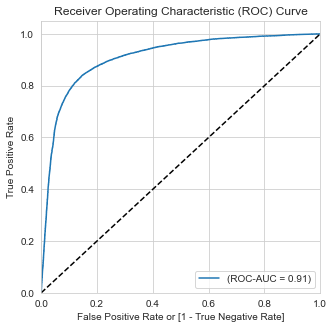

In [123]:
##ROC curve for train data
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [124]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0    0.0    0.006916       0          0    1    0    0    0    0    0    0   
1    0.0    0.009707       1          0    1    0    0    0    0    0    0   
2    0.0    0.008665       2          0    1    0    0    0    0    0    0   
3    1.0    0.928145       3          1    1    1    1    1    1    1    1   
4    0.0    0.007777       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    0    0    0

In [125]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.704571  0.973225  0.435917
0.2   0.2  0.761441  0.952159  0.570724
0.3   0.3  0.796804  0.928082  0.665525
0.4   0.4  0.823604  0.900737  0.746472
0.5   0.5  0.840935  0.864778  0.817092
0.6   0.6  0.844956  0.816210  0.873703
0.7   0.7  0.832555  0.748962  0.916148
0.8   0.8  0.787775  0.623080  0.952470
0.9   0.9  0.618073  0.251142  0.985004


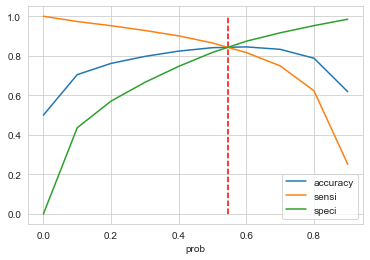

In [126]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.545, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

##### From the curve above, 0.545 is the optimum point to take it as a cutoff probability.

In [127]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.545 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0    0.0    0.006916       0          0    1    0    0    0    0    0    0   
1    0.0    0.009707       1          0    1    0    0    0    0    0    0   
2    0.0    0.008665       2          0    1    0    0    0    0    0    0   
3    1.0    0.928145       3          1    1    1    1    1    1    1    1   
4    0.0    0.007777       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    1                1  
4    0    0    0                0

In [128]:
##Confusion Matrix (optimal train set) 
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
confusion_train_opt

array([[16277,  2995],
       [ 2970, 16302]], dtype=int64)

In [129]:
TP2 = confusion_train_opt[1,1] # true positive 
TN2 = confusion_train_opt[0,0] # true negatives
FP2 = confusion_train_opt[0,1] # false positives
FN2 = confusion_train_opt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8458904109589042
Specificity =  0.8445931921959319
False Positive Rate =  0.15540680780406807
Precision =  0.8447945276467844
True Negative Prediction Rate =  0.8456902374396009


#### Precision and Recall Trade-off

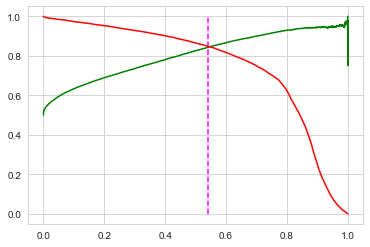

In [130]:
from sklearn.metrics import precision_recall_curve
sns.set_style('whitegrid')

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")    ##Precision: Green-Line
plt.plot(thresholds, r[:-1], "r-")   ##Recall: Red-Line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()

#### Prediction and Evaluation: Test Set

In [131]:
##Making predictions on test data

X_res_new1 = X_res_rfe
X_res_new1.drop('const', axis=1, inplace=True)

#Assigning similar columns to test data as that of train set
X_test = X_test[X_res_new1.columns]
X_test.head()

roam_og_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_ic_t2t_mou_8  \
73764       0.064067          0.011617          0.000000          0.035494   
18280       0.000000          0.874748          0.021880          0.085782   
43793       0.009747          0.000000          0.000000          0.000000   
69530       0.000000          0.000514          0.000000          0.003075   
71555       0.044002          0.110488          0.000426          0.101653   

       loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  \
73764          0.017438          0.007401           0.0          0.040000   
18280          0.187160          0.024457           0.0          0.200000   
43793          0.000000          0.000000           0.0          0.106667   
69530          0.020752          0.016524           0.0          0.133333   
71555          0.063609          0.003096           0.0          0.200000   

       total_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  vol_2g_mb_8  \
73764          0.099570            0.224101           0.000000     0.000000   
18280          0.421183            0.225894           0.071306     0.063779   
43793          0.036244            0.042131           0.106959     0.092021   
69530          0.024494            0.015239           0.178266     0.141414   
71555          0.222838            0.044820           0.106959     0.083778   

       vbc_3g_8  arpu_avg_6_7  loc_ic_t2m_mou_avg_6_7  
73764  0.065075      0.131209                0.029149  
18280  0.231828      0.296513                0.200435  
43793  0.000000      0.041520                0.003049  
69530  0.000000      0.026830                0.043745  
71555  0.153897      0.137059                0.072293

In [132]:
##Adding the constant to X_test (as res model is based on statsmodels)
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [133]:
##Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

73764    0.394757
18280    0.000030
43793    0.430439
69530    0.231590
71555    0.019473
62740    0.189412
27580    0.388493
67019    0.214994
22171    0.029105
75445    0.014677
dtype: float64

In [134]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([3.94756723e-01, 2.96859175e-05, 4.30439468e-01, 2.31590014e-01,
       1.94728289e-02, 1.89412122e-01, 3.88493457e-01, 2.14993634e-01,
       2.91052771e-02, 1.46767281e-02])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [135]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

Churn  Churn_Prob  CustID
0    0.0    0.394757   73764
1    0.0    0.000030   18280
2    0.0    0.430439   43793
3    0.0    0.231590   69530
4    0.0    0.019473   71555

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.54 (optimal cut-off) else 0

In [136]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.545 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0    0.0    0.394757   73764          0
1    0.0    0.000030   18280          0
2    0.0    0.430439   43793          0
3    0.0    0.231590   69530          0
4    0.0    0.019473   71555          0

In [137]:
##Confusion Matrix (optimal test set) 
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
confusion_test_opt

array([[6998, 1250],
       [ 147,  591]], dtype=int64)

In [138]:
accuracy_test_opt = metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
accuracy_test_opt

0.844535944803027

In [139]:
# Calculating model validation parameters
TP3 = confusion_test_opt[1,1] # true positive 
TN3 = confusion_test_opt[0,0] # true negatives
FP3 = confusion_test_opt[0,1] # false positives
FN3 = confusion_test_opt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8008130081300813
Specificity =  0.8484481086323957
False Positive Rate =  0.15155189136760427
Precision =  0.32102118413905484
True Negative Prediction Rate =  0.9794261721483555


In [140]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted),2)*100,"%")
print("The Sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

The accuracy of the predicted model is:  84.0 %
The Sensitivity of the predicted model is:  80.0 %


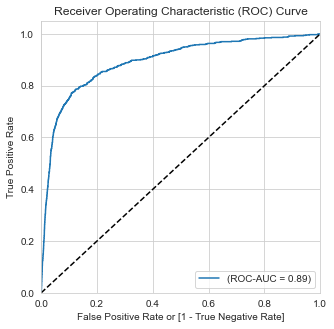

In [141]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Churn,y_test_pred_final.Churn_Prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_test_pred_final.Churn,y_test_pred_final.Churn_Prob)

#### Top 15 Features based on Importance

In [142]:
##Creating a dataframe of features and coefficients

##Coefficients of features
rfe_coef_list = np.array(rfe.estimator_.coef_.round(4).tolist()[0]) 

rfe_df = pd.DataFrame({'Features':X_res_rfe.columns, 'Coefficients':rfe_coef_list, \
                         'Abs_Coefficients (Desc_Sort)':abs(rfe_coef_list)})

##Sorting coefficient in descending order of absolute coefficient values and reset index to 'Features'
rfe_df = rfe_df.sort_values(by='Abs_Coefficients (Desc_Sort)', ascending=False)
rfe_df["Rank (Feature Importance Based)"] = rfe_df["Abs_Coefficients (Desc_Sort)"].rank(ascending=False)
rfe_df.drop('Abs_Coefficients (Desc_Sort)', axis=1, inplace=True)
rfe_df.set_index('Features', inplace= True)
rfe_df

Coefficients  Rank (Feature Importance Based)
Features                                                             
loc_ic_t2m_mou_8            -14.3002                              1.0
loc_ic_t2t_mou_8             -7.0287                              2.0
arpu_avg_6_7                  6.6149                              3.0
loc_ic_t2f_mou_8             -6.1823                              4.0
total_rech_amt_8             -6.0155                              5.0
loc_og_t2m_mou_8             -5.6342                              6.0
last_day_rch_amt_8           -5.4531                              7.0
spl_ic_mou_8                 -5.3458                              8.0
total_rech_data_8            -5.0013                              9.0
vol_2g_mb_8                  -4.7883                             10.0
total_rech_num_8             -4.7342                             11.0
loc_ic_t2m_mou_avg_6_7        4.3853                             12.0
vbc_3g_8                     -4.3120                             13.0
loc_og_t2f_mou_8             -3.5228                             14.0
roam_og_mou_8                 3.2329                             15.0

## (ii) Logistic Regression Model with PCA and no hyperparameter tuning

#### Train-Test Split

In [143]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(high_value_customers, train_size=0.7, test_size = 0.3, random_state=42)

#### Feature Scaling

In [144]:
from sklearn.preprocessing import MinMaxScaler
all_cols = df_train.columns
scaler = MinMaxScaler()
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
df_test[all_cols] = scaler.transform(df_test[all_cols])

In [145]:
print(df_train.shape)
print(df_test.shape)

(20967, 83)
(8986, 83)


In [146]:
df_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
49069  0.025601     0.000091      0.004518            0.0            0.0   
90375  0.417918     0.856072      0.033364            0.0            0.0   
80131  0.120122     0.000000      0.029070            0.0            0.0   
36950  0.000000     0.000000      0.000000            0.0            0.0   
22699  0.186370     0.006350      0.395323            0.0            0.0   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
49069          0.000137          0.009199          0.001490          0.000000   
90375          0.007711          0.007205          0.001064          0.000000   
80131          0.000000          0.056948          0.000000          0.000000   
36950          0.000000          0.000000          0.000000          0.000000   
22699          0.009568          0.836860          0.005321          0.002469   

       std_og_t2t_mou_8  ...  monthly_2g_avg_6_7  sachet_2g_avg_6_7  \
49069          0.000000  ...                0.00           0.305556   
90375          0.938489  ...                0.00           0.000000   
80131          0.000000  ...                0.00           0.027778   
36950          0.000000  ...                0.25           0.000000   
22699          0.000000  ...                0.00           0.000000   

       monthly_3g_avg_6_7  sachet_3g_avg_6_7  vbc_3g_avg_6_7  \
49069                 0.0                0.0             0.0   
90375                 0.0                0.0             0.0   
80131                 0.0                0.0             0.0   
36950                 0.0                0.0             0.0   
22699                 0.0                0.0             0.0   

       total_rech_data_amt_avg_6_7  tenure_1_2_year  tenure_2_3_year  \
49069                     0.026330              1.0              0.0   
90375                     0.000000              0.0              1.0   
80131                     0.000831              1.0              0.0   
36950                     0.006582              0.0              0.0   
22699                     0.000000              0.0              0.0   

       tenure_3_5_year  tenure_5_12_year  
49069              0.0               0.0  
90375              0.0               0.0  
80131              0.0               0.0  
36950              0.0               1.0  
22699              1.0               0.0  

[5 rows x 83 columns]

In [147]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [148]:
y = high_value_customers['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))

Before OverSampling, counts of label '1'(train_set): 1695
Before OverSampling, counts of label '0'(train_set): 19272 

Before OverSampling, churn event rate (Entire Dataset): 8.123% 



#### Data Imbalance Handling

##### Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [149]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_res==1)/len(y_res)*100,2)))

After OverSampling, the shape of train_X: (38544, 82)
After OverSampling, the shape of train_y: (38544,) 

After OverSampling, counts of label '1': 19272
After OverSampling, counts of label '0': 19272
After OverSampling, churn event rate : 50.0% 



In [150]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_res)

PCA(random_state=42)

In [151]:
pca.components_

array([[-2.52987464e-02, -1.64584607e-03, -1.14108951e-02, ...,
        -2.26697528e-01, -1.56145072e-01, -3.80539959e-01],
       [ 3.24930581e-02, -8.86601213e-04,  9.26917071e-03, ...,
        -6.43432770e-01, -1.41275321e-01,  7.16218211e-01],
       [ 5.28799303e-03,  6.96857095e-03, -3.61903323e-04, ...,
        -5.07991491e-01,  8.07347017e-01, -2.78449203e-01],
       ...,
       [-1.12815130e-02,  2.81008115e-01, -3.68629861e-01, ...,
         3.36010428e-04,  2.90200533e-04,  2.19621473e-04],
       [-2.15756484e-03,  1.47997776e-02, -2.26021485e-02, ...,
         3.90990455e-05, -1.36717120e-04,  2.98342630e-05],
       [ 2.59961910e-03,  2.68563697e-01,  3.23063428e-01, ...,
         7.33143648e-05,  1.38298505e-04,  3.15205743e-04]])

In [152]:
pca.explained_variance_ratio_

array([2.19011776e-01, 1.55576603e-01, 1.28701556e-01, 6.35568073e-02,
       5.85754011e-02, 3.88983011e-02, 3.69931812e-02, 2.89119173e-02,
       2.68624224e-02, 1.95053599e-02, 1.74902250e-02, 1.45044379e-02,
       1.30439493e-02, 1.23897869e-02, 9.54273000e-03, 8.32173744e-03,
       7.38650859e-03, 7.07078395e-03, 7.04177719e-03, 6.69824912e-03,
       6.31707620e-03, 5.94994371e-03, 5.81312350e-03, 5.56062482e-03,
       5.26184398e-03, 5.09231434e-03, 4.95526310e-03, 4.61604766e-03,
       4.49849684e-03, 4.31877586e-03, 3.82614198e-03, 3.73538409e-03,
       3.63828356e-03, 3.42713067e-03, 3.10040727e-03, 3.00307547e-03,
       2.88387891e-03, 2.79685631e-03, 2.63639491e-03, 2.42918370e-03,
       2.32218527e-03, 2.21782558e-03, 2.06427594e-03, 1.91756911e-03,
       1.73123166e-03, 1.72011376e-03, 1.66330013e-03, 1.62813256e-03,
       1.52530176e-03, 1.47073291e-03, 1.35229834e-03, 1.29145830e-03,
       1.11689264e-03, 1.03094576e-03, 9.02308438e-04, 8.97655428e-04,
      

In [153]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

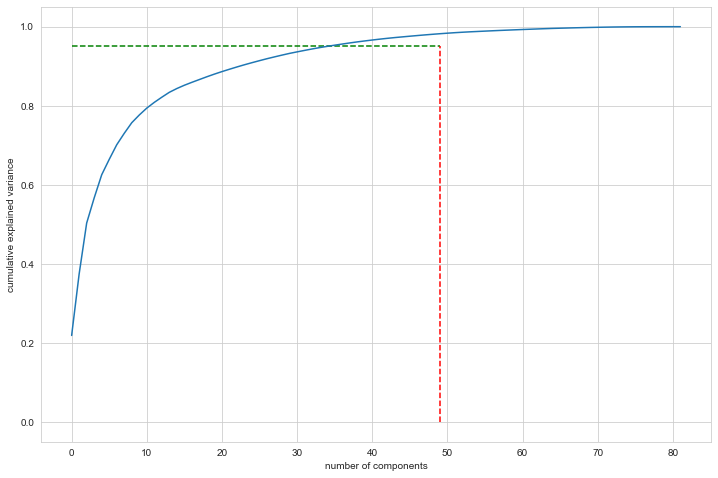

In [154]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
plt.plot(var_cumu)
plt.hlines(y=0.95, xmax=49, xmin=0, colors="g", linestyles="--")
plt.vlines(x=49, ymax=0.95, ymin=0, colors="r", linestyles="--")  ##Optimal number of features-> 49, explains 95% variance
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [155]:
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
pca_final = IncrementalPCA(n_components=49)  ##Incremental PCA using 49 components
df_train_pca = pca_final.fit_transform(X_res)  ##fit_transform train set

In [156]:
df_train_pca.shape

(38544, 49)

In [157]:
df_test_pca = pca_final.transform(X_test)  #transform test set
df_test_pca.shape

(8986, 49)

In [158]:
##Note: Copy these variables for future models using pca
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test

In [159]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()  
model_pca = learner_pca.fit(df_train_pca, y_res)

In [160]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [161]:
##Getting the predicted values on the train set
y_res_pred= pred_probs_train[:,1]   ##Getting churn probability values(1)
y_res_pred

array([0.01387399, 0.00407589, 0.10659015, ..., 0.97992543, 0.92091697,
       0.61180595])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [162]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

Churn  Churn_Prob  CustID
0    0.0    0.013874       0
1    0.0    0.004076       1
2    0.0    0.106590       2
3    1.0    0.786573       3
4    0.0    0.000767       4

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [163]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0    0.0    0.013874       0          0
1    0.0    0.004076       1          0
2    0.0    0.106590       2          0
3    1.0    0.786573       3          1
4    0.0    0.000767       4          0

In [164]:
##Confusion Matrix 
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
confusion

array([[15870,  3402],
       [ 2654, 16618]], dtype=int64)

In [165]:
# Let's check the overall accuracy. (train_data)----Balanced Dataset
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

0.8428808634288086


#### Plotting the ROC Curve

In [166]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC_AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False)

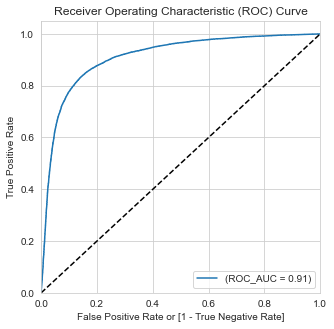

In [168]:
##ROC curve for train data
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [169]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0    0.0    0.013874       0          0    1    0    0    0    0    0    0   
1    0.0    0.004076       1          0    1    0    0    0    0    0    0   
2    0.0    0.106590       2          0    1    1    0    0    0    0    0   
3    1.0    0.786573       3          1    1    1    1    1    1    1    1   
4    0.0    0.000767       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    0    0    0

In [170]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.701199  0.975353  0.427044
0.2   0.2  0.763932  0.953819  0.574045
0.3   0.3  0.803523  0.929379  0.677667
0.4   0.4  0.828767  0.899751  0.757783
0.5   0.5  0.842881  0.862287  0.823474
0.6   0.6  0.843867  0.812526  0.875208
0.7   0.7  0.829961  0.743306  0.916615
0.8   0.8  0.787126  0.622924  0.951328
0.9   0.9  0.628866  0.273869  0.983863


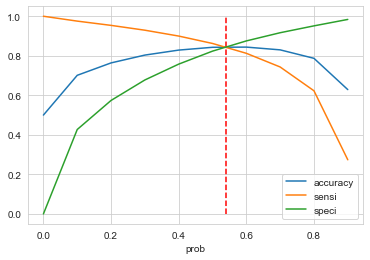

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

#### From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

In [172]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0    0.0    0.013874       0          0    1    0    0    0    0    0    0   
1    0.0    0.004076       1          0    1    0    0    0    0    0    0   
2    0.0    0.106590       2          0    1    1    0    0    0    0    0   
3    1.0    0.786573       3          1    1    1    1    1    1    1    1   
4    0.0    0.000767       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    0    0                1  
4    0    0    0                0

In [173]:
##Confusion Matrix (optimal train set)
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
confusion_train_opt

array([[16317,  2955],
       [ 3013, 16259]], dtype=int64)

In [174]:
TP2 = confusion_train_opt[1,1] # true positive 
TN2 = confusion_train_opt[0,0] # true negatives
FP2 = confusion_train_opt[0,1] # false positives
FN2 = confusion_train_opt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8436591946865919
Specificity =  0.8466687422166874
False Positive Rate =  0.15333125778331258
Precision =  0.8462058915374207
True Negative Prediction Rate =  0.8441282979824107


#### Precision and Recall Trade-off

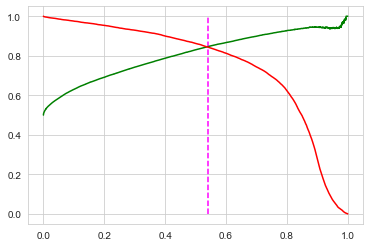

In [175]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")  ##Precision: green-line
plt.plot(thresholds, r[:-1], "r-")  ##Recall: red-line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()

#### Prediction and Evaluation: Test Set

In [176]:
##Making predictions on Test Set
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [177]:
##Getting the predicted values on the test set
y_test_pred= pred_probs_test[:,1]   ##Getting churn probability values(1)
y_test_pred

array([2.95243644e-01, 2.09138445e-05, 4.92985359e-01, ...,
       1.40799219e-01, 1.04352928e-02, 2.59695112e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [178]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

Churn  Churn_Prob  CustID
0    0.0    0.295244   73764
1    0.0    0.000021   18280
2    0.0    0.492985   43793
3    0.0    0.268283   69530
4    0.0    0.061787   71555

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.54 (optimal cut-off) else 0

In [179]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0    0.0    0.295244   73764          0
1    0.0    0.000021   18280          0
2    0.0    0.492985   43793          0
3    0.0    0.268283   69530          0
4    0.0    0.061787   71555          0

In [180]:
##Confusion Matrix (optimal test set)
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
confusion_test_opt

array([[7033, 1215],
       [ 154,  584]], dtype=int64)

In [181]:
# Calculating model validation parameters
TP3 = confusion_test_opt[1,1] # true positive 
TN3 = confusion_test_opt[0,0] # true negatives
FP3 = confusion_test_opt[0,1] # false positives
FN3 = confusion_test_opt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7913279132791328
Specificity =  0.8526915615906887
False Positive Rate =  0.14730843840931135
Precision =  0.3246247915508616
True Negative Prediction Rate =  0.9785724224293864


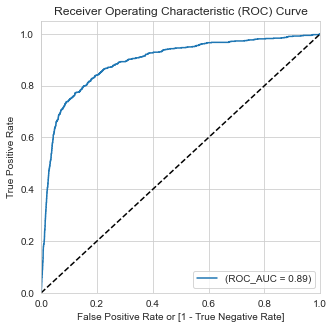

In [182]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Churn,y_test_pred_final.Churn_Prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_test_pred_final.Churn,y_test_pred_final.Churn_Prob)

## (iii) Logistic Regression Model with PCA and hyperparameter-tuning

#### L2 Regularization:

In [183]:
# Example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = np.logspace(-3,3,10)   ##Lambda= 1/c_values (Here, c_values range from 0.001 to 1000)

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X=df_train_pca, y=y_res)   ##Note: (X,y) = (df_train_pca, y_res)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842880 using {'C': 46.41588833612773, 'penalty': 'l2', 'solver': 'lbfgs'}
0.764032 (0.006294) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.764033 (0.006284) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.764044 (0.006220) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.764037 (0.006274) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
0.811023 (0.004652) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'newton-cg'}
0.811015 (0.004659) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'lbfgs'}
0.810991 (0.004699) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'liblinear'}
0.811064 (0.004682) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'sag'}
0.830149 (0.004726) with: {'C': 0.021544346900318832, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830157 (0.004733) with: {'C': 0.021544346900318832, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830147 (0.004721) with: {'C': 0.021544346900318832, 'penalty

##### Observation: Using, L2 Regularization we get, the best model has the following hyperparameters:
##### Best: f1_macro  0.842880 using {'C': 46.41588833612773, 'penalty': 'l2', 'solver': 'lbfgs'}

#### L1 Regularization

In [184]:
# Example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['liblinear', 'saga']
penalty = ['l1']
c_values = np.logspace(-3,3,10)   ##Lambda= 1/c_values (Here, c_values range from 0.001 to 1000)

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X=df_train_pca, y=y_res)   ##Note: (X,y) = (df_train_pca, y_res)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842871 using {'C': 2.154434690031882, 'penalty': 'l1', 'solver': 'saga'}
0.700182 (0.007182) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.700914 (0.007068) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.814451 (0.004861) with: {'C': 0.004641588833612777, 'penalty': 'l1', 'solver': 'liblinear'}
0.815970 (0.005029) with: {'C': 0.004641588833612777, 'penalty': 'l1', 'solver': 'saga'}
0.829816 (0.004184) with: {'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'liblinear'}
0.830013 (0.004241) with: {'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'saga'}
0.840743 (0.004365) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.840779 (0.004356) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.842335 (0.004570) with: {'C': 0.46415888336127775, 'penalty': 'l1', 'solver': 'liblinear'}
0.842309 (0.004600) with: {'C': 0.46415888336127775, 'penalty': 'l1', 'solver': 'saga'}
0.842862 (0.004822) with: {'C': 2.154434690031882, 'penalty': 'l1', 's

##### Observation: Using, L1 Regularization we get, the best model has the following hyperparameters:
##### Best: f1_macro  0.842871 using {'C': 2.154434690031882, 'penalty': 'l1', 'solver': 'saga'}

#### Out of both we consider f1_macro  0.842880 using {'C': 46.41588833612773, 'penalty': 'l2', 'solver': 'lbfgs'} L2 Regularisation model

In [185]:
##Define a function for other evaluation metrics:
def other_metrics_logistic_model(confusion):
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    sensitivity= round((TP) / (TP+FN),4) #sensitivity of our logistic regression model
    specificity= round((TN) / (TN+FP),4) #specificity  of our logistic regression model   
    FPR= round((FP) / (TN+FP),4)        #False Positive Rate - predicting churn when customer does not have churned
    positive_pred_val= round((TP) / (TP+FP),4)  #Positive predictive value
    negative_pred_val= round((TN) / (TN+ FN),4) #Negative predictive value
    misclass_rate = round((FN+FP)/(TP+TN+FP+FN),4)  #Misclassification rate
    
    metric_list= ['Sensitivity', 'Specificity', 'False Positive Rate','Positive Predictive Value','Negative Predictive Value', 'Misclassification Rate']
    metric_val = [sensitivity, specificity, FPR, positive_pred_val, negative_pred_val, misclass_rate]
    evaluation_metrics_df=pd.DataFrame({'Evaluation Metrics':metric_list, 'Value': metric_val})
    evaluation_metrics_df.set_index('Evaluation Metrics', inplace= True)
    return evaluation_metrics_df

In [186]:
from IPython.display import Markdown, display
def printbold(string):   
    return display(Markdown(string))

In [187]:
##Using Best Choice: L1 Regularization: f1_macro 0.842880 using {'C': 46.41588833612773, 'penalty': 'l2', 'solver': 'lbfgs'}
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score

##Retrieving pca train and tests sets
df_train_pca = X_train_pca.copy()
y_res= y_train_pca.copy()
df_test_pca = X_test_pca.copy()
y_test = y_test_pca.copy()


THRESHOLD = 0.54    ##(optimal cut-off as derived in previous model)
lassoclf = LogisticRegression(C= 46.41588833612773, penalty= 'l2', solver= 'lbfgs', random_state= 42) #optimal hyperparameters
lassoclf.fit(df_train_pca, y_res)

printbold("**For Logistic Regression Model (with PCA and Hyperparameter Tuning):**"); 
print('L2 Regularisation(lasso)    Optimal Threshold:',THRESHOLD); print("*"*70)

##Baseline Model (Train Data Performance: Before SMOTE):
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
predictions_train = lr.predict(X_train)
printbold('**Baseline Model (Class Imbalance Dataset: Before SMOTE):**')
print("For Train Set (Class Imbalance Dataset):\n", classification_report(y_train, predictions_train, target_names=['Not Churned','Churned']));  print("-"*70)
# predictions and print classification report  for test data
predictions = lr.predict(X_test)
print("For Test Set (Prediction: Class Imbalance Dataset):\n", classification_report(y_test, predictions, target_names=['Not Churned','Churned'])); print("*"*70)

# predict using train data (After SMOTE: Oversampled Minority Class)
train_pred_prob = lassoclf.predict_proba(df_train_pca)
train_pred_prob_val = pd.DataFrame((train_pred_prob)[:,1]).values.reshape(-1)
train_pred = np.where(train_pred_prob[:,1] > THRESHOLD, 1, 0)

printbold("**For Training Set (Class Balanced: After SMOTE:):**"); print("ROC_AUC_Score:", round(roc_auc_score(y_res, train_pred_prob_val),4))
print("Accuracy:", round(accuracy_score(y_res, train_pred),4))
print(classification_report(y_res, train_pred, target_names=['Not Churned','Churned'])); print("-"*70)
confusion_train_log_pca = metrics.confusion_matrix(y_res, train_pred)
print(other_metrics_logistic_model(confusion_train_log_pca))
    
# predict using test data
print("*"*70)
test_pred_prob = lassoclf.predict_proba(df_test_pca)
test_pred_prob_val = pd.DataFrame((test_pred_prob)[:,1]).values.reshape(-1)
test_pred = np.where(test_pred_prob[:,1] > THRESHOLD, 1, 0)
printbold("**For Test Set (Prediction):**"); print("ROC_AUC_Score:", round(roc_auc_score(y_test, test_pred_prob_val),4))
print("Accuracy:", round(accuracy_score(y_test, test_pred),4))
print(classification_report(y_test, test_pred, target_names=['Not Churned','Churned'])); print("-"*70)

confusion_test_log_pca = metrics.confusion_matrix(y_test, test_pred)
print(other_metrics_logistic_model(confusion_test_log_pca)); print("*"*70)

**For Logistic Regression Model (with PCA and Hyperparameter Tuning):**

L2 Regularisation(lasso)    Optimal Threshold: 0.54
**********************************************************************


**Baseline Model (Class Imbalance Dataset: Before SMOTE):**

For Train Set (Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.93      0.99      0.96     19272
     Churned       0.70      0.20      0.32      1695

    accuracy                           0.93     20967
   macro avg       0.82      0.60      0.64     20967
weighted avg       0.91      0.93      0.91     20967

----------------------------------------------------------------------
For Test Set (Prediction: Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.93      0.99      0.96      8248
     Churned       0.67      0.18      0.28       738

    accuracy                           0.93      8986
   macro avg       0.80      0.59      0.62      8986
weighted avg       0.91      0.93      0.90      8986

**********************************************************************


**For Training Set (Class Balanced: After SMOTE:):**

ROC_AUC_Score: 0.9121
Accuracy: 0.8464
              precision    recall  f1-score   support

 Not Churned       0.85      0.85      0.85     19272
     Churned       0.85      0.85      0.85     19272

    accuracy                           0.85     38544
   macro avg       0.85      0.85      0.85     38544
weighted avg       0.85      0.85      0.85     38544

----------------------------------------------------------------------
                            Value
Evaluation Metrics               
Sensitivity                0.8473
Specificity                0.8455
False Positive Rate        0.1545
Positive Predictive Value  0.8458
Negative Predictive Value  0.8471
Misclassification Rate     0.1536
**********************************************************************


**For Test Set (Prediction):**

ROC_AUC_Score: 0.8951
Accuracy: 0.8461
              precision    recall  f1-score   support

 Not Churned       0.98      0.85      0.91      8248
     Churned       0.32      0.79      0.46       738

    accuracy                           0.85      8986
   macro avg       0.65      0.82      0.68      8986
weighted avg       0.92      0.85      0.87      8986

----------------------------------------------------------------------
                            Value
Evaluation Metrics               
Sensitivity                0.7913
Specificity                0.8510
False Positive Rate        0.1490
Positive Predictive Value  0.3221
Negative Predictive Value  0.9785
Misclassification Rate     0.1539
**********************************************************************


## (iv) Random Forest Model with PCA and Hyper Parameter Tuning

In [188]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [189]:
# fit
rfc.fit(df_train_pca,y_res)

RandomForestClassifier()

In [190]:
# Making predictions
rf_predictions = rfc.predict(df_test_pca)

In [191]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,rf_predictions,target_names=['Not Churned','Churned']))

              precision    recall  f1-score   support

 Not Churned       0.96      0.95      0.95      8248
     Churned       0.49      0.54      0.51       738

    accuracy                           0.92      8986
   macro avg       0.72      0.75      0.73      8986
weighted avg       0.92      0.92      0.92      8986



In [192]:
print(accuracy_score(y_test,rf_predictions))

0.9158691297574004


#### Hyper Parameter Tuning

In [193]:
from math import sqrt

#### Tuning 'max_features'

In [194]:
n_features = 49
max_features= sqrt(n_features)
max_features

7.0

##### Tuning 'max_depth'

In [195]:
# GridSearchCV to find optimal 'max_depth'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(4, 40, 4)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True,n_jobs=-1)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(4, 40, 4)}, return_train_score=True,
             scoring='f1_macro')

In [196]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      58.809806      0.581320         0.152719        0.004617   
1     113.322823      2.782220         0.198761        0.002960   
2     156.535204      3.240227         0.258877        0.006424   
3     186.415999      5.963955         0.295839        0.019918   
4     205.035885      7.279086         0.373346        0.080481   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               4   {'max_depth': 4}           0.808793           0.812991   
1               8   {'max_depth': 8}           0.862985           0.873909   
2              12  {'max_depth': 12}           0.922911           0.924859   
3              16  {'max_depth': 16}           0.942889           0.945231   
4              20  {'max_depth': 20}           0.949000           0.948485   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.814623           0.827081  ...         0.816631        0.006279   
1           0.871574           0.876377  ...         0.871202        0.004512   
2           0.924574           0.925628  ...         0.923674        0.001863   
3           0.943665           0.943662  ...         0.943350        0.001275   
4           0.946919           0.951982  ...         0.948891        0.001691   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.825314            0.821664   
1                8            0.891613            0.889897   
2                7            0.959716            0.959066   
3                6            0.978001            0.980242   
4                5            0.987512            0.987642   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.815214            0.822851            0.820968   
1            0.889831            0.887075            0.891324   
2            0.959097            0.960462            0.961015   
3            0.978554            0.978716            0.979204   
4            0.986766            0.987382            0.987805   

   mean_train_score  std_train_score  
0          0.821202         0.003339  
1          0.889948         0.001609  
2          0.959871         0.000765  
3          0.978943         0.000754  
4          0.987421         0.000356  

[5 rows x 21 columns]

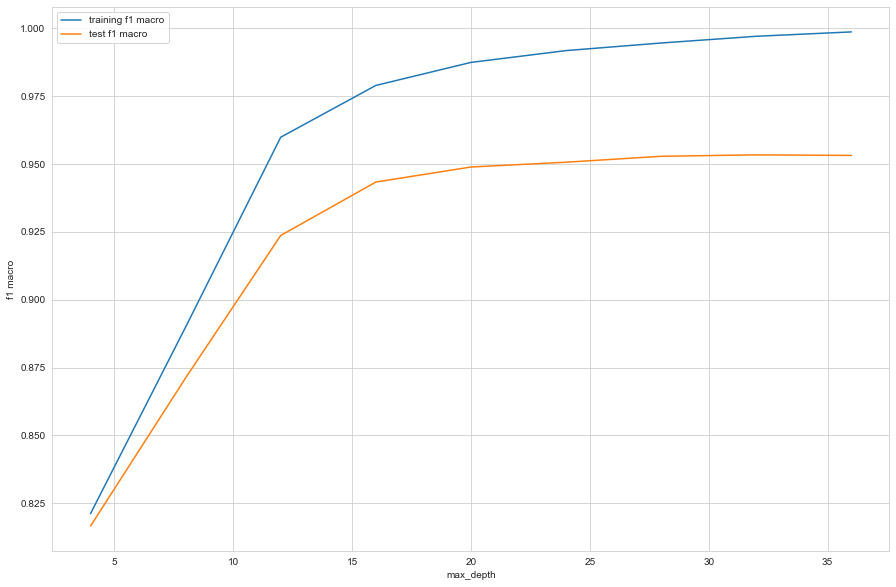

In [197]:
# plotting f1 score with max_depth
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("max_depth")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [198]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

mean_train_score  mean_test_score      diff
0          0.821202         0.816631  0.004571
1          0.889948         0.871202  0.018745
2          0.959871         0.923674  0.036197
3          0.978943         0.943350  0.035593
4          0.987421         0.948891  0.038530
5          0.991775         0.950663  0.041113
6          0.994571         0.952845  0.041726
7          0.997049         0.953366  0.043683
8          0.998657         0.953160  0.045498

#### Tuning 'min_samples_leaf'

In [199]:
# GridSearchCV to find optimal 'min_samples_leaf'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 600, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", n_jobs=-1 , return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(100, 600, 50)},
             return_train_score=True, scoring='f1_macro')

In [200]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     149.370188      3.830589         0.295569        0.064625   
1     132.550720      2.838681         0.281354        0.102131   
2     120.423719      2.474605         0.213721        0.021405   
3     106.440086      7.459639         0.215386        0.021299   
4      99.179415      3.109010         0.220133        0.011868   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.844508   
1                    150  {'min_samples_leaf': 150}           0.835106   
2                    200  {'min_samples_leaf': 200}           0.827928   
3                    250  {'min_samples_leaf': 250}           0.824617   
4                    300  {'min_samples_leaf': 300}           0.818902   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.856898           0.863361           0.867088  ...   
1           0.848890           0.851613           0.855355  ...   
2           0.843494           0.840783           0.852088  ...   
3           0.833468           0.837382           0.844758  ...   
4           0.828444           0.834840           0.842669  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.857996        0.007676                1            0.872037   
1         0.848541        0.007025                2            0.861058   
2         0.841611        0.007821                3            0.853017   
3         0.836367        0.007005                4            0.845231   
4         0.832179        0.008029                5            0.840828   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.868521            0.870233            0.869986   
1            0.856661            0.856127            0.857896   
2            0.849593            0.847561            0.850271   
3            0.842224            0.842888            0.841346   
4            0.837656            0.834946            0.837303   

   split4_train_score  mean_train_score  std_train_score  
0            0.869362          0.870028         0.001166  
1            0.858106          0.857970         0.001713  
2            0.851378          0.850364         0.001818  
3            0.843398          0.843017         0.001303  
4            0.838478          0.837842         0.001899  

[5 rows x 21 columns]

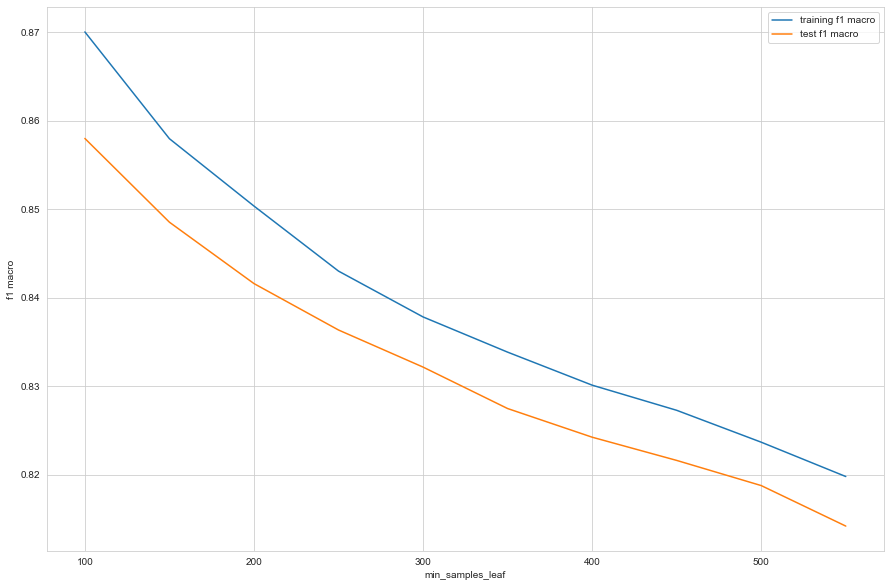

In [201]:
# plotting f1 score with 'min_samples_leaf'
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("min_samples_leaf")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [202]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

mean_train_score  mean_test_score      diff
0          0.870028         0.857996  0.012031
1          0.857970         0.848541  0.009429
2          0.850364         0.841611  0.008753
3          0.843017         0.836367  0.006651
4          0.837842         0.832179  0.005663
5          0.833867         0.827499  0.006369
6          0.830139         0.824263  0.005876
7          0.827299         0.821640  0.005658
8          0.823697         0.818799  0.004898
9          0.819821         0.814224  0.005597

#### Tuning n_estimators

In [203]:
# GridSearchCV to find optimal 'n_estimators'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 600, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", n_jobs=-1, return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(100, 600, 100)},
             return_train_score=True, scoring='f1_macro')

In [204]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     244.014221      3.965693         0.385124        0.036320   
1     494.344433     12.075709         0.703031        0.070597   
2     766.789930      7.248017         1.112690        0.137097   
3    1012.383832     33.285582         1.277580        0.312268   
4     931.889958    128.700371         0.831369        0.064123   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.953291   
1                200  {'n_estimators': 200}           0.955497   
2                300  {'n_estimators': 300}           0.954979   
3                400  {'n_estimators': 400}           0.954717   
4                500  {'n_estimators': 500}           0.954589   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.953168           0.953550           0.957052  ...   
1           0.954722           0.955108           0.957181  ...   
2           0.954203           0.955497           0.955752  ...   
3           0.953943           0.956277           0.957961  ...   
4           0.954982           0.955497           0.958219  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.953886        0.001631                5                 1.0   
1         0.955236        0.001148                1                 1.0   
2         0.954611        0.001125                4                 1.0   
3         0.955105        0.001853                3                 1.0   
4         0.955157        0.001839                2                 1.0   

   split1_train_score  split2_train_score  split3_train_score  \
0                 1.0                 1.0                 1.0   
1                 1.0                 1.0                 1.0   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   
4                 1.0                 1.0                 1.0   

   split4_train_score  mean_train_score  std_train_score  
0                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
2                 1.0               1.0              0.0  
3                 1.0               1.0              0.0  
4                 1.0               1.0              0.0  

[5 rows x 21 columns]

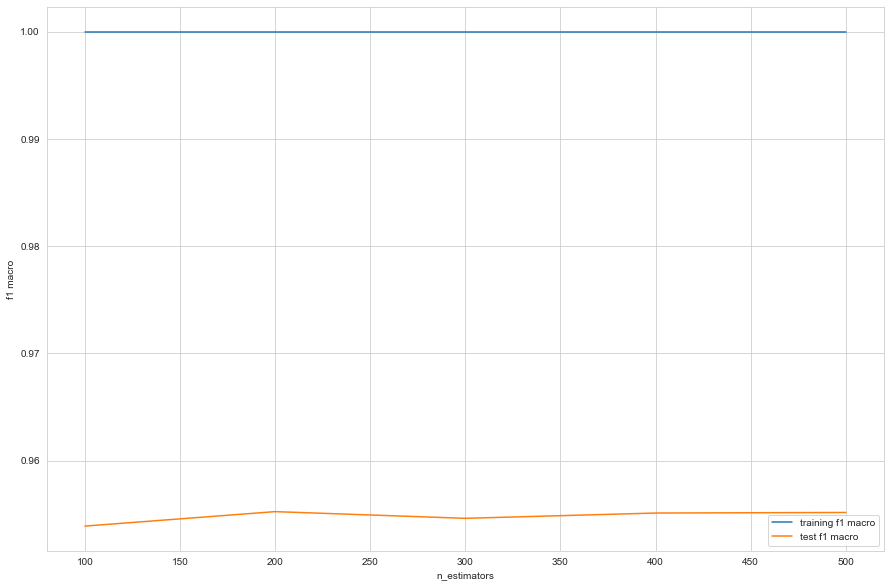

In [205]:
# plotting f1 score with 'n_estimators'
plt.figure(figsize=(15,10))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("n_estimators")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [206]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

mean_train_score  mean_test_score      diff
0               1.0         0.953886  0.046114
1               1.0         0.955236  0.044764
2               1.0         0.954611  0.045389
3               1.0         0.955105  0.044895
4               1.0         0.955157  0.044843

#### Tuning 'min_samples_split'

In [207]:
# GridSearchCV to find optimal 'min_samples_split'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': [2, 50, 150, 300, 500]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': [2, 50, 150, 300, 500]},
             return_train_score=True, scoring='f1_macro')

In [208]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     195.201321      3.391958         0.245825        0.006460   
1     179.277247      8.151425         0.234214        0.007040   
2     155.662384      3.984503         0.218341        0.012667   
3     144.161295      5.727539         0.246418        0.075725   
4     120.091033     16.443679         0.182131        0.046731   

  param_min_samples_split                      params  split0_test_score  \
0                       2    {'min_samples_split': 2}           0.955626   
1                      50   {'min_samples_split': 50}           0.901741   
2                     150  {'min_samples_split': 150}           0.863885   
3                     300  {'min_samples_split': 300}           0.848031   
4                     500  {'min_samples_split': 500}           0.833616   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.952907           0.953035           0.958351  ...   
1           0.918919           0.915160           0.919053  ...   
2           0.884332           0.887880           0.887482  ...   
3           0.864467           0.865480           0.871833  ...   
4           0.847182           0.849393           0.858104  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.954666        0.002090                1            1.000000   
1         0.913719        0.006341                2            0.956899   
2         0.881096        0.008879                3            0.906577   
3         0.862672        0.007876                4            0.880916   
4         0.847699        0.007950                5            0.863424   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.957613            0.956023            0.957094   
2            0.906587            0.906454            0.907004   
3            0.877809            0.877539            0.878937   
4            0.858387            0.857744            0.859443   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.957938          0.957113         0.000658  
2            0.907165          0.906758         0.000276  
3            0.878959          0.878832         0.001191  
4            0.860882          0.859976         0.002025  

[5 rows x 21 columns]

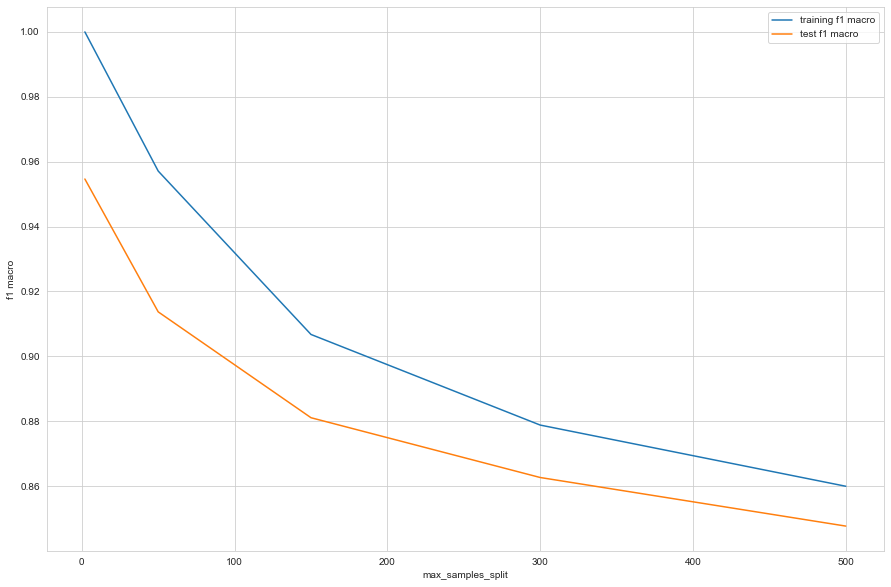

In [209]:
# plotting f1 score with 'min_samples_split'
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test f1 macro")
#plt.vlines(x=24, ymax=1, ymin=0.825, colors='magenta', linestyles="--")
#plt.vlines(x=28, ymax=1, ymin=0.825, colors='red', linestyles="--")
plt.xlabel("max_samples_split")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [210]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

mean_train_score  mean_test_score      diff
0          1.000000         0.954666  0.045334
1          0.957113         0.913719  0.043394
2          0.906758         0.881096  0.025662
3          0.878832         0.862672  0.016160
4          0.859976         0.847699  0.012277

#### Tuning 'max_samples' (bootstrap samples)

>0.1 0.900 (0.005)
>0.2 0.923 (0.005)
>0.3 0.935 (0.005)
>0.4 0.941 (0.005)
>0.5 0.947 (0.004)
>0.6 0.950 (0.004)
>0.7 0.952 (0.004)
>0.8 0.954 (0.003)
>0.9 0.956 (0.004)
>1.0 0.957 (0.004)


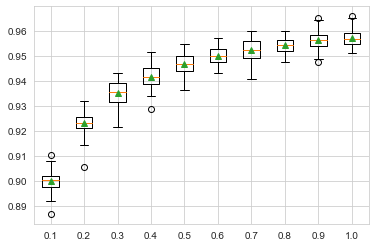

In [211]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

##Note: Copy these variables for future models using pca
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test


# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X=df_train_pca, y=y_res)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Tuning 'max_leaf_nodes'

In [212]:
# GridSearchCV to find optimal 'max_leaf_nodes'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_leaf_nodes': [10, 30, 50, 100]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs=-1,
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [10, 30, 50, 100]},
             return_train_score=True, scoring='f1_macro')

In [213]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      72.927022      1.077979         0.149858        0.007730   
1     100.967734      1.796751         0.180562        0.023559   
2     110.613689      1.454507         0.176254        0.024544   
3      99.143110     12.422879         0.118788        0.030596   

  param_max_leaf_nodes                   params  split0_test_score  \
0                   10   {'max_leaf_nodes': 10}           0.793008   
1                   30   {'max_leaf_nodes': 30}           0.815976   
2                   50   {'max_leaf_nodes': 50}           0.833770   
3                  100  {'max_leaf_nodes': 100}           0.852146   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.801309           0.810373           0.818764  ...   
1           0.828960           0.834181           0.842360  ...   
2           0.844238           0.850579           0.855929  ...   
3           0.865241           0.869346           0.873357  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.805225        0.008728                4            0.811390   
1         0.831639        0.008941                3            0.839506   
2         0.846810        0.007503                2            0.858929   
3         0.865728        0.007266                1            0.883930   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.809897            0.810634            0.807503   
1            0.838933            0.838437            0.838109   
2            0.854262            0.856497            0.856143   
3            0.879665            0.881262            0.880776   

   split4_train_score  mean_train_score  std_train_score  
0            0.805873          0.809059         0.002059  
1            0.840803          0.839158         0.000949  
2            0.856917          0.856550         0.001497  
3            0.881231          0.881373         0.001403  

[4 rows x 21 columns]

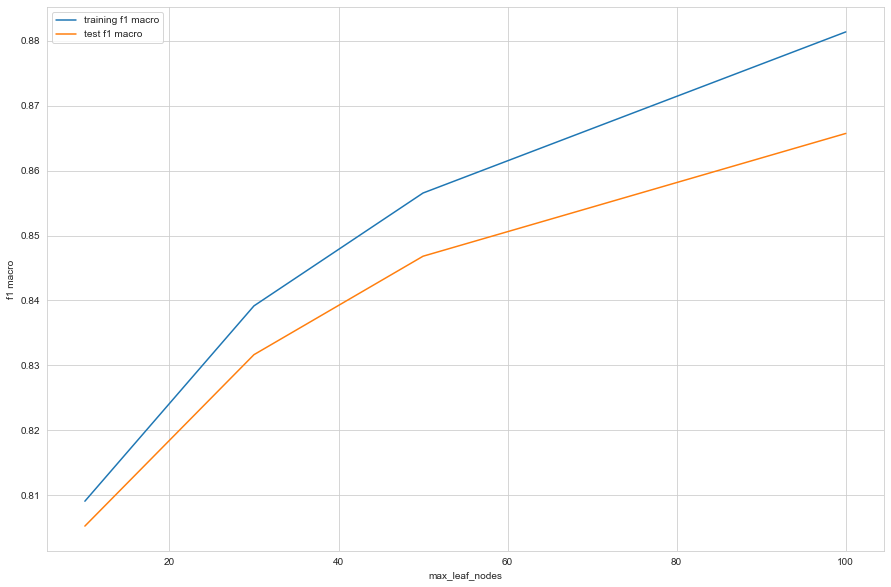

In [214]:
# plotting f1 score with 'max_leaf_nodes'
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_leaf_nodes"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_max_leaf_nodes"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("max_leaf_nodes")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [215]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

mean_train_score  mean_test_score      diff
0          0.809059         0.805225  0.003834
1          0.839158         0.831639  0.007519
2          0.856550         0.846810  0.009740
3          0.881373         0.865728  0.015645

In [216]:
# Create the parameter grid based on the results
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [7],  
    'max_depth': [24,25],
    'min_samples_leaf': [100, 200, 300],
    'n_estimators': [300],
    'min_samples_split': [250,350,450],
    'max_leaf_nodes': [25,27]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= 'f1_macro',  ##scoring= 'f1_macro'
                          cv = 5, n_jobs = -1,verbose = 1)

In [217]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_res)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [24, 25], 'max_features': [7],
                         'max_leaf_nodes': [25, 27],
                         'min_samples_leaf': [100, 200, 300],
                         'min_samples_split': [250, 350, 450],
                         'n_estimators': [300]},
             scoring='f1_macro', verbose=1)

In [218]:
# printing the optimal f1_macro score and hyperparameters
print('f1_macro of',grid_search.best_score_,'using',grid_search.best_params_)

f1_macro of 0.8302415060298622 using {'max_depth': 25, 'max_features': 7, 'max_leaf_nodes': 27, 'min_samples_leaf': 100, 'min_samples_split': 250, 'n_estimators': 300}


In [219]:
## Creating the model using the above hyperparameter
rf_final = RandomForestClassifier(bootstrap=True,
                             max_depth=25,
                             max_features=7,
                             max_leaf_nodes=27,
                             min_samples_leaf=100, 
                             min_samples_split=250,
                             n_estimators=300)

In [220]:
# fit
rf_final.fit(df_train_pca, y_res)

RandomForestClassifier(max_depth=25, max_features=7, max_leaf_nodes=27,
                       min_samples_leaf=100, min_samples_split=250,
                       n_estimators=300)

In [221]:
predrf_probs_train = rf_final.predict_proba(df_train_pca)

In [222]:
##Getting the predicted values on the train set
y_res_predrf = predrf_probs_train[:,1]##Getting churn probability values(1)

In [223]:
y_res_predrf_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_predrf})
y_res_predrf_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_predrf_final.head()

Churn  Churn_Prob  CustID
0    0.0    0.222548       0
1    0.0    0.219239       1
2    0.0    0.193355       2
3    1.0    0.719234       3
4    0.0    0.175255       4

In [224]:
##Lets assume that the optimal cutoff is 0.5

y_res_predrf_final['predicted'] = y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_predrf_final.head()

Churn  Churn_Prob  CustID  predicted
0    0.0    0.222548       0          0
1    0.0    0.219239       1          0
2    0.0    0.193355       2          0
3    1.0    0.719234       3          1
4    0.0    0.175255       4          0

In [225]:
##Confusion Matrix 
confusion = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.predicted)
confusion

array([[16981,  2291],
       [ 4082, 15190]], dtype=int64)

In [226]:
# Let's check the overall accuracy. (train_data)
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.predicted))

0.8346564964715649


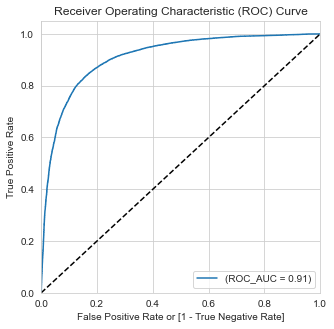

In [227]:
fpr_rf, tp_rf, thresholds_rf = metrics.roc_curve( y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob, drop_intermediate = False )
##ROC curve for train data
draw_roc(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)

In [228]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_predrf_final[i]= y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_predrf_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0    0.0    0.222548       0          0    1    1    1    0    0    0    0   
1    0.0    0.219239       1          0    1    1    1    0    0    0    0   
2    0.0    0.193355       2          0    1    1    0    0    0    0    0   
3    1.0    0.719234       3          1    1    1    1    1    1    1    1   
4    0.0    0.175255       4          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    0    0    0

In [229]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoffrf_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoffrf_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoffrf_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.566392  0.995745  0.137038
0.3   0.3  0.766501  0.956725  0.576276
0.4   0.4  0.831855  0.884496  0.779213
0.5   0.5  0.834656  0.788190  0.881123
0.6   0.6  0.804250  0.678549  0.929950
0.7   0.7  0.756849  0.554172  0.959527
0.8   0.8  0.670429  0.357877  0.982980
0.9   0.9  0.500000  0.000000  1.000000


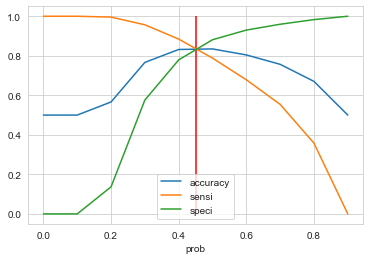

In [230]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoffrf_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.45, ymax=1, ymin=0, colors="r", linestyles="-")
plt.show()

In [231]:
y_res_predrf_final['final_predicted'] = y_res_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_res_predrf_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0    0.0    0.222548       0          0    1    1    1    0    0    0    0   
1    0.0    0.219239       1          0    1    1    1    0    0    0    0   
2    0.0    0.193355       2          0    1    1    0    0    0    0    0   
3    1.0    0.719234       3          1    1    1    1    1    1    1    1   
4    0.0    0.175255       4          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    0    0                1  
4    0    0    0                0

In [232]:
##Confusion Matrix (optimal train set)
confusion_train_optrf = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted)
confusion_train_optrf

array([[16187,  3085],
       [ 3136, 16136]], dtype=int64)

In [233]:
## Let's compute the Evaluation Metrics (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_optrf))
print("******************************************************************")
print('ROC of Train Set: (Random Forest Model with PCA and Hyper Parameter Tuning):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)))

**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**

******************************************************************
Accuracy of Train Set: (Random Forest Model with PCA):
0.8386000415110004
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.84      0.84      0.84     19272
     Churned       0.84      0.84      0.84     19272

    accuracy                           0.84     38544
   macro avg       0.84      0.84      0.84     38544
weighted avg       0.84      0.84      0.84     38544

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.8373
Specificity                0.8399
False Positive Rate        0.1601
Positive Predictive Value  0.8395
Negative Predictive Value  0.8377
Misclassification Rate     0.1614
******************************************************************
ROC of Train Set: (Random Forest Model with PCA and Hyper P

#### Prediction and Evaluation: Test Set

In [234]:
##Making predictions on Test Setusing Random Forest Model created
pred_probs_testrf = rf_final.predict_proba(df_test_pca)

In [235]:
##Getting the predicted values on the test set
y_test_predrf= pred_probs_testrf[:,1]   ##Getting churn probability values(1)
y_test_pred

array([2.95243644e-01, 2.09138445e-05, 4.92985359e-01, ...,
       1.40799219e-01, 1.04352928e-02, 2.59695112e-01])

In [236]:
y_test_predrf_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_predrf_final.head()

Churn  Churn_Prob  CustID
0    0.0    0.423704   73764
1    0.0    0.221047   18280
2    0.0    0.595725   43793
3    0.0    0.471686   69530
4    0.0    0.213618   71555

#### Optimal cut-off achieved is 0.45. Therefore assigning 1 for probabilities > 0.45 else 0

In [237]:
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)  ##optimal cut-off is 0.45
y_test_predrf_final.head()

Churn  Churn_Prob  CustID  predicted
0    0.0    0.423704   73764          0
1    0.0    0.221047   18280          0
2    0.0    0.595725   43793          1
3    0.0    0.471686   69530          1
4    0.0    0.213618   71555          0

In [238]:
##Confusion Matrix (optimal test set)
confusion_test_optrf = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
confusion_test_optrf

array([[6942, 1306],
       [ 178,  560]], dtype=int64)

In [239]:
## Let's compute the Evaluation Metrics (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_predrf_final.Churn, y_test_predrf_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_optrf))
print("******************************************************************")
print('ROC of Test Set: (Random Forest Model with PCA and Hyper Parameter Tuning):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.Churn_Prob)))

**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**

******************************************************************
Accuracy of Test Set: (Random Forest Model with PCA):
0.8348542176719341
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.97      0.84      0.90      8248
     Churned       0.30      0.76      0.43       738

    accuracy                           0.83      8986
   macro avg       0.64      0.80      0.67      8986
weighted avg       0.92      0.83      0.86      8986

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.7588
Specificity                0.8417
False Positive Rate        0.1583
Positive Predictive Value  0.3001
Negative Predictive Value  0.9750
Misclassification Rate     0.1651
******************************************************************
ROC of Test Set: (Random Forest Model with PCA and Hyper Par

#### Top Features, Business Recommendations and Model Predictions:

#### Top Features

In [240]:
##Top 15 features (feature importance based ranking)

##Getting Top15 features
top15_df= rfe_df[:15]
top15_df

printbold("**Top 15 features in the model based on their importance are as follows:**")
print('*'*70)
print(top15_df)

**Top 15 features in the model based on their importance are as follows:**

**********************************************************************
                        Coefficients  Rank (Feature Importance Based)
Features                                                             
loc_ic_t2m_mou_8            -14.3002                              1.0
loc_ic_t2t_mou_8             -7.0287                              2.0
arpu_avg_6_7                  6.6149                              3.0
loc_ic_t2f_mou_8             -6.1823                              4.0
total_rech_amt_8             -6.0155                              5.0
loc_og_t2m_mou_8             -5.6342                              6.0
last_day_rch_amt_8           -5.4531                              7.0
spl_ic_mou_8                 -5.3458                              8.0
total_rech_data_8            -5.0013                              9.0
vol_2g_mb_8                  -4.7883                             10.0
total_rech_num_8             -4.7342                             11.0
loc_ic_t2m_mou_avg_

In [241]:
##Reimporting the 'top15_df' dataframe containing Top 15 features based on their importance in making predictions
top15_df.reset_index(inplace= True)
top15_df.set_index('Rank (Feature Importance Based)')

Features  Coefficients
Rank (Feature Importance Based)                                      
1.0                                    loc_ic_t2m_mou_8      -14.3002
2.0                                    loc_ic_t2t_mou_8       -7.0287
3.0                                        arpu_avg_6_7        6.6149
4.0                                    loc_ic_t2f_mou_8       -6.1823
5.0                                    total_rech_amt_8       -6.0155
6.0                                    loc_og_t2m_mou_8       -5.6342
7.0                                  last_day_rch_amt_8       -5.4531
8.0                                        spl_ic_mou_8       -5.3458
9.0                                   total_rech_data_8       -5.0013
10.0                                        vol_2g_mb_8       -4.7883
11.0                                   total_rech_num_8       -4.7342
12.0                             loc_ic_t2m_mou_avg_6_7        4.3853
13.0                                           vbc_3g_8       -4.3120
14.0                                   loc_og_t2f_mou_8       -3.5228
15.0                                      roam_og_mou_8        3.2329

### **Top Churn Indicators**

1. **High LOC IC T2M MOU (local incoming calls to other operators)** negatively impacts retention, indicating customers receive more calls from other networks.  

2. **High LOC IC T2T MOU (local incoming calls within the same operator)** is also linked to churn, suggesting customers rely on incoming calls rather than outgoing engagement.

3. **Higher ARPU in June-July** correlates with lower churn, meaning high-value customers are less likely to leave.

4. **Decreased total recharge amount and last recharge amount in August** show financial disengagement, signaling churn risk.

5. **Lower total data recharge and high VBC 3G usage** indicate customers may lack proper data packs, leading to dissatisfaction.
  
6. **Roaming outgoing minutes (ROAM OG MOU)** positively correlate with retention, showing engaged travelers are likely to stay. 

### **Business Recommendations** 

1. Offer **better incentives for high incoming-call users** (e.g., free outgoing minutes) to increase engagement.

2. Create **exclusive retention plans for high-ARPU users** to ensure continued loyalty.

3. Introduce **discounted data packs for high VBC 3G users** to reduce excessive pay-per-use costs.

4. Implement **targeted recharge reminders and cashback offers** to re-engage users showing reduced recharge activity.
  
5. Develop **custom roaming plans** to enhance the experience for frequent travelers, improving long-term retention.  

#### 6. Model Selection

In [242]:
from IPython.display import display

## Model Predictions

prediction_results = pd.DataFrame({
    'Model No.': ['1', '2', '3', '4'],
    'Models': [
        'Logistic Regression (RFE)',
        'Logistic Regression (PCA)',
        'Logistic Regression (PCA+Hyperparameter Tuning)',
        'Random Forest (PCA+Hyperparameter Tuning)'
    ],
    'ROC_AUC (Train)': [0.91, 0.91, 0.91, 0.91],  
    'Recall (Train)': [84.5, 84.3, 84.7, 84.1],   
    'ROC_AUC (Test)': [0.89, 0.89, 0.89, 0.87],   
    'Recall (Test)': [80.08, 79.1, 79.1, 76.0]    
})

prediction_results.set_index('Model No.', inplace=True)

print("**Model Predictions**")
display(prediction_results)

**Model Predictions**


Models  ROC_AUC (Train)  \
Model No.                                                                     
1                                Logistic Regression (RFE)             0.91   
2                                Logistic Regression (PCA)             0.91   
3          Logistic Regression (PCA+Hyperparameter Tuning)             0.91   
4                Random Forest (PCA+Hyperparameter Tuning)             0.91   

           Recall (Train)  ROC_AUC (Test)  Recall (Test)  
Model No.                                                 
1                    84.5            0.89          80.08  
2                    84.3            0.89          79.10  
3                    84.7            0.89          79.10  
4                    84.1            0.87          76.00

### **Final Model Selection**  

The best model for predicting churn is **Logistic Regression (RFE)** as it achieves the highest **recall (80.08%)** and strong **ROC_AUC (0.89)** on test data, ensuring better identification of churners.  

### **Why this Model?**  
- **Highest Recall:** Minimizes false negatives, reducing missed churners.  
- **Good ROC_AUC:** Effectively distinguishes between churners and non-churners.  
- **Better Generalization:** Avoids overfitting, unlike **Random Forest (PCA+Hyperparameter Tuning)**, which has lower test ROC_AUC (0.87).  